# **I. Introduction**

### 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display,Markdown
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

## 2. Define Problem && Short Description of Dataset

### **Salaries in Data Science Jobs**
**Background**

Salaries in Data Science jobs" is one of the fascinating practical topics that has garnered significant attention within the community of professionals and enthusiasts alike who are immersed in the realm of Data Science. As the field continues to evolve and expand its influence across various industries, the question of remuneration has become increasingly pertinent.

Moreover, the variability of Data Science salaries is influenced by location, experience, education, industry, and company size. Tech hubs like Silicon Valley offer competitive salaries due to high demand. The increasing demand for skilled data professionals across industries has driven up salaries, giving Data Scientists leverage in negotiations.

In conclusion, salaries in Data Science encapsulate a complex interplay of factors, reflecting both the intrinsic value of the skills and expertise possessed by practitioners and the external market forces driving demand and compensation. As the field continues to mature and innovate, so too will the landscape of Data Science salaries evolve, offering both challenges and opportunities for professionals navigating this dynamic and ever-expanding domain.

**`Purpose`**


*   By meticulously collecting and analyzing real data from job websites in Vietnam, we can discern the impact of various factors such as location, year, and years of experience on salary dynamics. This empirical approach enables us to provide comprehensive analyses that empower students to better comprehend and negotiate salaries with prospective employers.

*   Understand and capture the working and salary trends among sub-sectors in the field of data science taking place in two major cities of Vietnam, respectively Ho Chi Minh City and Hanoi capital.

* Helps us get an overview of changes in this field through 2023 and 2024.

In summary, this granular understanding allows us to offer actionable insights, equipping students with the knowledge to navigate the job market effectively.

**Understanding the story of the Dataset**
* **Location:** The recruitment locations of the enterprise, specifically here mainly in the two most developed cities of Vietnam, HCM City and Hanoi Capital.

* **Level:** Job experience levels available throughout the year, with possible values:

    *1. Manager:* denotes a position responsible for overseeing and coordinating the work of a team or department within an organization.

    *2. Senior:* professional who has advanced to a certain level in their career.

    *3. Junior:* refers to entry-level positions requiring minimal experience or expertise.

    *4. Fresher:* denotes candidates who have recently graduated or have little to no professional experience.

    *5. Internship:* refers to temporary positions where individuals gain practical experience in a particular field or industry.

* **Title:** Position held over the course of the year.
* **Year of Experience:** The number of years of experience working in the field of Data Science.
* **Salary Max:** The maximum gross salary amount paid.

## 3. Import File

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR6Kds9r0rmJAV91WkkTwuNYXR4-FzDuJgxh0zPYOoW9N6Ritg0pl9AZ8JNZsuTFc7XgBF-rIqMFtC4/pub?output=csv")
data.head()

,Location,Due Date,Level,Title,Year of Experience,Salary Max
0,Ha Noi city,2023,Junior,Data Engineer,3.0,1270
1,Ha Noi city,2023,Senior,Data Engineer,4.0,2500
2,Ha Noi city,2023,Junior,Data Analyst,2.0,1154
3,Ha Noi city,2024,Fresher,Data Engineer,1.0,850
4,Ha Noi city,2024,Junior,Business Analyst,2.5,1185


## 4. Summary Data

In [ ]:
print("The shape of dataset is ", data.shape)

The shape of dataset is  (1000, 6)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            1000 non-null   object 
 1   Due Date            1000 non-null   int64  
 2   Level               1000 non-null   object 
 3   Title               1000 non-null   object 
 4   Year of Experience  1000 non-null   float64
 5   Salary Max          1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
print(data.describe(include='object'))

           Location   Level          Title
count          1000    1000           1000
unique            2       5             14
top     Ha Noi city  Senior  Data Engineer
freq            531     500            379


In [ ]:
print(data.describe())

          Due Date  Year of Experience    Salary Max
count  1000.000000          1000.00000   1000.000000
mean   2023.311000             2.94750   2022.815000
std       0.463134             1.99122   1103.054785
min    2023.000000             0.00000     85.000000
25%    2023.000000             2.00000   1270.000000
50%    2023.000000             3.00000   1900.000000
75%    2024.000000             4.00000   2500.000000
max    2024.000000            15.00000  10000.000000


# **II. Univariate Analysis**

## **1. Analyzing categorical variables **
* Frquency table
* Graph
* Mode
* Title



In [ ]:
# function create the frequency/relative frequency table
def create_freq_dataframe(df, col=" "):
  Title, freq_title = np.unique(df[col], return_counts=True)
  rlt_freq = [freq / sum(freq_title) for freq in freq_title]
  freq_table = np.asarray((freq_title, rlt_freq))
  freq_df = pd.DataFrame(freq_table, index=['Frequency','Relative Frequency'])
  freq_df.columns = Title
  return Title, freq_title, freq_df

### Title variable analyze

In [ ]:
Title, freq_title, data_Title = create_freq_dataframe(data, col="Title")
print("Frequency table & Relative frequency table of Title variable")
data_Title.head()

Frequency table & Relative frequency table of Title variable


,AI Engineer,Big Data,Business Analyst,Computer Vision Engineer,Data,Data Analyst,Data Architect,Data Engineer,Data Governance,Data Science,Data Scientist,Machine Learning,Risk,Software
Frequency,39.000,19.000,59.000,2.000,11.000,339.000,18.000,379.000,12.000,15.000,97.000,2.000,6.000,2.000
Relative Frequency,0.039,0.019,0.059,0.002,0.011,0.339,0.018,0.379,0.012,0.015,0.097,0.002,0.006,0.002


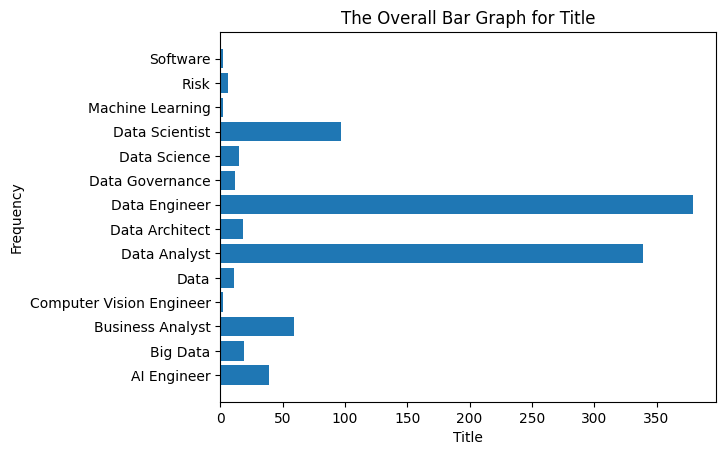

In [ ]:
# Create the general frequency bar graph of title
bars = plt.barh(Title, freq_title)
plt.xlabel("Title")
plt.ylabel("Frequency")
plt.title("The Overall Bar Graph for Title")
plt.show()

**Insights:**

From this relative frequency table and the overall bar graph for the Title, we have a basic conclusion of the employee distribution in data field.
    There are the three occupation have the highest number of worker which are Data Engineer, Data Analyst and Data Scientist. They account for 81.5% of overall.
    Therefore, we decide to focus on analyst deeply the location and level' distribution in these 3 job


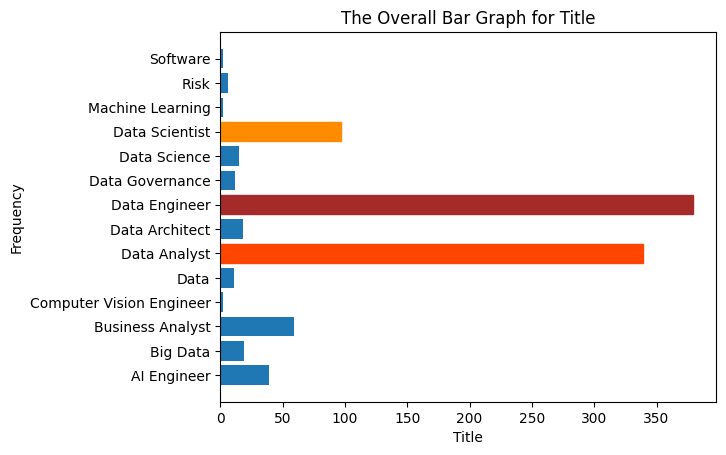

In [ ]:
bars = plt.barh(Title, freq_title)

index = np.where(Title == 'Data Engineer')[0][0]
index1 = np.where(Title == 'Data Analyst')[0][0]
index2 = np.where(Title == 'Data Scientist')[0][0]
bars[index].set_color('brown')
bars[index1].set_color('orangered')
bars[index2].set_color('darkorange')

plt.xlabel("Title")
plt.ylabel("Frequency")
plt.title("The Overall Bar Graph for Title")
plt.show()

Now, we seperate datasets by title and then analyzing

In [ ]:
top_titles = ["Data Engineer","Data Analyst", "Data Scientist" ]
data_DE = data[data['Title'] == top_titles[0]]
data_DA = data[data['Title'] == top_titles[1]]
data_DS = data[data['Title'] == top_titles[2]]


### Analyzing location variable

In [ ]:
Location, freq_location, df_Location = create_freq_dataframe(data, col="Location")
Location_DE, freq_location_DE, df_Location_DE = create_freq_dataframe(data_DE, col="Location")
Location_DA, freq_location_DA, df_Location_DA = create_freq_dataframe(data_DA, col="Location")
Location_DS, freq_location_DS, df_Location_DS = create_freq_dataframe(data_DS, col="Location")

In [ ]:
display(Markdown("### Location of dataset"))
display(df_Location)

display(Markdown("### Location frequency of Data Analysis job"))
display(df_Location_DA)

display(Markdown("### Location frequency of Data Engnieer job"))
display(df_Location_DE)

display(Markdown("### Location frequency of Data Scientist job"))
display(df_Location_DS)

### Location of dataset

,Ha Noi city,Ho Chi Minh city
Frequency,531.000,469.000
Relative Frequency,0.531,0.469


### Location frequency of Data Analysis job

,Ha Noi city,Ho Chi Minh city
Frequency,171.000000,168.000000
Relative Frequency,0.504425,0.495575


### Location frequency of Data Engnieer job

,Ha Noi city,Ho Chi Minh city
Frequency,218.000000,161.000000
Relative Frequency,0.575198,0.424802


### Location frequency of Data Scientist job

,Ha Noi city,Ho Chi Minh city
Frequency,43.000000,54.000000
Relative Frequency,0.443299,0.556701


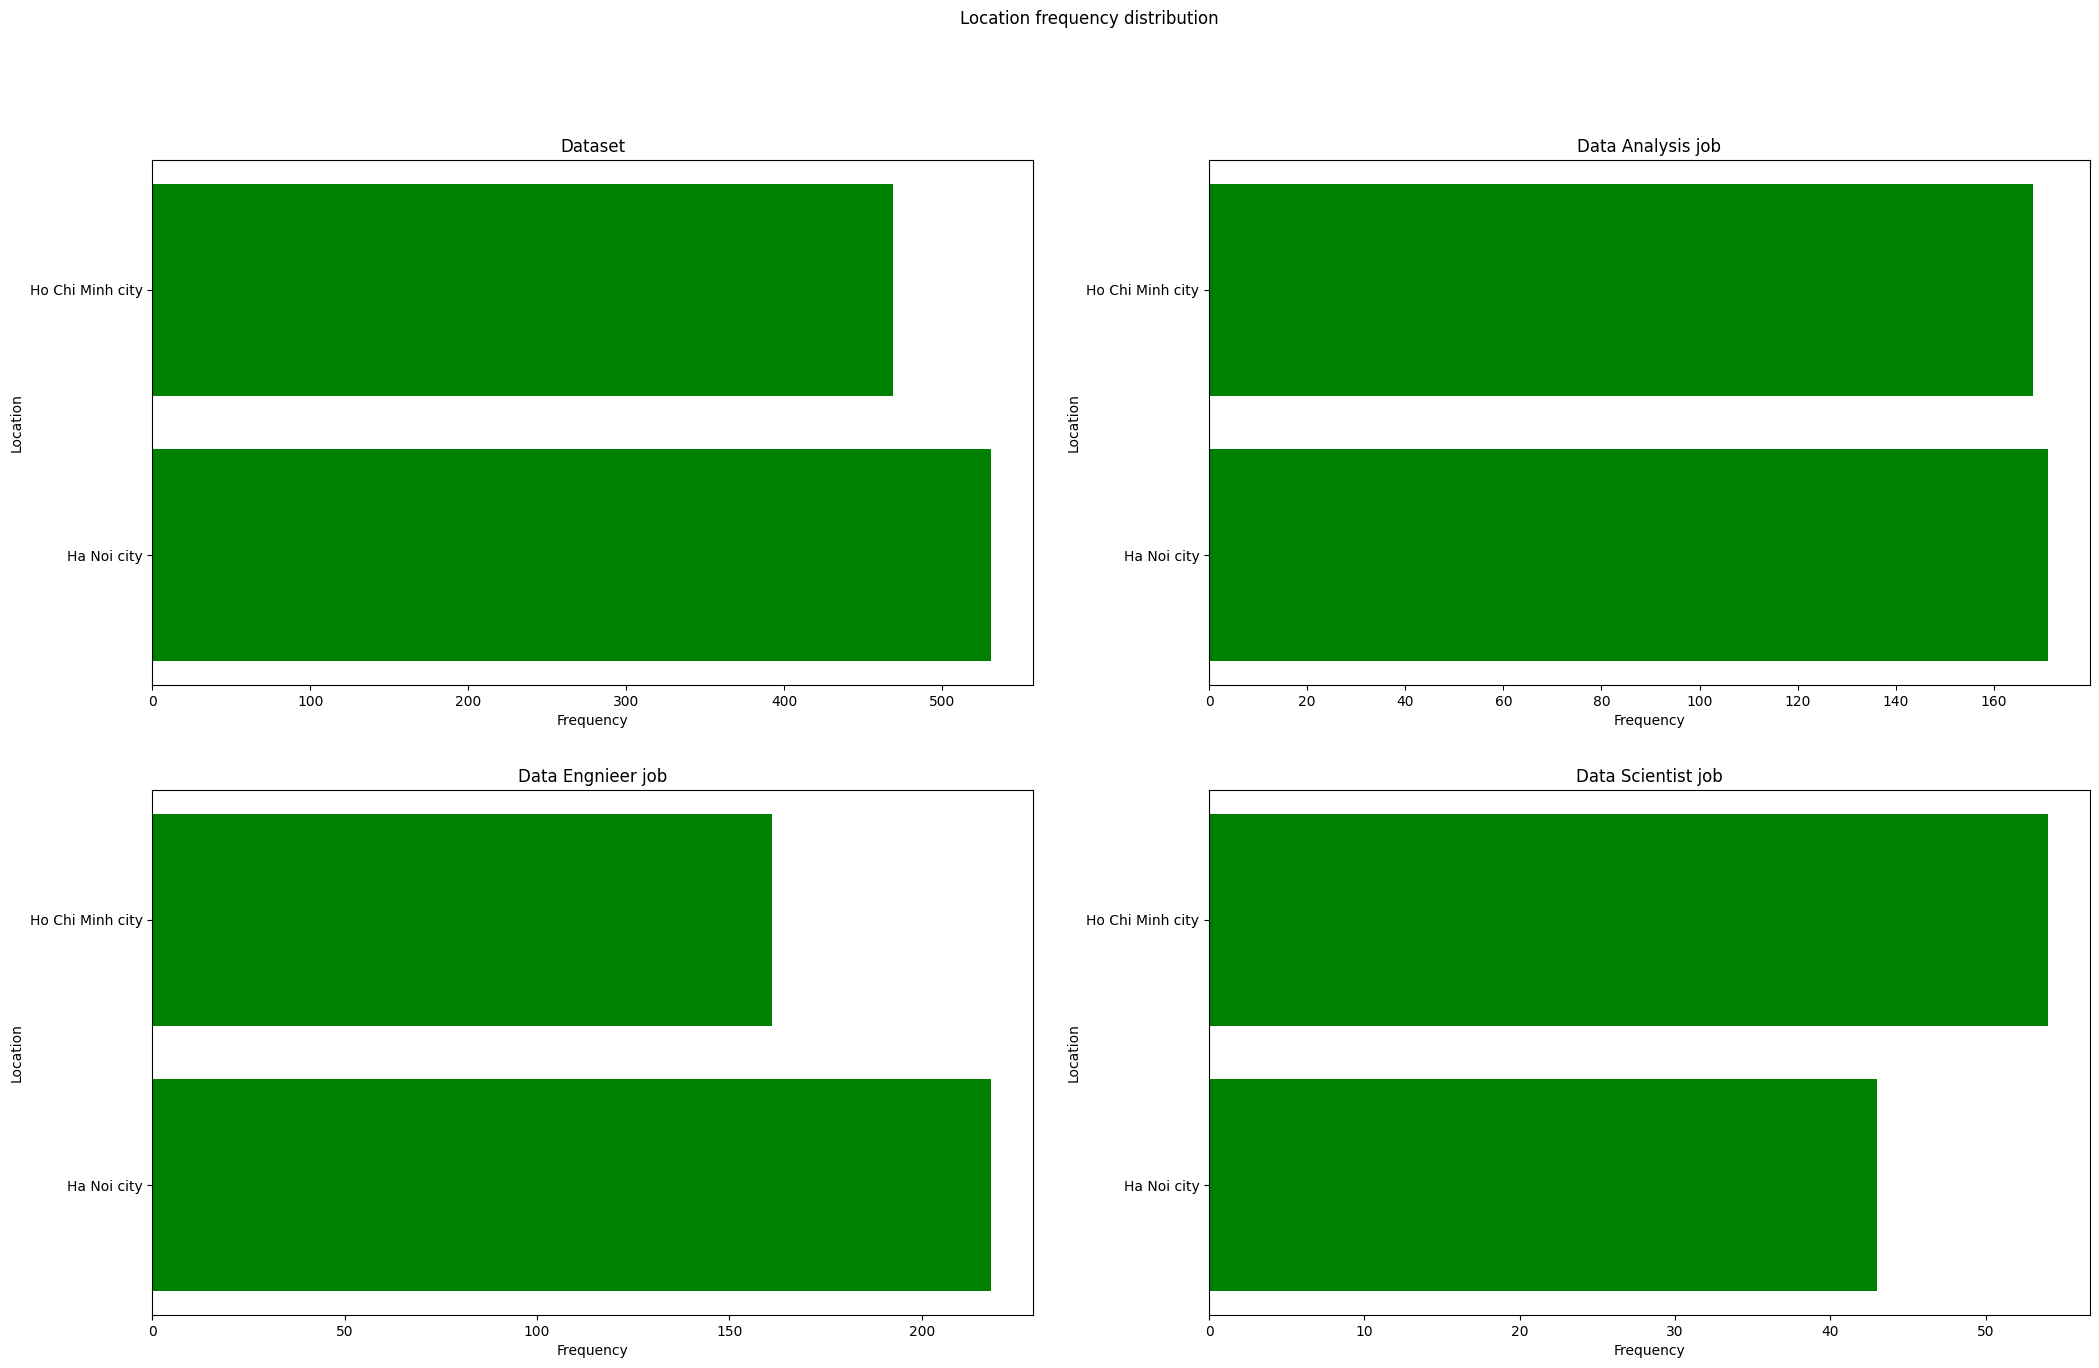

In [ ]:
# Plot frequency distribution
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
plt.barh(Location, freq_location, color='green')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title("Dataset")

plt.subplot(2, 2, 2)
plt.barh(Location_DA, freq_location_DA, color='green')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title("Data Analysis job")

plt.subplot(2, 2, 3)
plt.barh(Location_DE, freq_location_DE, color='green')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title("Data Engnieer job")

plt.subplot(2, 2, 4)
plt.barh(Location_DS, freq_location_DS, color='green')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title("Data Scientist job")

plt.suptitle('Location frequency distribution')
plt.show()

**Insight:**
After analyst the distribution of our majority job in data field, we conclude that it distribution in Ho Chi Minh city and Ho Noi city.
Moreover, in different job, the distribution might be different. For Data Engineer,number of employee mostly located in Ha Noi city.
Otherwise, Data Scientist mostly located in Ho Chi Minh city. And for Data Analyst, it distributes quite balanced in these two city

### Analyzing Level variable

In [ ]:
Level, freq_level , df_level = create_freq_dataframe(data, col="Level")
Level_DE, freq_level_DE, df_level_DE = create_freq_dataframe(data_DE, col="Level")
Level_DA, freq_level_DA, df_level_DA = create_freq_dataframe(data_DA, col="Level")
Level_DS, freq_level_DS, df_level_DS = create_freq_dataframe(data_DS, col="Level")

In [ ]:
display(Markdown("### Level frequency of dataset"))
display(df_level)

display(Markdown("### Level frequency of Data Analysis job"))
display(df_level_DA)

display(Markdown("### Level frequency of Data Engnieer job"))
display(df_level_DE)

display(Markdown("### Level frequency of Data Scientist job"))
display(df_level_DS)

### Level frequency of dataset

,Fresher,Internship,Junior,Manager,Senior
Frequency,44.000,31.000,403.000,22.000,500.0
Relative Frequency,0.044,0.031,0.403,0.022,0.5


### Level frequency of Data Analysis job

,Fresher,Internship,Junior,Manager,Senior
Frequency,19.000000,17.000000,172.000000,2.0000,129.000000
Relative Frequency,0.056047,0.050147,0.507375,0.0059,0.380531


### Level frequency of Data Engnieer job

,Fresher,Internship,Junior,Manager,Senior
Frequency,11.000000,7.00000,147.000000,5.000000,209.000000
Relative Frequency,0.029024,0.01847,0.387863,0.013193,0.551451


### Level frequency of Data Scientist job

,Fresher,Internship,Junior,Senior
Frequency,2.000000,1.000000,27.000000,67.000000
Relative Frequency,0.020619,0.010309,0.278351,0.690722


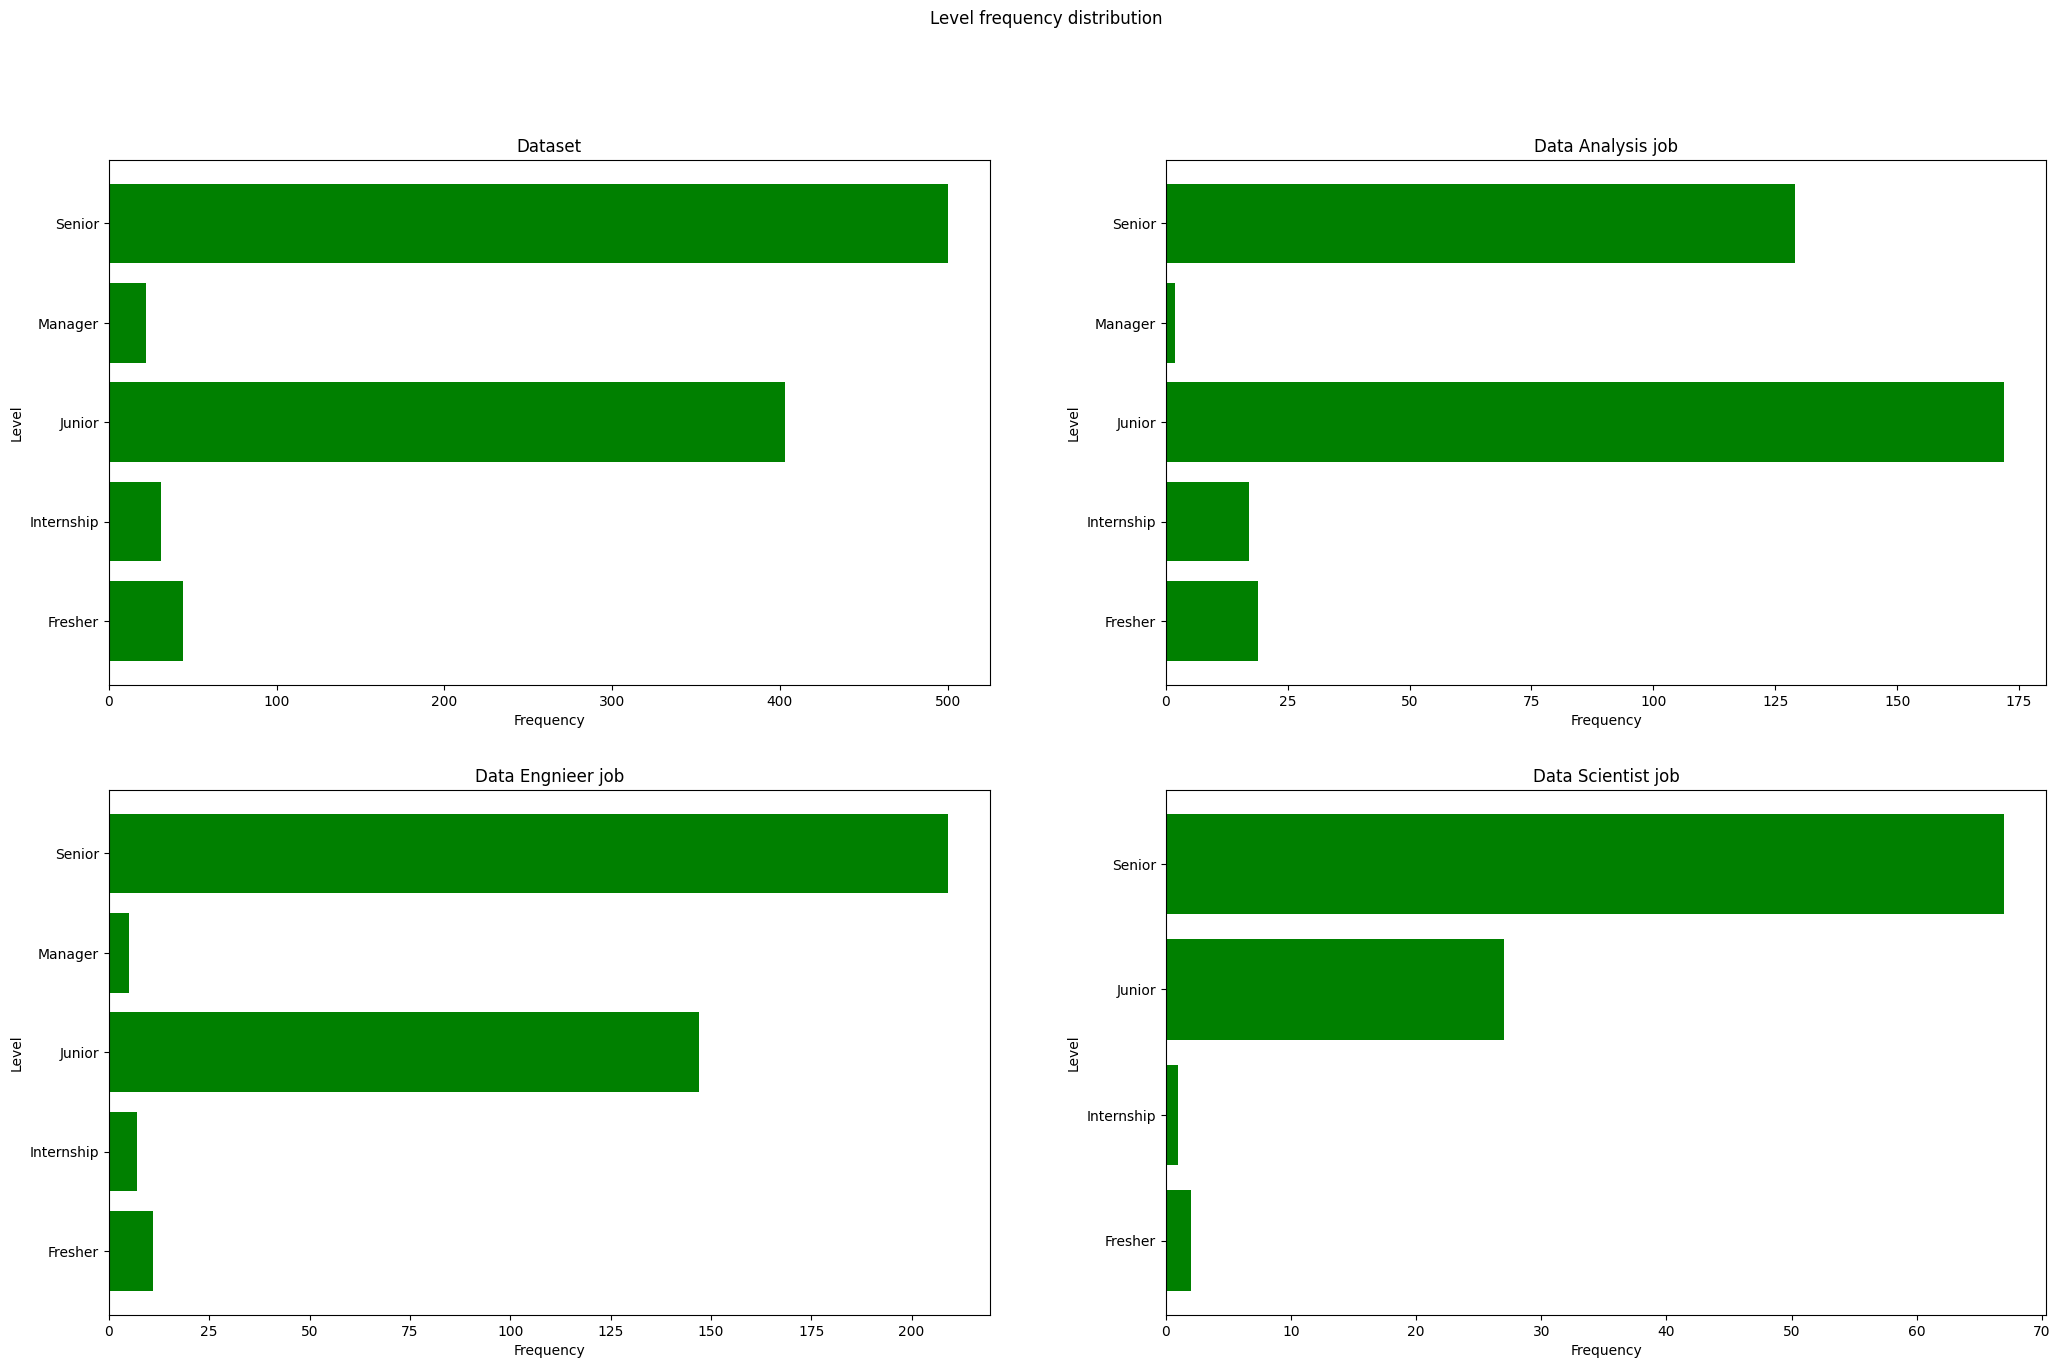

In [ ]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
plt.barh(Level, freq_level, color='green')
plt.xlabel('Frequency')
plt.ylabel('Level')
plt.title("Dataset")

plt.subplot(2, 2, 2)
plt.barh(Level_DA, freq_level_DA, color='green')
plt.xlabel('Frequency')
plt.ylabel('Level')
plt.title("Data Analysis job")

plt.subplot(2, 2, 3)
plt.barh(Level_DE, freq_level_DE, color='green')
plt.xlabel('Frequency')
plt.ylabel('Level')
plt.title("Data Engnieer job")

plt.subplot(2, 2, 4)
plt.barh(Level_DS, freq_level_DS, color='green')
plt.xlabel('Frequency')
plt.ylabel('Level')
plt.title("Data Scientist job")

plt.suptitle('Level frequency distribution')
plt.show()

**Insights:**
After analyst the distribution of our majority job in data field, we conclude that it distribution in 5 level which is Internship, Fresher, Junior, Senior and Manager.
Moreover, in different job, the level distribution might have some differences. For Data Engineer, number of employee mostly at Senior level and hardly at manager level
Otherwise in Data Analyst, Junior employee is the largest proportion and the smallest is Manager employee. And for Data Scientist, Senior is the largest proportion and Intership is
the smallest proportion. However, we don't observe any manager in this job

## **2.Analyzing numerical variables - Year of Experience, Salary Max**

* Frequency table
* Graph
* Mean, Mode, Median, Standar deviation, ....
* Check Outlier

### Analyzing "Year of experimence"

#### Frequency table & Relative frequency table

In [ ]:
Experience, freq_experience, df_experience = create_freq_dataframe(data, col="Year of Experience")
Experience_DE, freq_experience_DE, df_experience_DE = create_freq_dataframe(data_DE, col="Year of Experience")
Experience_DA, freq_experience_DA, df_experience_DA = create_freq_dataframe(data_DA, col="Year of Experience")
Experience_DS, freq_experience_DS, df_experience_DS = create_freq_dataframe(data_DS, col="Year of Experience")


In [ ]:
display(Markdown("### 'Year of Experience' frequency of dataset"))
display(df_experience)

display(Markdown("### 'Year of Experience' frequency of Data Analysis job"))
display(df_experience_DA)

display(Markdown("### 'Year of Experience' frequency of Data Engnieer job"))
display(df_experience_DE)

display(Markdown("### 'Year of Experience' frequency of Data Scientist job"))
display(df_experience_DS)

### 'Year of Experience' frequency of dataset

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,13.0,15.0
Frequency,43.000,18.000,130.00,12.000,252.000,21.000,253.000,8.000,88.000,111.000,12.000,7.000,22.000,1.000,17.000,3.000,1.000,1.000
Relative Frequency,0.043,0.018,0.13,0.012,0.252,0.021,0.253,0.008,0.088,0.111,0.012,0.007,0.022,0.001,0.017,0.003,0.001,0.001


### 'Year of Experience' frequency of Data Analysis job

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,8.0
Frequency,20.000000,10.000000,59.000000,4.000000,111.000000,6.000000,70.00000,1.00000,27.000000,23.000000,4.000000,4.000000
Relative Frequency,0.058997,0.029499,0.174041,0.011799,0.327434,0.017699,0.20649,0.00295,0.079646,0.067847,0.011799,0.011799


### 'Year of Experience' frequency of Data Engnieer job

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,7.0,8.0,10.0,12.0
Frequency,13.000000,2.000000,37.000000,7.00000,93.000000,10.000000,121.000000,1.000000,31.000000,44.000000,4.000000,2.000000,9.000000,2.000000,3.000000
Relative Frequency,0.034301,0.005277,0.097625,0.01847,0.245383,0.026385,0.319261,0.002639,0.081794,0.116095,0.010554,0.005277,0.023747,0.005277,0.007916


### 'Year of Experience' frequency of Data Scientist job

,0.0,1.0,2.0,3.0,3.5,4.0,5.0,6.0,8.0,9.0,10.0
Frequency,2.000000,10.000000,16.000000,20.000000,2.000000,11.000000,17.000000,1.000000,6.000000,1.000000,11.000000
Relative Frequency,0.020619,0.103093,0.164948,0.206186,0.020619,0.113402,0.175258,0.010309,0.061856,0.010309,0.113402


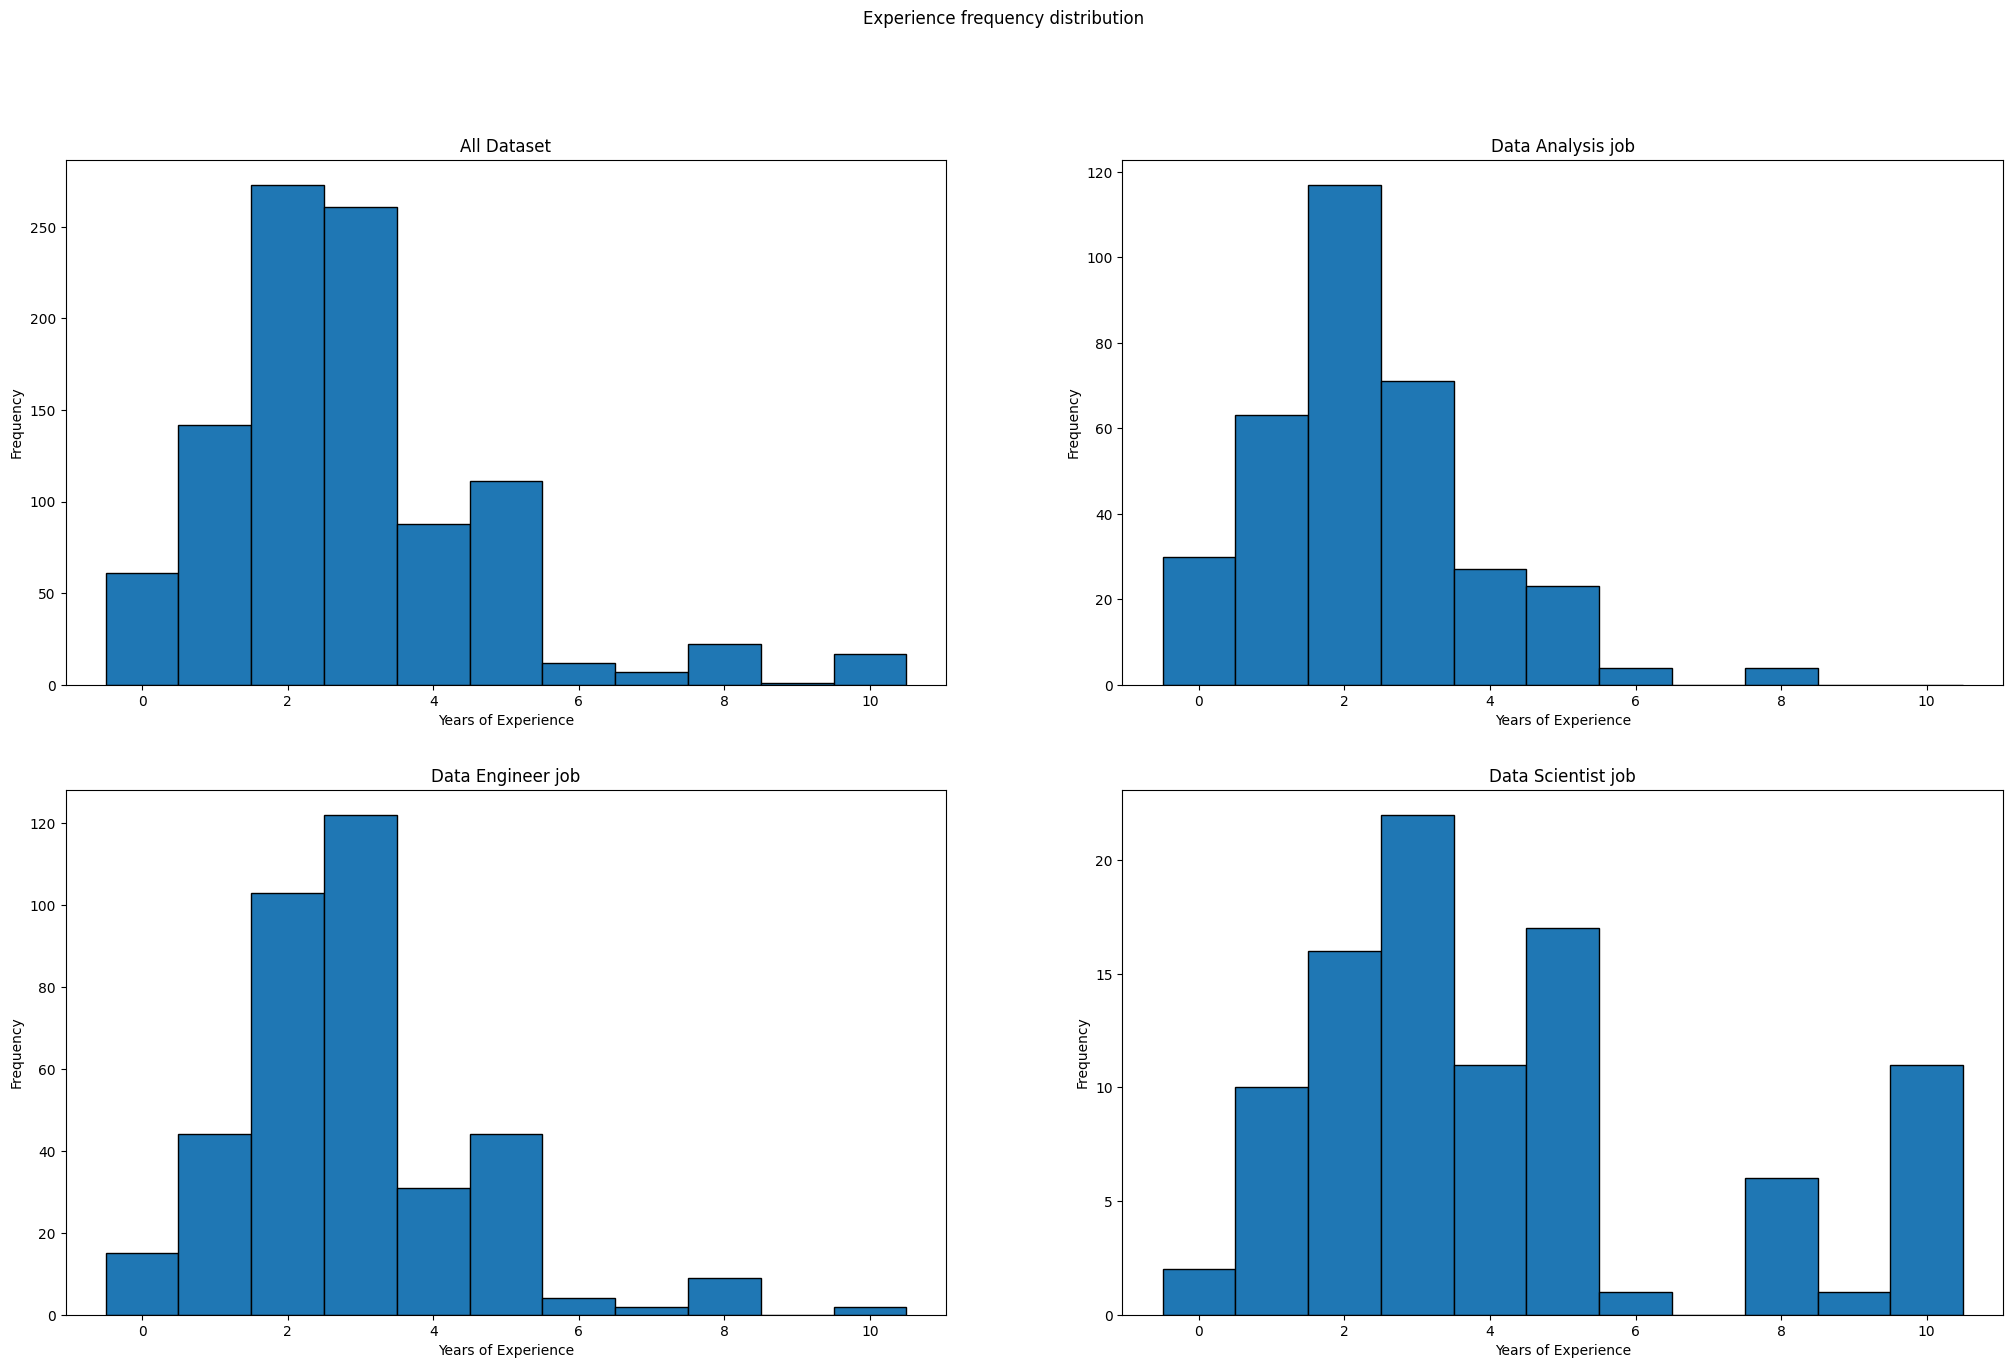

In [ ]:
bins = np.arange(0, data_DS['Year of Experience'].max()+1.5)
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
plt.hist(data["Year of Experience"], bins=bins, edgecolor='black', align='left')
plt.title("All Dataset")

plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(data_DA["Year of Experience"], bins= bins, edgecolor='black', align='left')
plt.title("Data Analysis job")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.hist(data_DE["Year of Experience"], bins=bins, edgecolor='black', align='left')
plt.title("Data Engineer job")

plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(data_DS["Year of Experience"], bins=bins, edgecolor='black', align='left')
plt.title("Data Scientist job")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.suptitle('Experience frequency distribution')
plt.show()

**Insights:**
#### Data Analyst

**Year of Experiment:**
- The majority of Data Analysts have 2.0, 3.0, and 1.0 years of experience.
- A significant portion of Data Analysts have very low experience levels (0.0 and 0.5 years).
- This distribution is right-skewed, with a concentration at lower experience levels and a few outliers at higher levels (e.g., 8.0 and 6.0 years).

#### Data Engineer

**Year of Experiment:**
- Most common years of experience are 3.0, 2.0.
- There is a more even distribution of experience levels compared to Data Scientists and Data Analysts.
- The distribution is somewhat right-skewed but less pronounced, indicating a more even spread across different experience levels.


#### Data Scientist

**Year of Experiment:**
- Most common years of experience are 3.0, 5.0, and 2.0, indicating these are typical experience levels for Data Scientists.
- There is a noticeable drop after 5.0 years, with a few outliers at higher experience levels (e.g., 10.0, 8.0, 6.0, and 9.0 years).
- The distribution appears to be right-skewed, with a long tail towards higher experience levels.

### Comparison

**Experience:**
- Data Scientists tend to have higher and more varied experience levels.
- Data Analysts generally have lower experience levels compared to Data Scientists and Engineers.

#### Mean, Mode, Median

In [ ]:
def create_statistic(df1, df2, df3, df4, title=''):
    Mean = np.array([df1[title].mean(), df2[title].mean(), df3[title].mean(), df4[title].mean()])
    Mode = np.array([df1[title].mode(), df2[title].mode(), df3[title].mode(), df4[title].mode()])
    Mode = Mode.reshape(-1)
    Median = np.array([df1[title].median(), df2[title].median(), df3[title].median(), df4[title].median()])
    Std = np.array([df1[title].std(), df2[title].std(), df3[title].std(), df4[title].std()])
    index_name = ["Dataset", "Data Analysis", "Data Engnieer", "Data Scientist"]
    df = pd.DataFrame({
        'Mean': Mean,
        'Mode': Mode,
        'Median':Median,
        'Standard Deviation': Std
    }, index=index_name)
    return df

In [ ]:
Experience_statistic = create_statistic(data, data_DA, data_DE, data_DS, "Year of Experience")
Experience_statistic.head()

,Mean,Mode,Median,Standard Deviation
Dataset,2.947500,3.0,3.0,1.991220
Data Analysis,2.358407,2.0,2.0,1.455152
Data Engnieer,2.997361,3.0,3.0,1.803874
Data Scientist,4.237113,3.0,3.5,2.774599


**Insights:**

1. **Consistency in Experience:**
  
  - Since all the mentioned histogram distributions are right-skewed distribution, we consider using median as our measures of central tendency.
   - People in roles like Data Analysis, Data Engineering, and Data Science generally have about 2 to 3 years of experience. That's what most of them have, according to the middle value called the median, which is pretty close to mean.

2. **Variety in Experience Levels:**
   - However, it can be observed that not everyone has the same amount of experience. Specifically, the standard deviation shows that the Data Scientists have a wider range of experience compared to Data Engineers or Analysts.

3. **Details About Each Role:**
    - Data scientists typically have the most experience according to the measures of central tendency. They have been doing their job for about 3.5 years and even around four years on average. Engineers are next, with around three years. Analysts have slightly less, around two years.


4. **Mode**
   - Overall, the most common number of years of experience for most these roles is about 3 years, expect the Data Analysis role.

*Conclusions:*
- Most requirements for these roles require a consistent level of experience (2–3 years).
- Data scientists have a wider range of experience levels and can be considered to have a little more experience.
- Data Analysts continue to show that this role requires lower experience levels compared to Data Scientists and Engineers based on the measures of central tendency.

####Check outliers

In [ ]:
def check_outlier(df,group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1

    # Filter outliers based on IQR
    outlier_indices = np.where((group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR)))[0]
    outliers_IQR_df = pd.DataFrame(df.iloc[outlier_indices])
    print('Number of ouliers in original data:', len(outliers_IQR_df))
    display(outliers_IQR_df)


In [ ]:
print("Check outliers of datasets")
check_outlier(data,data["Year of Experience"])

Check outliers of datasets
Number of ouliers in original data: 45


,Location,Due Date,Level,Title,Year of Experience,Salary Max
68,Ha Noi city,2023,Senior,Data Architect,10.0,4500
201,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,4000
266,Ha Noi city,2023,Senior,Data Engineer,8.0,3500
298,Ha Noi city,2024,Senior,Data Scientist,10.0,3500
301,Ho Chi Minh city,2023,Senior,Data Analyst,8.0,4000
302,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,4000
307,Ha Noi city,2024,Senior,Data Scientist,10.0,3000
325,Ho Chi Minh city,2023,Senior,Data Scientist,9.0,3000
400,Ha Noi city,2024,Manager,AI Engineer,10.0,10000
415,Ha Noi city,2024,Manager,AI Engineer,10.0,5000


In [ ]:
print("Check outliers of Data Analyst job")
check_outlier(data_DA,data_DA["Year of Experience"])

Check outliers of Data Analyst job
Number of ouliers in original data: 4


,Location,Due Date,Level,Title,Year of Experience,Salary Max
301,Ho Chi Minh city,2023,Senior,Data Analyst,8.0,4000
717,Ho Chi Minh city,2023,Senior,Data Analyst,8.0,5300
780,Ho Chi Minh city,2023,Senior,Data Analyst,8.0,3000
847,Ho Chi Minh city,2024,Senior,Data Analyst,8.0,5000


In [ ]:
print("Check outliers of Data Engnieerb job")
check_outlier(data_DE,data_DE["Year of Experience"])

Check outliers of Data Engnieerb job
Number of ouliers in original data: 16


,Location,Due Date,Level,Title,Year of Experience,Salary Max
201,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,4000
266,Ha Noi city,2023,Senior,Data Engineer,8.0,3500
302,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,4000
444,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,3000
486,Ha Noi city,2023,Senior,Data Engineer,10.0,5000
487,Ho Chi Minh city,2023,Senior,Data Engineer,10.0,5000
532,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,5000
558,Ha Noi city,2023,Senior,Data Engineer,8.0,4660
610,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,3000
686,Ho Chi Minh city,2023,Senior,Data Engineer,8.0,4000


In [ ]:
print("Check outliers of Data Scientist job")
check_outlier(data_DS,data_DS["Year of Experience"])

Check outliers of Data Scientist job
Number of ouliers in original data: 11


,Location,Due Date,Level,Title,Year of Experience,Salary Max
298,Ha Noi city,2024,Senior,Data Scientist,10.0,3500
307,Ha Noi city,2024,Senior,Data Scientist,10.0,3000
439,Ha Noi city,2023,Senior,Data Scientist,10.0,4000
520,Ha Noi city,2023,Senior,Data Scientist,10.0,5085
521,Ho Chi Minh city,2023,Senior,Data Scientist,10.0,5085
527,Ho Chi Minh city,2023,Senior,Data Scientist,10.0,5000
536,Ha Noi city,2023,Senior,Data Scientist,10.0,5000
556,Ho Chi Minh city,2023,Senior,Data Scientist,10.0,4660
557,Ha Noi city,2023,Senior,Data Scientist,10.0,4660
595,Ha Noi city,2023,Senior,Data Scientist,10.0,3390


1.Data Analyst (DA) Outliers:

    - Total Outliers: 4
    - Highest Outlier: 8.0
    - Lowest Outlier: 8.0
    - Common Outliers: 8.0

2.Data Engineer (DE) Outliers:

     - Total Outliers: 16
     - Highest Outlier: 10.0
     - Lowest Outlier: 7.0
     - Common Outliers: 8.0
3. Data Scientist (DS) Outliers:
     - Total Outliers: 10
     - All Values: 10

**Insight:**

1. **Overall Dataset Outliers**:
   - It can be observed that the dataset has 45 outliers, but the total outliers of our considered roles are 31, which accounts for a high percentage of the total dataset about years of experience. Therefore, it indicates that those role can be the main factors contributing to outliers in the dataset beyond years of experience.
   

2. **Common Outliers**:
   - Outliers exist in both Data Analyst and Data Engineer roles, all with a value of 8.0 years of experience.

3. **Data Scientist Outliers**:
   - Outliers exist in Data Scientist role, all with a value of 10.0 years of experience..

*Conclusions:*
- Data Scientis, Data Analysts and Data Engineers have outliers, but their removal may not significantly affect the overall analysis based on what we want to find out from the data. However, it's important to consider whether these outliers are valid data points or errors before removing them.


After analyzing the years of experience data, we discovered that the majority of outliers represent higher experience levels, such as 8, 9, 10, and 11 years. These values are not outliers in the usual sense, but they are significantly different from the rest of the data points.

-> We exclude these outliers and concentrate on the core range of experience years.

In [ ]:
data=data[data['Year of Experience'] <= 6]
data_DA = data_DA[data_DA['Year of Experience'] <= 6]
data_DE = data_DE[data_DE['Year of Experience'] <= 6]
data_DS = data_DS[data_DS['Year of Experience'] <= 6]

In [ ]:
Experience, freq_experience, df_experience = create_freq_dataframe(data, col="Year of Experience")
Experience_DE, freq_experience_DE, df_experience_DE = create_freq_dataframe(data_DE, col="Year of Experience")
Experience_DA, freq_experience_DA, df_experience_DA = create_freq_dataframe(data_DA, col="Year of Experience")
Experience_DS, freq_experience_DS, df_experience_DS = create_freq_dataframe(data_DS, col="Year of Experience")

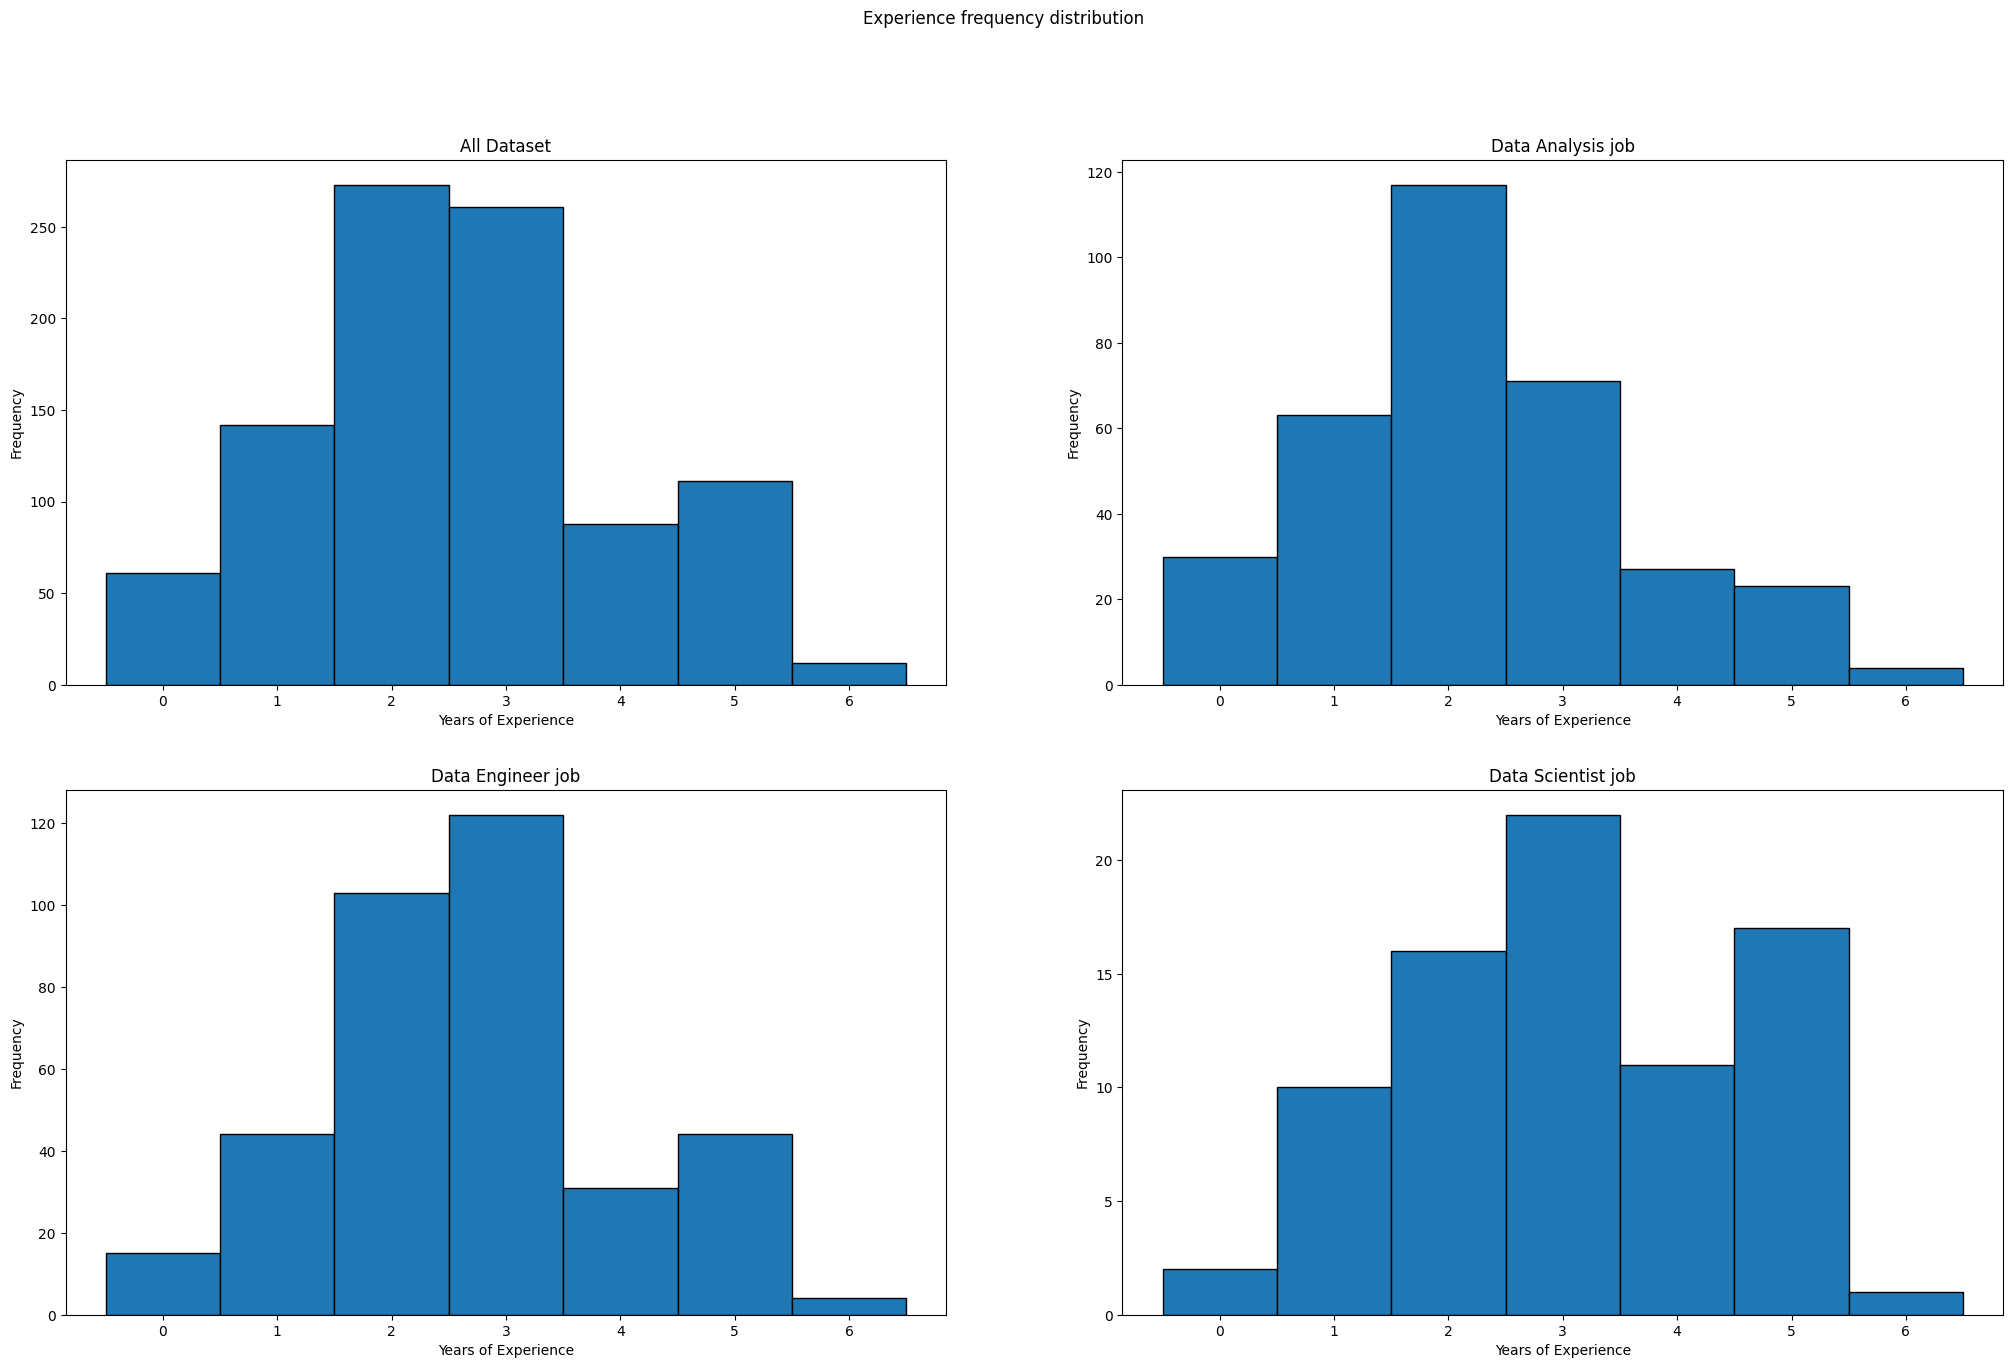

In [ ]:
bins = np.arange(0, data_DS['Year of Experience'].max()+1.5)
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
plt.hist(data["Year of Experience"], bins=bins, edgecolor='black', align='left')
plt.title("All Dataset")

plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(data_DA["Year of Experience"], bins= bins, edgecolor='black', align='left')
plt.title("Data Analysis job")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.hist(data_DE["Year of Experience"], bins=bins, edgecolor='black', align='left')
plt.title("Data Engineer job")

plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(data_DS["Year of Experience"], bins=bins, edgecolor='black', align='left')
plt.title("Data Scientist job")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

plt.suptitle('Experience frequency distribution')
plt.show()

In [ ]:
Experience_statistic = create_statistic(data, data_DA, data_DE, data_DS, "Year of Experience")
Experience_statistic.head()

,Mean,Mode,Median,Standard Deviation
Dataset,2.615506,3.0,2.5,1.380817
Data Analysis,2.291045,2.0,2.0,1.325558
Data Engnieer,2.738292,3.0,3.0,1.295058
Data Scientist,3.088608,3.0,3.0,1.440618


### Analyzing Salary Max

#### Frequency / Relative Frequency table

In [ ]:
def create_freq_continuous_variable(variable ):
    n = len(variable)
    k = int(np.ceil(2 * n**(1/3)))
    hist, bin_edges = np.histogram(variable, bins=k)
    frequency_table = {
    'Bin Range': [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)],
    'Frequency': hist,
    'Relative Frequency': [hist[i]/sum(hist) for i in range(len(hist))]
    }
    frequency_df = pd.DataFrame(frequency_table)
    return bin_edges, frequency_df

In [ ]:
bins, frequency_df = create_freq_continuous_variable(data["Salary Max"])
bins_DA, frequency_df_DA = create_freq_continuous_variable(data_DA["Salary Max"])
bins_DE, frequency_df_DE = create_freq_continuous_variable(data_DE["Salary Max"])
bins_DS, frequency_df_DS = create_freq_continuous_variable(data_DS["Salary Max"])

In [ ]:
display(Markdown("### 'Salary Max' frequency of dataset"))
display(frequency_df)

display(Markdown("### 'Salary Max' frequency of Data Analysis job"))
display(frequency_df_DA)

display(Markdown("### 'Salary Max' frequency of Data Engnieer job"))
display(frequency_df_DE)

display(Markdown("### 'Salary Max' frequency of Data Scientist job"))
display(frequency_df_DS)

### 'Salary Max' frequency of dataset

,Bin Range,Frequency,Relative Frequency
0,85.00 - 405.75,33,0.034810
1,405.75 - 726.50,40,0.042194
2,726.50 - 1047.25,70,0.073840
3,1047.25 - 1368.00,143,0.150844
4,1368.00 - 1688.75,136,0.143460
5,1688.75 - 2009.50,128,0.135021
6,2009.50 - 2330.25,102,0.107595
7,2330.25 - 2651.00,132,0.139241
8,2651.00 - 2971.75,55,0.058017
9,2971.75 - 3292.50,80,0.084388


### 'Salary Max' frequency of Data Analysis job

,Bin Range,Frequency,Relative Frequency
0,85.00 - 400.36,17,0.050746
1,400.36 - 715.71,27,0.080597
2,715.71 - 1031.07,41,0.122388
3,1031.07 - 1346.43,56,0.167164
4,1346.43 - 1661.79,61,0.182090
5,1661.79 - 1977.14,30,0.089552
6,1977.14 - 2292.50,30,0.089552
7,2292.50 - 2607.86,36,0.107463
8,2607.86 - 2923.21,18,0.053731
9,2923.21 - 3238.57,16,0.047761


### 'Salary Max' frequency of Data Engnieer job

,Bin Range,Frequency,Relative Frequency
0,170.00 - 582.33,9,0.024793
1,582.33 - 994.67,12,0.033058
2,994.67 - 1407.00,63,0.173554
3,1407.00 - 1819.33,83,0.228650
4,1819.33 - 2231.67,68,0.187328
5,2231.67 - 2644.00,70,0.192837
6,2644.00 - 3056.33,43,0.118457
7,3056.33 - 3468.67,5,0.013774
8,3468.67 - 3881.00,7,0.019284
9,3881.00 - 4293.33,0,0.000000


### 'Salary Max' frequency of Data Scientist job

,Bin Range,Frequency,Relative Frequency
0,210.00 - 631.11,1,0.012658
1,631.11 - 1052.22,5,0.063291
2,1052.22 - 1473.33,2,0.025316
3,1473.33 - 1894.44,11,0.139241
4,1894.44 - 2315.56,14,0.177215
5,2315.56 - 2736.67,22,0.278481
6,2736.67 - 3157.78,21,0.265823
7,3157.78 - 3578.89,1,0.012658
8,3578.89 - 4000.00,2,0.025316


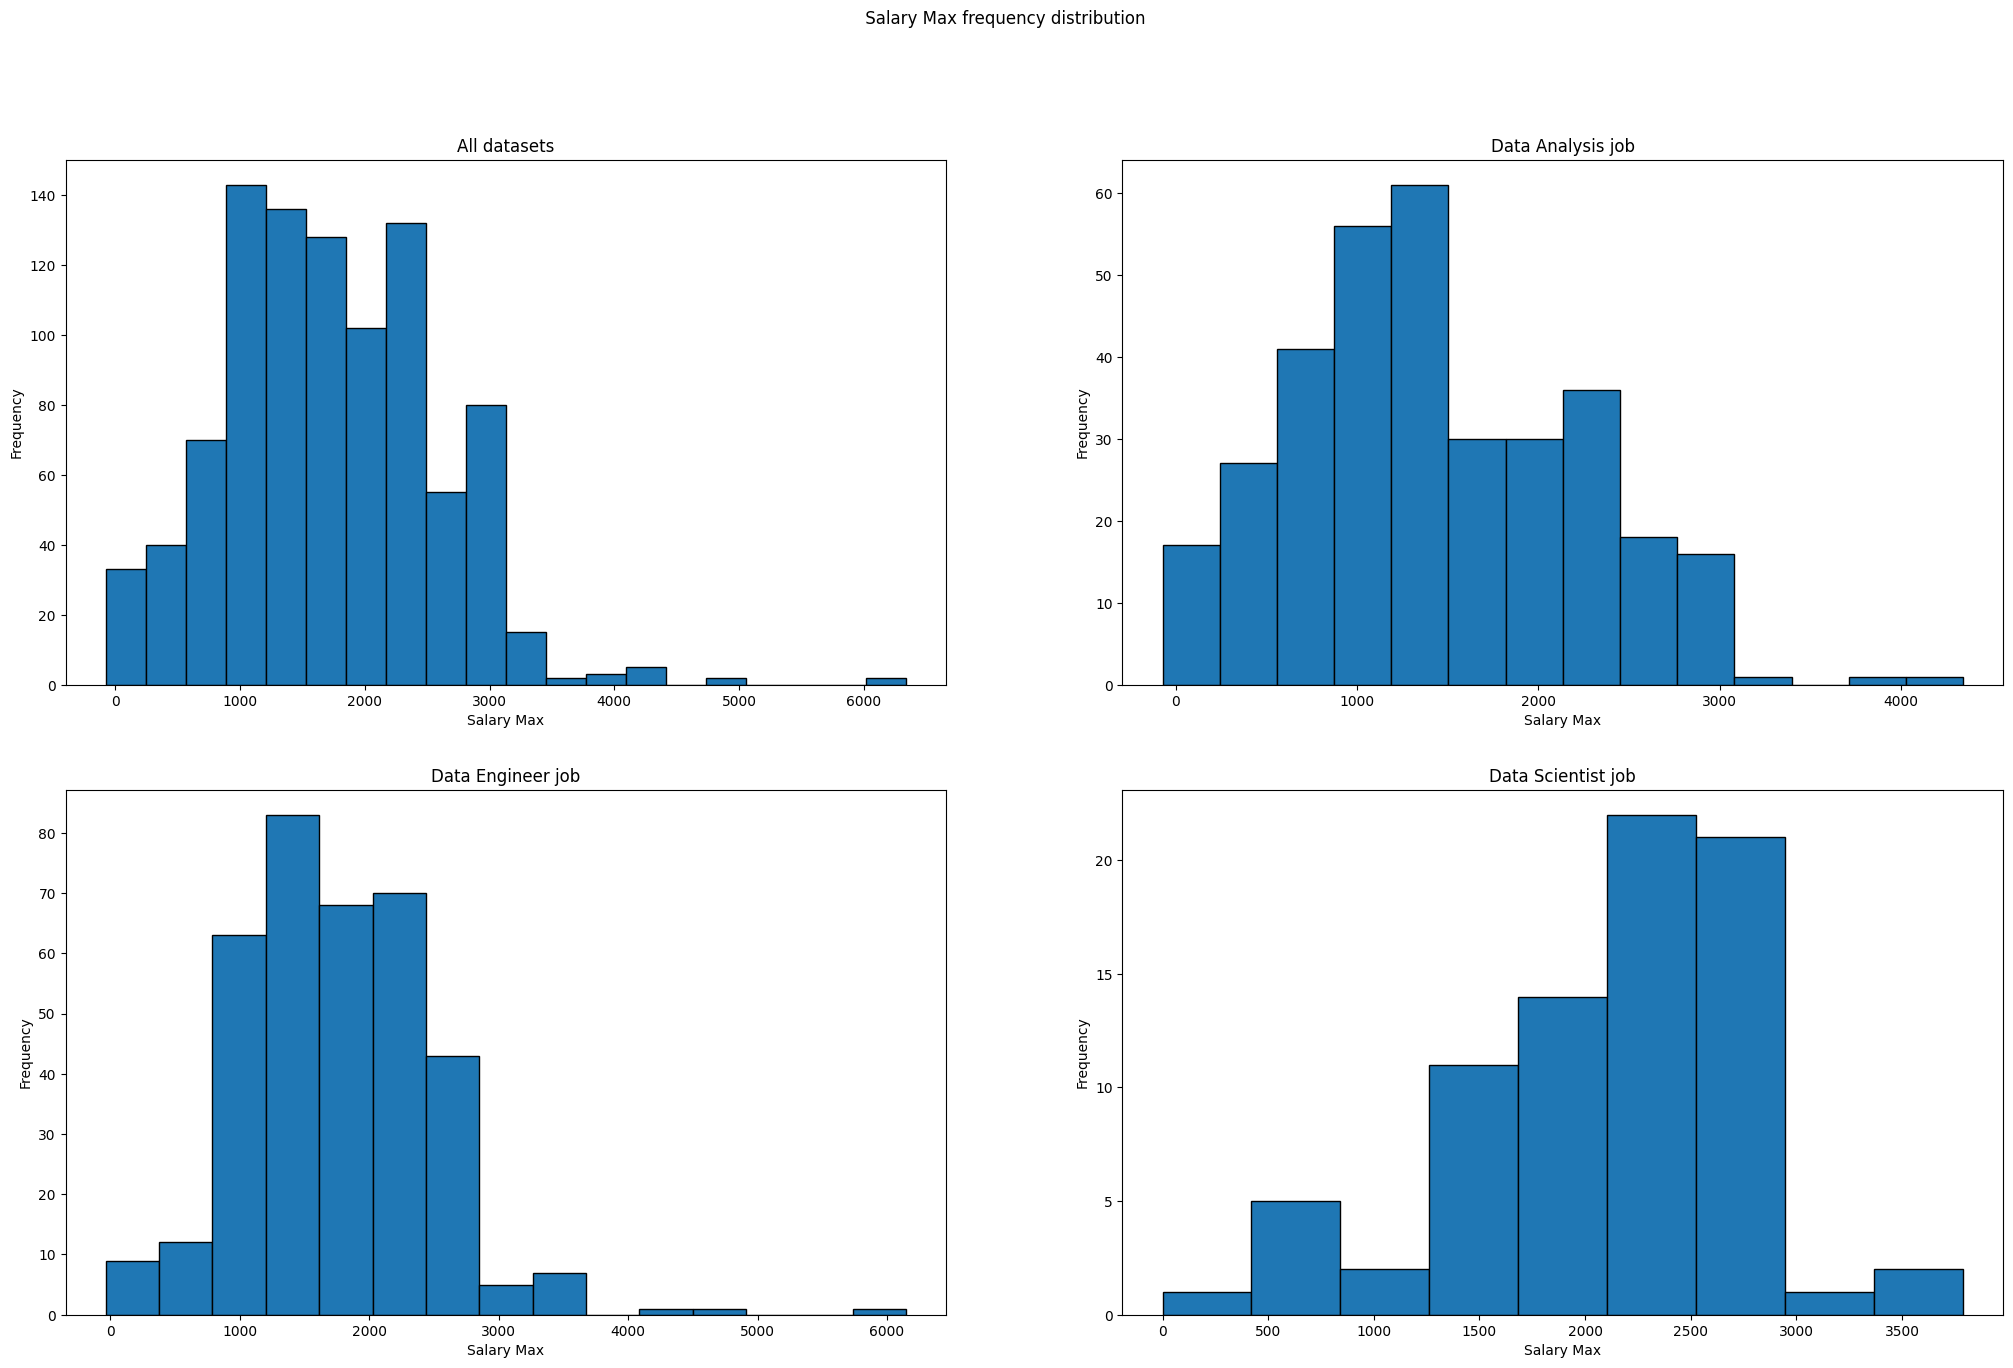

In [ ]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
plt.hist(data["Salary Max"], bins=bins, edgecolor='black', align='left')
plt.title("All datasets")
plt.xlabel("Salary Max")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(data_DA["Salary Max"], bins= bins_DA, edgecolor='black', align='left')
plt.title("Data Analysis job")
plt.xlabel("Salary Max")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.hist(data_DE["Salary Max"], bins=bins_DE, edgecolor='black', align='left')
plt.title("Data Engineer job")
plt.xlabel("Salary Max")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(data_DS["Salary Max"], bins=bins_DS, edgecolor='black', align='left')
plt.title("Data Scientist job")
plt.xlabel("Salary Max")
plt.ylabel("Frequency")

plt.suptitle(' Salary Max frequency distribution')
plt.show()

**Insights:**
- Data Analysis: The right-skewed histogram distribution is evident, and the most common wage maximum for this position is around $\$1500 (\$1346.43 - \$1661.79)$.
- Data Engineer: The right-skewed histogram distribution is evident, and the highest salary for this position is around  $\$1600 (\$1407.00 - \$1819.33)$.
- Data Science: The right-skewed histogram distribution is evident, and the most common income maximum for this position is around $\$2600 (\$2376.67 - \$2918.33). $
In conclusion, even if data analysis and data engineering have quite similar most frequent income maximums, the most frequent salary maximum of data sciences is noticeably greater than those of data analysis and data engineering.

*Conclusions:*
- Even if data analysis and data engineering have similar most frequent income maximums, the most frequent salary maximum of data sciences is noticeably greater than those of data analysis and data engineering.

#### Mean, Mode, Median

In [ ]:
Salary_statistic = create_statistic(data, data_DA, data_DE, data_DS, "Salary Max")
Salary_statistic.head()

,Mean,Mode,Median,Standard Deviation
Dataset,1871.856540,2500,1800.0,851.037978
Data Analysis,1582.988060,1500,1500.0,785.367708
Data Engnieer,1981.966942,2500,2000.0,771.908361
Data Scientist,2309.088608,3000,2500.0,702.250671


**Insights:**
1. **Salary Distribution**:
   - Since all salary distributions are right-skewed, the average salary is higher than the middle point salary due to some very high salaries. Therefore, we refer to use the median as our measure of central tendency.

2. **Central Salary Measure**:
   - The middle point (median) is a better indicator of typical salaries for each job because it’s not affected by extremely high salaries like the average is.

3. **Dataset Role**:
   - Typical salary is 1800, with a lot of variation. Some salaries are much higher than 2500.

4. **Data Analyst Role**:
   - Typical salary is 1500, with moderate variation. Some salaries are higher than 1500.

5. **Data Engineer Role**:
   - Typical salary is 2000, with moderate variation. Some salaries are higher than 2500.

6. **Data Scientist Role**:
   - Typical salary is 2500, with a lot of variation. Some salaries are much higher than 3000.
   
*Conclusion:*

- **Right-Skewed Salaries**: High salaries in all roles mean average salaries are higher than typical salaries.
- **Median Salaries**: Use median values (1800, 1500, 2000, 2500) to understand what most people earn, as it’s more reliable than average.

#### Check outlier

In [ ]:
print("Check outliers of datasets")
check_outlier(data,data["Salary Max"])

Check outliers of datasets
Number of ouliers in original data: 9


,Location,Due Date,Level,Title,Year of Experience,Salary Max
133,Ho Chi Minh city,2024,Senior,Data Architect,5.0,4500
242,Ha Noi city,2023,Senior,Data Engineer,4.0,4500
460,Ho Chi Minh city,2023,Senior,Data Architect,5.0,4500
741,Ho Chi Minh city,2024,Manager,Data Science,6.0,6500
782,Ho Chi Minh city,2023,Senior,Data Analyst,3.0,4500
790,Ho Chi Minh city,2023,Senior,Data Engineer,5.0,5000
817,Ho Chi Minh city,2023,Senior,Big Data,5.0,4575
875,Ho Chi Minh city,2023,Senior,Data Architect,6.0,5000
967,Ha Noi city,2023,Senior,Data Engineer,6.0,6355


In [ ]:
print("Check outliers of DA")
check_outlier(data_DA,data_DA["Salary Max"])

Check outliers of DA
Number of ouliers in original data: 1


,Location,Due Date,Level,Title,Year of Experience,Salary Max
782,Ho Chi Minh city,2023,Senior,Data Analyst,3.0,4500


In [ ]:
print("Check outliers of DE")
check_outlier(data_DE,data_DE["Salary Max"])

Check outliers of DE
Number of ouliers in original data: 3


,Location,Due Date,Level,Title,Year of Experience,Salary Max
242,Ha Noi city,2023,Senior,Data Engineer,4.0,4500
790,Ho Chi Minh city,2023,Senior,Data Engineer,5.0,5000
967,Ha Noi city,2023,Senior,Data Engineer,6.0,6355


In [ ]:
print("Check outliers of DS")
check_outlier(data_DS,data_DS["Salary Max"])

Check outliers of DS
Number of ouliers in original data: 1


,Location,Due Date,Level,Title,Year of Experience,Salary Max
132,Ho Chi Minh city,2024,Internship,Data Scientist,0.0,210


In [ ]:
# data=data[~data['Salary Max'].isin(outlier)]
# data_DA = data_DA[~data_DA['Salary Max'].isin(outlier_DA)]
# data_DE = data_DE[~data_DE['Salary Max'].isin(outlier_DE)]
# data_DS = data_DS[~data_DS['Salary Max'].isin(outlier_DS)]

**Observations:**
1. **Overall Dataset Outliers**:
   - **Total Outliers**: 11
   - **Values**: 4500, 4500, 4500, 4500, 5000, 6500, 4500, 5000, 4575, 5000, 6355
   - **Highest Outlier**: 6500
   - **Lowest Outlier**: 4500
   - **Range of Outliers**: 4500 to 6500

2. **Data Analyst (DA) Outliers**:
   - **Total Outliers**: 1
   - **Value**: 4500
   - **Highest Outlier**: 4500
   - **Lowest Outlier**: 4500
   - **Range of Outliers**: 4500

3. **Data Engineer (DE) Outliers**:
   - **Total Outliers**: 1
   - **Value**: 4500
   - **Highest Outlier**: 4500
   - **Lowest Outlier**: 4500
   - **Range of Outliers**: 4500

4. **Data Scientist (DS) Outliers**:
   - **Total Outliers**: 7
   - **Values**: 210, 5085, 5085, 5085, 5085, 5085, 5085
   - **Highest Outlier**: 5085
   - **Lowest Outlier**: 210
   - **Range of Outliers**: 210 to 5085

**Insights:**
1. **Overall Dataset**:
   - There are many high salaries, ranging from 4500 to 6500.

2. **Data Analyst**:
   - Only one high salary at 4500, showing little variation in extreme salaries.

3. **Data Engineer**:
   - Similar to Data Analyst, with only one high salary at 4500.

4. **Data Scientist**:
   - A wide range of outliers from 210 to 5085, showing more variation in extreme salaries. This is to be expected given that the Data Scientist income distribution does not follow the strict right-skewed trend as the Data Analyst and Data Engineer.

*Conclusions:*
  - **Data Analyst**: Removing the single outlier can make the data more accurate.
  - **Data Engineer**: Removing the single outlier can provide a clearer picture.
  - **Data Scientist**: Given the many outliers, we need to analyze them carefully before removing to ensure important high salary data isn’t lost.

### **Advices for Student**:

- **Data Analyst**: Aim for 2 years of experience, with a potential salary around $\$1500$.

- **Data Engineer**: Target 3 years of experience, expecting a salary near $\$2500$.

- **Data Scientist**: Aim for 3.5 years of experience, with a potential salary around $\$2500$, potentially reaching $3000 or more for outliers.

# III. Relationship between Salary and Experience, Title, Level

In [ ]:
def check(dataframe):
    # Create a copy of the filtered DataFrame
    df = dataframe.copy()
    df.drop(columns=["Title", "Level", "Due Date", "Location"], inplace=True)
    data = pd.DataFrame()
    year = [-1, 1, 2, 4,6]

    for i in range(4):
        sub_data = df[(df["Year of Experience"] > year[i]) & (df["Year of Experience"] <= year[i+1])].copy()
        if i == 0:
            name_label = "< " + str(year[i+1])
        else:
            name_label = str(year[i]) + " - " + str(year[i+1])
        sub_data.drop(columns=["Year of Experience"], inplace=True)
        Mean = sub_data.mean().round(0)
        data[name_label] = Mean

    return data

In [ ]:
DA = check(data_DA)
DE = check(data_DE)
DS = check(data_DS)
Dataset = check(data)
Relationship = pd.concat([Dataset, DA, DE, DS], axis=0, ignore_index=True)
new_index = ['Dataset', 'Data Analyst', 'Data Engineer', 'Data Scientist']
Relationship.index = new_index
Relationship


,< 1,1 - 2,2 - 4,4 - 6
Dataset,1023.0,1531.0,2228.0,2851.0
Data Analyst,866.0,1433.0,2075.0,2689.0
Data Engineer,1223.0,1558.0,2228.0,2854.0
Data Scientist,1479.0,1860.0,2577.0,2771.0


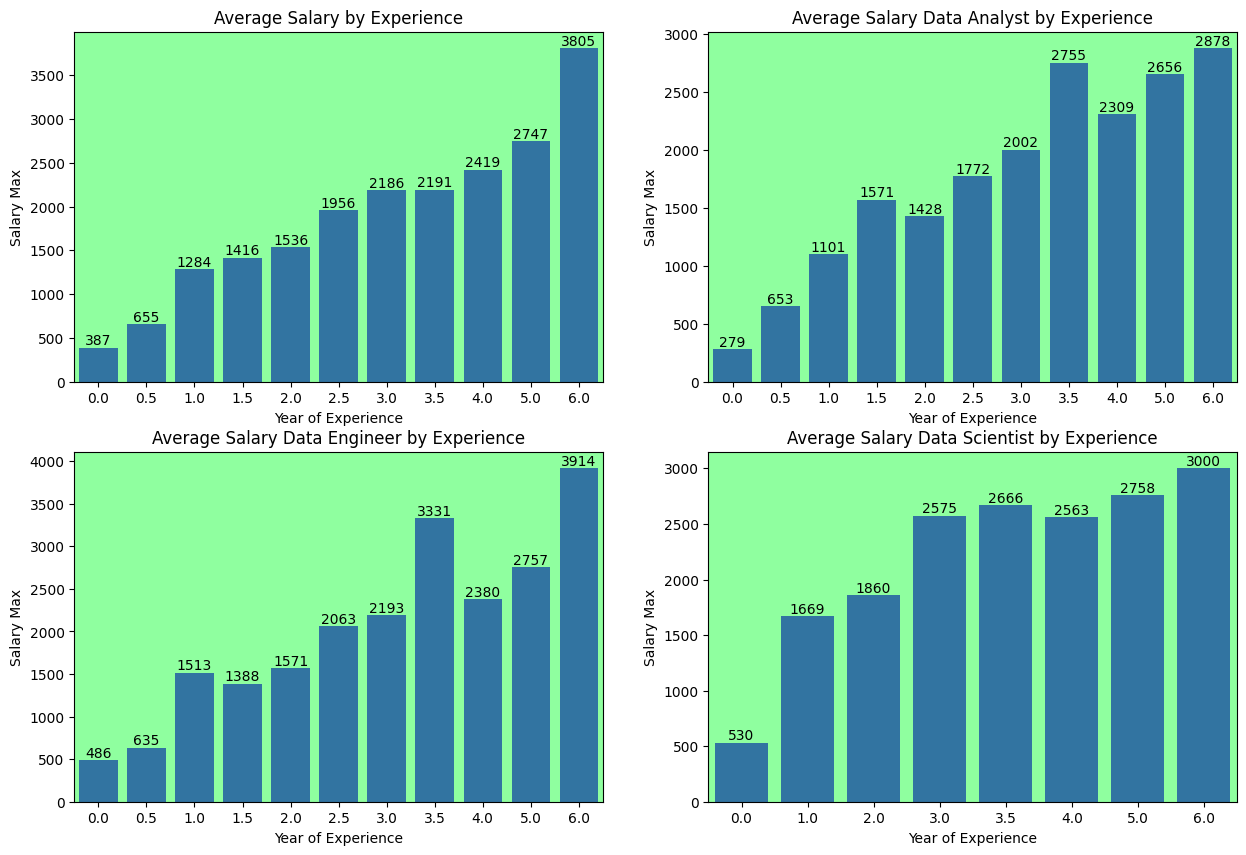

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
experience_level_salary = data.groupby('Year of Experience')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Year of Experience", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Year of Experience', title='Average Salary by Experience')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.subplot(2, 2, 2)
experience_level_salary = data_DA.groupby('Year of Experience')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Year of Experience", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Year of Experience', title='Average Salary Data Analyst by Experience')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.subplot(2, 2, 3)
experience_level_salary = data_DE.groupby('Year of Experience')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Year of Experience", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Year of Experience', title='Average Salary Data Engineer by Experience')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.subplot(2, 2, 4)
experience_level_salary = data_DS.groupby('Year of Experience')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Year of Experience", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Year of Experience', title='Average Salary Data Scientist by Experience')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.show()

**Conclusion**:
* Data Scientist Salary Trends: Data Scientists consistently have the highest salaries across all experience bands, except for the 4 – 6 years band where Data Engineers surpass them slightly. This indicates a high salary growth potential and strong demand for Data Scientists
* Data Engineer Salary Trends: Data Engineers start with high salaries and experience steady growth, eventually surpassing Data Scientists in the 4 – 6 years band. This suggests a lucrative career path with substantial long-term earnings.
* Data Analyst Salary Trends: Data Analysts start with lower salaries compared to Data Engineers and Data Scientists. However, their salaries grow significantly over time, though they generally remain below the dataset average.
*	Overall Dataset Comparison: The dataset average serves as a useful benchmark. Both Data Engineers and Data Scientists consistently earn above the dataset average, while Data Analysts earn below the average, especially in the early career stages.
* 	Career Path Consideration:
**	Aspiring Data Professionals: Those entering the data field should consider roles in Data Science or Data Engineering for higher initial and long-term compensation.
**	Mid-Career Professionals: Data Engineers and Data Scientists see substantial salary growth. Professionals in these roles should leverage this growth through continuous skill development and specialization.

->	By understanding these salary trends, students can make informed decisions that align with career aspirations objectives.


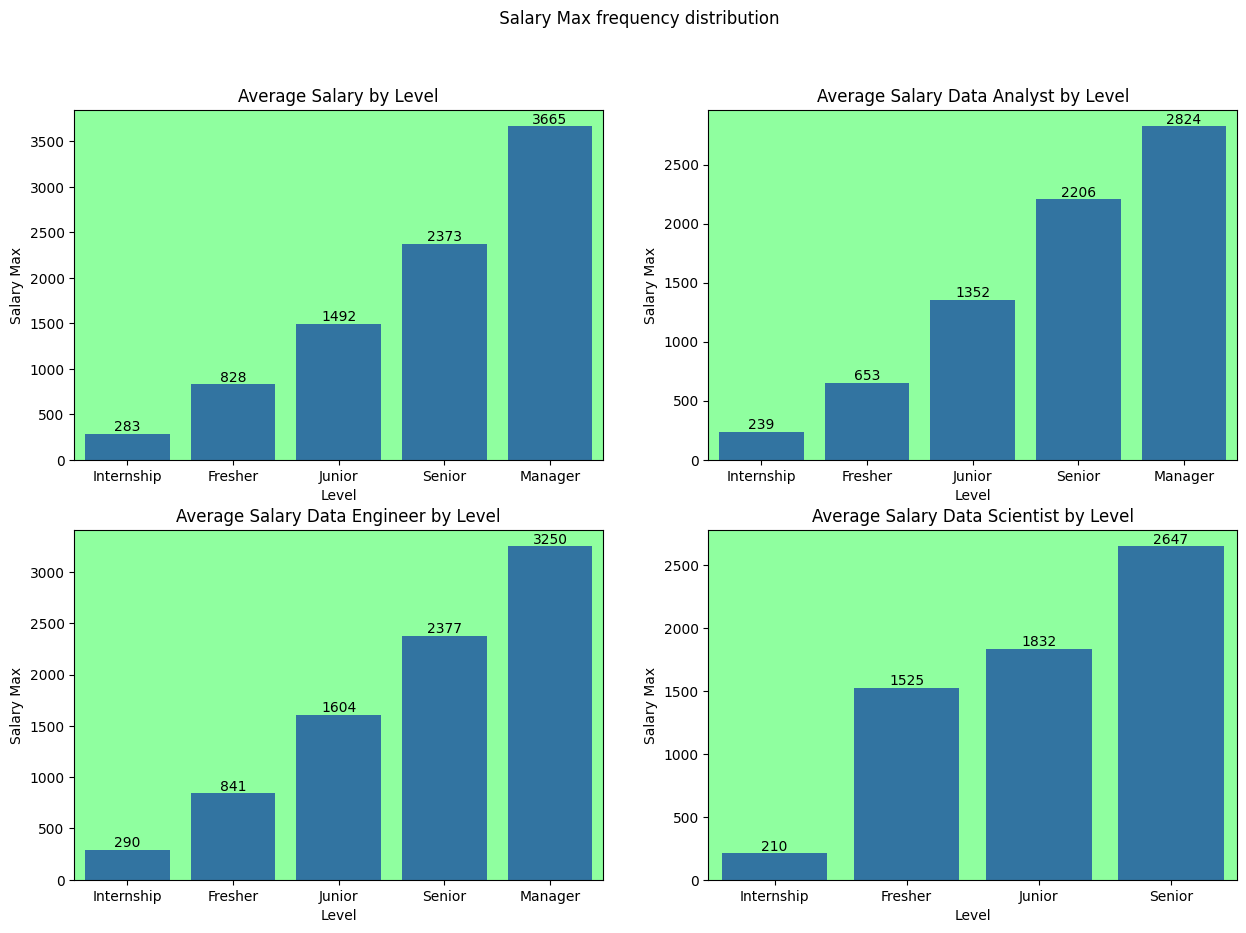

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
experience_level_salary = data.groupby('Level')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Level", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Level', title='Average Salary by Level')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.subplot(2, 2, 2)
experience_level_salary = data_DA.groupby('Level')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Level", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Level', title='Average Salary Data Analyst by Level')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.subplot(2, 2, 3)
experience_level_salary = data_DE.groupby('Level')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Level", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Level', title='Average Salary Data Engineer by Level')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.subplot(2, 2, 4)
experience_level_salary = data_DS.groupby('Level')['Salary Max'].mean().round(0).nlargest(15).sort_values(ascending = True).reset_index()
ax= sns.barplot(data = experience_level_salary , x = "Level", y = "Salary Max")
ax.set(ylabel='Salary Max',xlabel='Level', title='Average Salary Data Scientist by Level')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.suptitle(' Salary Max frequency distribution')
plt.show()

**Conclusion: **
*	Across all fields, there's a consistent trend where salaries increase with higher job levels. Interns earn the least, while managers earn the most.
*	This trend highlights the correlation between experience/responsibility and compensation.
*	Data Analysts and Data Scientists experience relatively rapid salary growth from junior to senior levels compared to the other fields.
*	Data Engineers have a notable salary jump from fresher to junior level (841 to 1604) and again from junior to senior level (1604 to 2377).
*	The salaries for interns and freshers are quite low across all fields, reflecting the entry-level nature of these positions. However, data engineers and data analysts tend to start with slightly higher salaries compared to data scientists and general roles


# IV.Linear Regression


* Scatter Plot
* Linear
* r
* Check residual
Chọn giữa year of experiment and salary max

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR6Kds9r0rmJAV91WkkTwuNYXR4-FzDuJgxh0zPYOoW9N6Ritg0pl9AZ8JNZsuTFc7XgBF-rIqMFtC4/pub?output=csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df.head())

,Location,Due Date,Level,Title,Year of Experience,Salary Max
0,Ha Noi city,2023,Junior,Data Engineer,3.0,1270
1,Ha Noi city,2023,Senior,Data Engineer,4.0,2500
2,Ha Noi city,2023,Junior,Data Analyst,2.0,1154
3,Ha Noi city,2024,Fresher,Data Engineer,1.0,850
4,Ha Noi city,2024,Junior,Business Analyst,2.5,1185


## Scatter plot and regresion plot of the original data

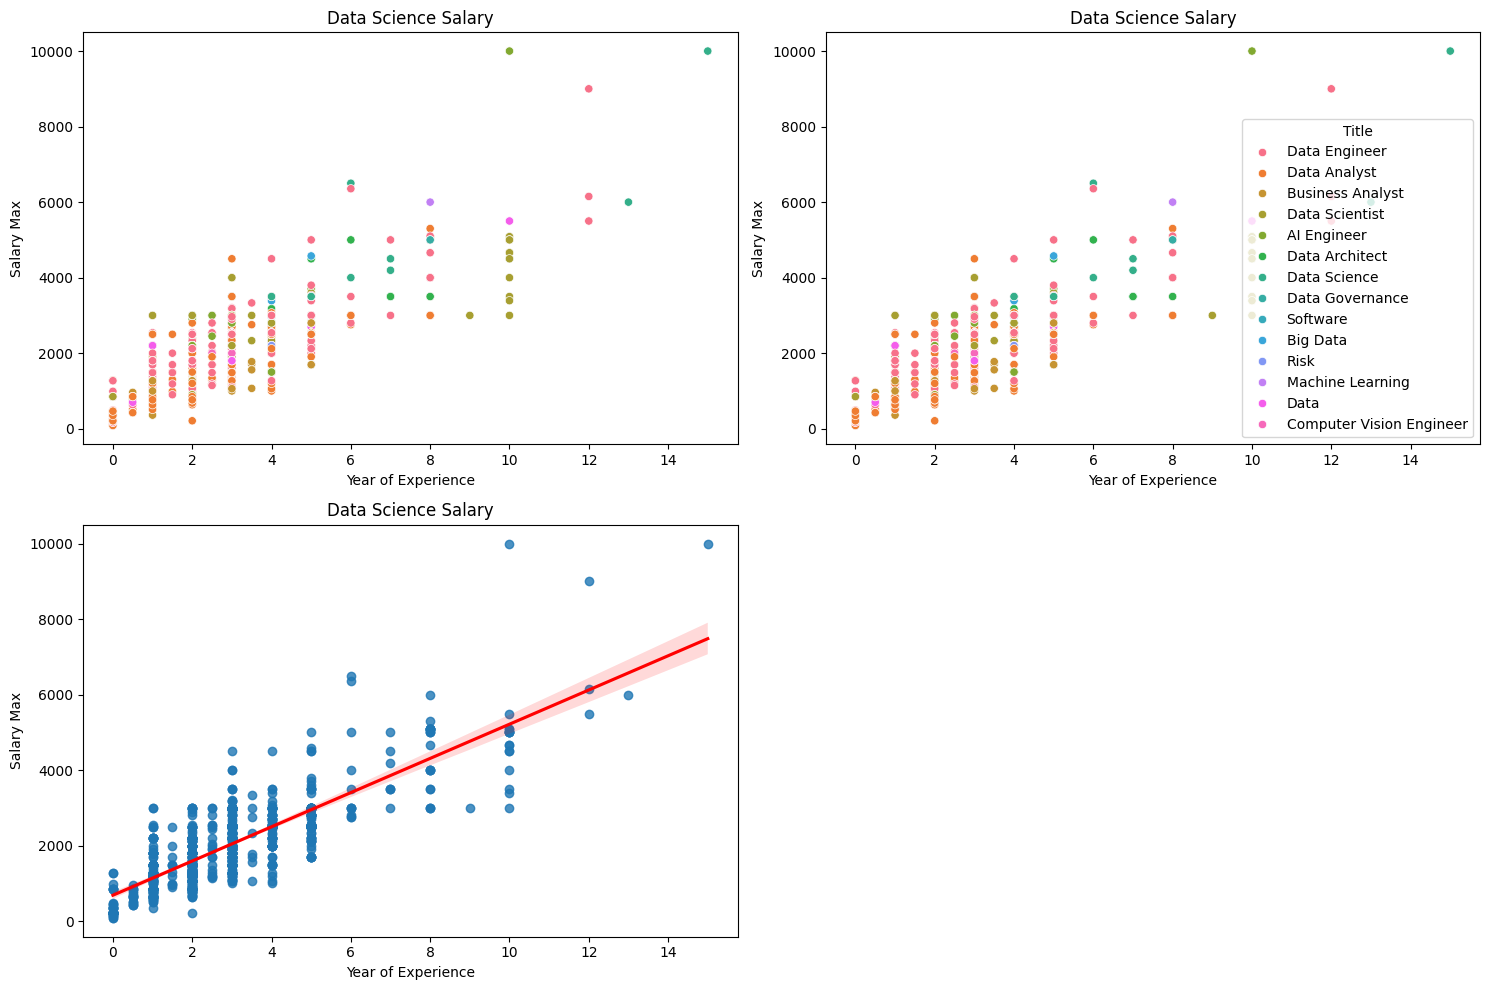

In [ ]:
# Scatter plot, Linear regression line Year of Experience vs Salary Max
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].set(xlabel='Year of Experience', ylabel='Salary Max', title='Data Science Salary');
sns.scatterplot(ax=axes[0,0], x='Year of Experience', y='Salary Max', data=df, hue='Title', legend=False)

axes[0,1].set(xlabel='Year of Experience', ylabel='Salary Max', title='Data Science Salary');
sns.scatterplot(ax=axes[0,1], x='Year of Experience', y='Salary Max', data=df, hue='Title')

axes[1,0].set(xlabel='Year of Experience', ylabel='Salary Max', title='Data Science Salary');
sns.regplot(ax=axes[1,0], x='Year of Experience', y='Salary Max', data=df, line_kws=dict(color="r"))

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### Insights
1. Scatter plot:
- The scatter plot suggests a positive correlation between 'Year of Experience' and 'Salary Max';
- The scatter plot also highlights a high degree of variability in salaries across all experience levels, suggesting factors, aforementioned or unbeknownst to, other than one's year of experience that possibly influence the determination of monthly salary;
- Some data, stretching far away from the cluster of data, indicates outliers.
2. Linear regression plot:
- The positive correlation between 'Year of Experience' and 'Salary Max' is further confirmed by the upward slope of the regression line;
- As one's year of experience thriving in the data science field increases, the salary is apt to increase.

## Correlation coefficient value

In [ ]:
# R using pandas library
print('\'pandas\' library:')
bivar_df = pd.DataFrame({'Year of Experience': df['Year of Experience'],
                         'Salary Max': df['Salary Max']})
print('Correlation coefficient:', bivar_df.corr()['Year of Experience']['Salary Max'])
display(bivar_df.corr())

# R using pearsonr library
print('\n\'pearsonr\' library:')
regr_df = linear_model.LinearRegression()
exp = df[['Year of Experience']]
sal_max = df[['Salary Max']]
regr_df.fit(exp.values, sal_max.values)

slope = regr_df.coef_[0]
r, p_value = stats.pearsonr(df['Year of Experience'], df['Salary Max'])
print("Correlation coefficient:", r)

'pandas' library:
Correlation coefficient: 0.8175580003201168


,Year of Experience,Salary Max
Year of Experience,1.000000,0.817558
Salary Max,0.817558,1.000000



'pearsonr' library:
Correlation coefficient: 0.8175580003201174


### Insights:
- A correlation coefficient of approximately 0.817558 between 'Year of Experience' and 'Salary' indicates a strong positive association.

## OLS model

In [ ]:
x = df['Year of Experience']
X = sm.add_constant(x)
y = df['Salary Max']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fitting train data into OLS model
model_train = sm.OLS(y_train, X_train).fit()
print(model_train.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary Max   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1683.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          9.11e-199
Time:                        10:45:23   Log-Likelihood:                -6303.1
No. Observations:                 800   AIC:                         1.261e+04
Df Residuals:                     798   BIC:                         1.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                655.6665     40

In [ ]:
# Fitting test data into OLS model
model_test = sm.OLS(y_test, X_test).fit()
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary Max   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     357.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           3.40e-46
Time:                        10:45:23   Log-Likelihood:                -1562.1
No. Observations:                 200   AIC:                             3128.
Df Residuals:                     198   BIC:                             3135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                805.4752     76

In [ ]:
mse = mean_squared_error(y_test, model_test.predict(X_test))
print(f"Mean Squared Error on test set: {mse}")
r2 = r2_score(y_test, model_test.predict(X_test))
print(f"R-squared on test set: {r2}")

Mean Squared Error on test set: 356305.26908768696
R-squared on test set: 0.6432551740180137


### Insights:
- The model seems to capture a moderate proportion of the variance in salary (~64%). However, the high MSE suggests there is still significant room for improvement in terms of reducing the average squared difference between predicted and actual salaries.

## Residual plot and box plot

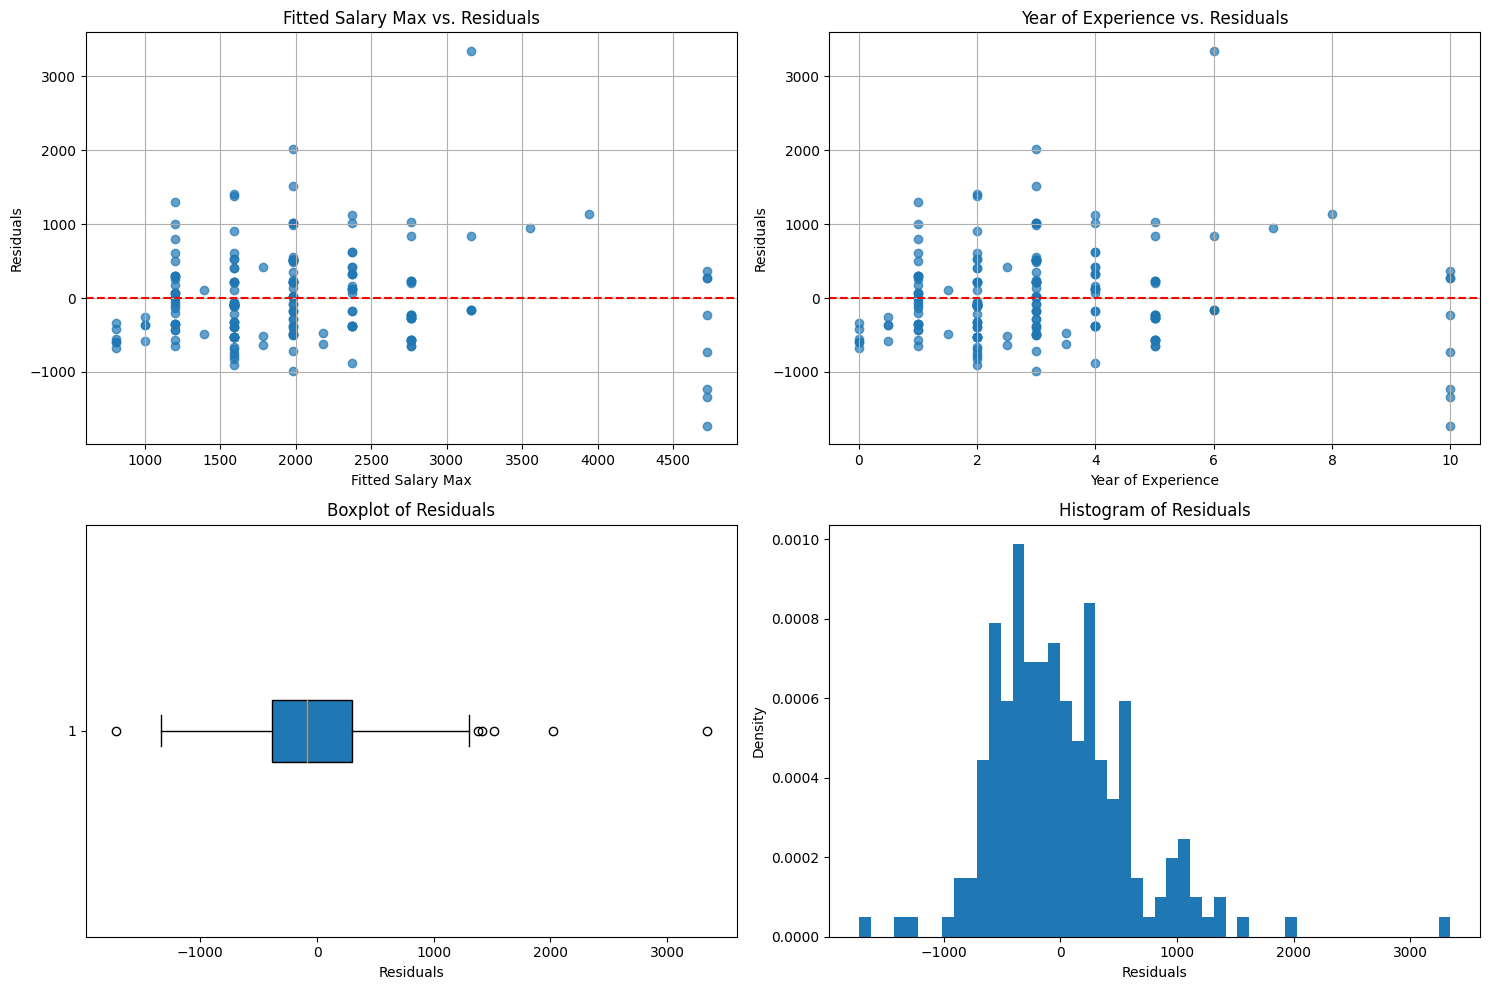

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residual plot between residuals of salary and fitted values
axes[0,0].scatter(model_test.fittedvalues, model_test.resid, alpha=0.7)
axes[0,0].set(xlabel='Fitted Salary Max', ylabel='Residuals', title='Fitted Salary Max vs. Residuals')
axes[0,0].grid(True)
axes[0,0].axhline(y=0, color='r', linestyle='--')

# Residual plot between residuals of salary and explained variable
axes[0,1].scatter(X_test['Year of Experience'], model_test.resid, alpha=0.7)
axes[0,1].set(xlabel='Year of Experience', ylabel='Residuals', title='Year of Experience vs. Residuals')
axes[0,1].grid(True)
axes[0,1].axhline(y=0, color='r', linestyle='--')

# Box plot of residuals
axes[1,0].boxplot(model_test.resid, vert=False, showfliers=True, patch_artist=True)
axes[1,0].set(xlabel='Residuals', ylabel='', title='Boxplot of Residuals')

# Histogram of residuals
axes[1,1].hist(model_test.resid, density=True, bins=50)
axes[1,1].set(xlabel='Residuals', ylabel='Density', title='Histogram of Residuals')

plt.tight_layout()
plt.show()

## Residual analysis of salary

In [ ]:
# Breusch-Pagan test for homoskedasticity assumption
print('Breusch-Pagan test for homoskedasticity assumption:')

BP_test = [sms.het_breuschpagan(model_test.resid, model_test.model.exog)]
BP_values = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
BP_df = pd.DataFrame(data=BP_test, columns=BP_values)
display(BP_df)

print()
if BP_df['p-value'].values[0] < 0.05:
  print('Heteroskedasticity detected.')
else:
  print('Homoskedasticity assumption is likely met.')

Breusch-Pagan test for homoskedasticity assumption:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,8.024015,0.004616,8.275801,0.004458



Heteroskedasticity detected.


In [ ]:
# Zero mean test
resid_df = pd.DataFrame({'Residuals': model_test.resid})
mean_residuals = resid_df['Residuals'].mean()
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: -1.0686562745831907e-12


In [ ]:
# Harvey-Collier test for linearity assumption
print('Harvey-Collier test for linearity assumption')

HC_test = [sms.linear_harvey_collier(model_test)]
HC_values = ['t-value', 'p-value']
HC_df = pd.DataFrame(data=HC_test, columns=HC_values)
display(HC_df)

print()
if HC_df['p-value'].values[0] < 0.05:
  print('Non-linearity detected.')
else:
  print('Linearity assumption is likely met.')

Harvey-Collier test for linearity assumption


,t-value,p-value
0,-0.862109,0.389681



Linearity assumption is likely met.


In [ ]:
# Shapiro-Wilk test for normality assumption
print('Shapiro-Wilk test for checking normality of residuals:')

SW_test = [shapiro(model_test.resid)]
SW_values = ['stat', 'p-value']
SW_df = pd.DataFrame(data=SW_test, columns=SW_values)
display(SW_df)

print()
if SW_df['p-value'].values[0] < 0.05:
  print('The data has non-normal distribution.')
else:
  print('The data is normally distributed.')

Shapiro-Wilk test for checking normality of residuals:


,stat,p-value
0,0.929932,3.334125e-08



The data has non-normal distribution.


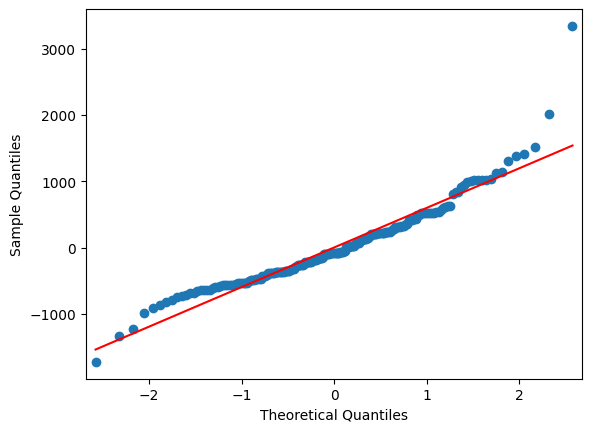

In [ ]:
# Q-Q plot for normality assumption
sm.qqplot(model_test.resid, line='s');

### Insights:
1. Assumption assessment of 'Fitted Salary Max' versus 'Residuals' plot (fitted values vs. residuals):
- Constant variance: Blob-shaped dispersion of the residuals is discernible; violation of heteroskedasticity, or unequal variance, is concluded;
- Independence: The dispersion of residuals clumps together at the lower end of the x-axis then spreads out, hence potential dependency is considered;
- Zero mean: The mean of residuals weighs around zero (infinitesimal value); the model's predictions should be, on average, unbiased; there is no systematic tendency for the model to underestimate or overestimate the actual data.
- Linearity: Linearity between 'Year of Experiencee' and 'Salary Max; is evidented, which implies that the increase in salary may be constant with each additional year of experience;
- Normality: The model of residuals is not normally distributed.

⇒ Heteroskedasticity - dependency - around zero mean - linearity - non-normal distribution

2. Boxplot and histogram of residuals:
- The boxplot of residuals displays the presence of outliers, which are likely to bias model estimates, inflate standard errors, and mislead the visualization of data;
- The boxplot is likely right skewed, which indicates non-normal distribution of the data due to the outliers;
- However, these outliers may turn out to be valuable in identifying special cases regardless little likelihood.

## Checking outliers

In [ ]:
display(pd.DataFrame({'IQR': model_test.resid.describe().loc[['min', '25%', '50%', '75%', 'max']]}))

,IQR
min,-1725.458077
25%,-383.470519
50%,-89.471806
75%,302.526478
max,3342.535058


In [ ]:
# Outliers using interquartile range IQR
Q1 = model_test.resid.quantile(0.25)
Q3 = model_test.resid.quantile(0.75)
IQR = Q3 - Q1
outlier_indices = np.where((model_test.resid < (Q1 - 1.5 * IQR)) | (model_test.resid > (Q3 + 1.5 * IQR)))[0]
outliers_IQR_df = pd.DataFrame(df.iloc[outlier_indices])

print('Number of ouliers in original data:', len(outliers_IQR_df))
display(outliers_IQR_df.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))

Number of ouliers in original data: 6


,Location,Due Date,Level,Title,Year of Experience,Salary Max
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540
178,Ha Noi city,2024,Senior,Data Analyst,3.0,1355
92,Ha Noi city,2023,Junior,Data Analyst,2.0,1270
125,Ha Noi city,2024,Junior,Data Analyst,2.0,900
79,Ho Chi Minh city,2024,Fresher,Data Analyst,0.5,850


In [ ]:
# Outliers using z-score, threshold 2.5 and 3
z = np.abs(stats.zscore(model_test.resid))
threshold_values = [2.5, 3]

for threshold_z in threshold_values:
    outlier_indices = np.where(z > threshold_z)[0]
    outliers_z_df = pd.DataFrame(df.iloc[outlier_indices])
    print(f'Number of outliers with threshold {threshold_z}: {len(outliers_z_df)}')
    display(outliers_z_df.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))

Number of outliers with threshold 2.5: 4


,Location,Due Date,Level,Title,Year of Experience,Salary Max
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540
178,Ha Noi city,2024,Senior,Data Analyst,3.0,1355
79,Ho Chi Minh city,2024,Fresher,Data Analyst,0.5,850


Number of outliers with threshold 3: 2


,Location,Due Date,Level,Title,Year of Experience,Salary Max
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540


### Insights:
- Adopting IQR's principles, the amount of outliers is 6;
- Conducting z-test with a threshold of 2.5 and 3, the amounts of outliers are 4 and 2, respectively.

## **First conclusion:**
1. Using OLS model, the residual analysis suggests that linear regression model may not be fit to represent the data;
2. Specifically, the outliers and influential ovbservations point out that one's title and level may influence the correlation between 'Year of Experience' and 'Salary Max' since the payment range oscillates wildly between marginal range of year of experience;
3. To make a better decision, splitting the original data based on the top 3 counts of title and beyond for better analysis before building the predictive model.

## Spliting data

In [ ]:
titles, counts = np.unique(df['Title'], return_counts=True)

df_title = pd.DataFrame({'Title': titles, 'Count': counts}).sort_values(by='Count', ascending=False)
display(df_title)

,Title,Count
7,Data Engineer,379
5,Data Analyst,339
10,Data Scientist,97
2,Business Analyst,59
0,AI Engineer,39
1,Big Data,19
6,Data Architect,18
9,Data Science,15
8,Data Governance,12
4,Data,11


In [ ]:
top_titles = df_title['Title'].head(3).tolist()
df_DE = df[df['Title'] == top_titles[0]]
df_DA = df[df['Title'] == top_titles[1]]
df_DS = df[df['Title'] == top_titles[2]]
df_rest = df[~df['Title'].isin(top_titles)]

In [ ]:
for job, df_job in [('Data Engineer', df_DE),
                  ('Data Analyst', df_DA),
                  ('Data Scientist', df_DS),
                  ('Other Data Positons', df_rest)]:
  print(f'\n{job}:')
  display(df_job.head())


Data Engineer:


,Location,Due Date,Level,Title,Year of Experience,Salary Max
0,Ha Noi city,2023,Junior,Data Engineer,3.0,1270
1,Ha Noi city,2023,Senior,Data Engineer,4.0,2500
3,Ha Noi city,2024,Fresher,Data Engineer,1.0,850
10,Ho Chi Minh city,2024,Senior,Data Engineer,3.0,2223
12,Ho Chi Minh city,2024,Junior,Data Engineer,1.5,953



Data Analyst:


,Location,Due Date,Level,Title,Year of Experience,Salary Max
2,Ha Noi city,2023,Junior,Data Analyst,2.0,1154
6,Ha Noi city,2024,Junior,Data Analyst,2.0,1068
7,Ho Chi Minh city,2024,Senior,Data Analyst,3.0,1368
8,Ho Chi Minh city,2024,Internship,Data Analyst,0.0,213
9,Ho Chi Minh city,2024,Senior,Data Analyst,4.0,2308



Data Scientist:


,Location,Due Date,Level,Title,Year of Experience,Salary Max
14,Ha Noi city,2024,Junior,Data Scientist,1.0,1496
37,Ha Noi city,2024,Senior,Data Scientist,3.5,2331
47,Ho Chi Minh city,2023,Senior,Data Scientist,3.0,3178
51,Ho Chi Minh city,2023,Senior,Data Scientist,3.0,2648
55,Ha Noi city,2023,Senior,Data Scientist,3.0,2012



Other Data Positons:


,Location,Due Date,Level,Title,Year of Experience,Salary Max
4,Ha Noi city,2024,Junior,Business Analyst,2.5,1185
5,Ho Chi Minh city,2024,Fresher,Business Analyst,0.5,428
13,Ho Chi Minh city,2024,Junior,Business Analyst,2.0,855
17,Ho Chi Minh city,2024,Senior,Business Analyst,3.0,1068
18,Ho Chi Minh city,2024,Internship,Business Analyst,0.0,1282


### Insights:
- Counting all titles, the 3 titles that appear the most are 'Data Engineer', 'Data Analyst', and 'Data Scientist';
- The other 9 titles will be grouped into one separate dataframe.


## Scatter plot and regresion plot

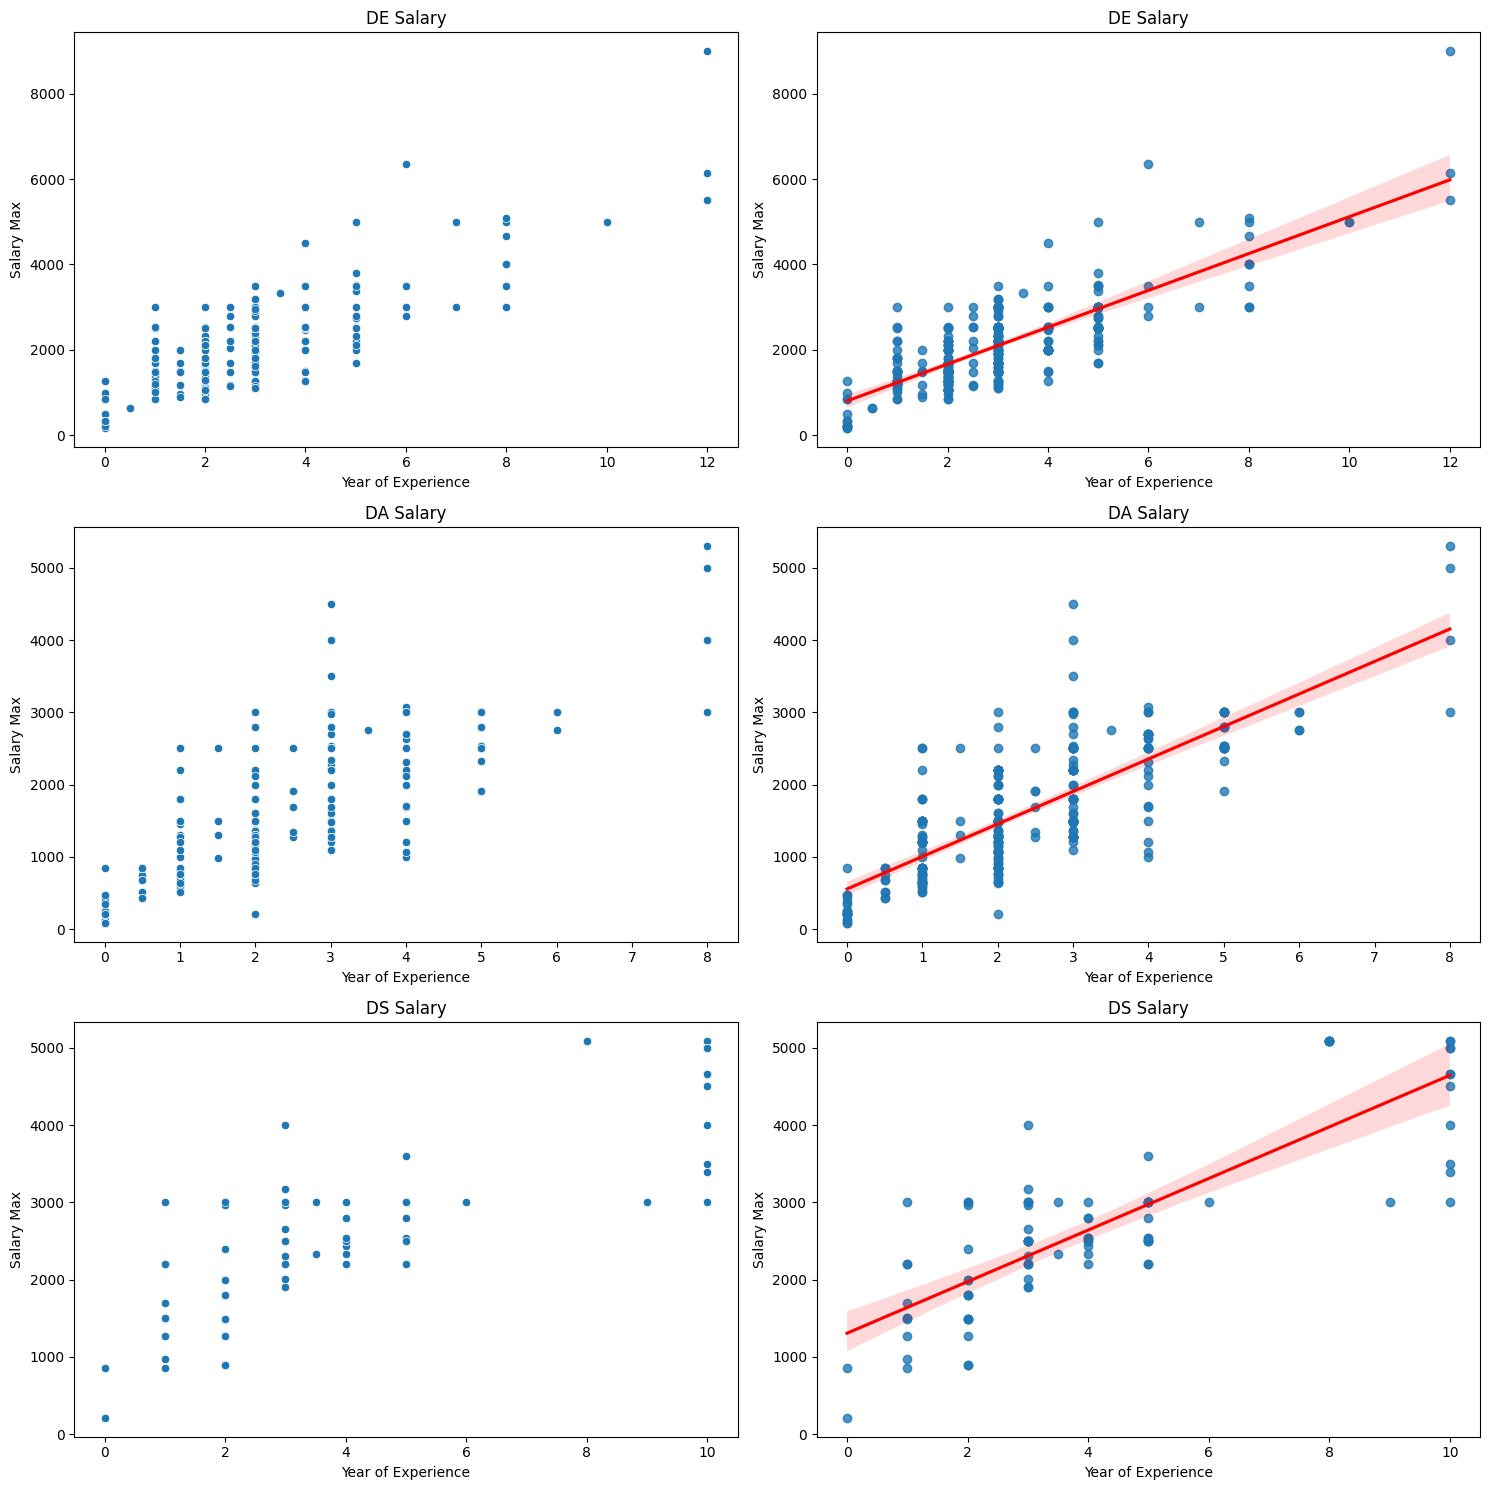

In [ ]:
# Scatter plot, linear regression line Year of Experience vs Salary Max
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, job in enumerate(['DE', 'DA', 'DS']):
    df_job = eval(f'df_{job.replace(" ", "_")}')
    axes[i,0].set(xlabel='Year of Experience', ylabel='Salary Max', title=f'{job} Salary')
    sns.scatterplot(ax=axes[i,0], x='Year of Experience', y='Salary Max', data=df_job)

    axes[i,1].set(xlabel='Year of Experience', ylabel='Salary Max', title=f'{job} Salary')
    sns.regplot(ax=axes[i,1], x='Year of Experience', y='Salary Max', data=df_job, line_kws=dict(color="r"))

plt.tight_layout()
plt.show()

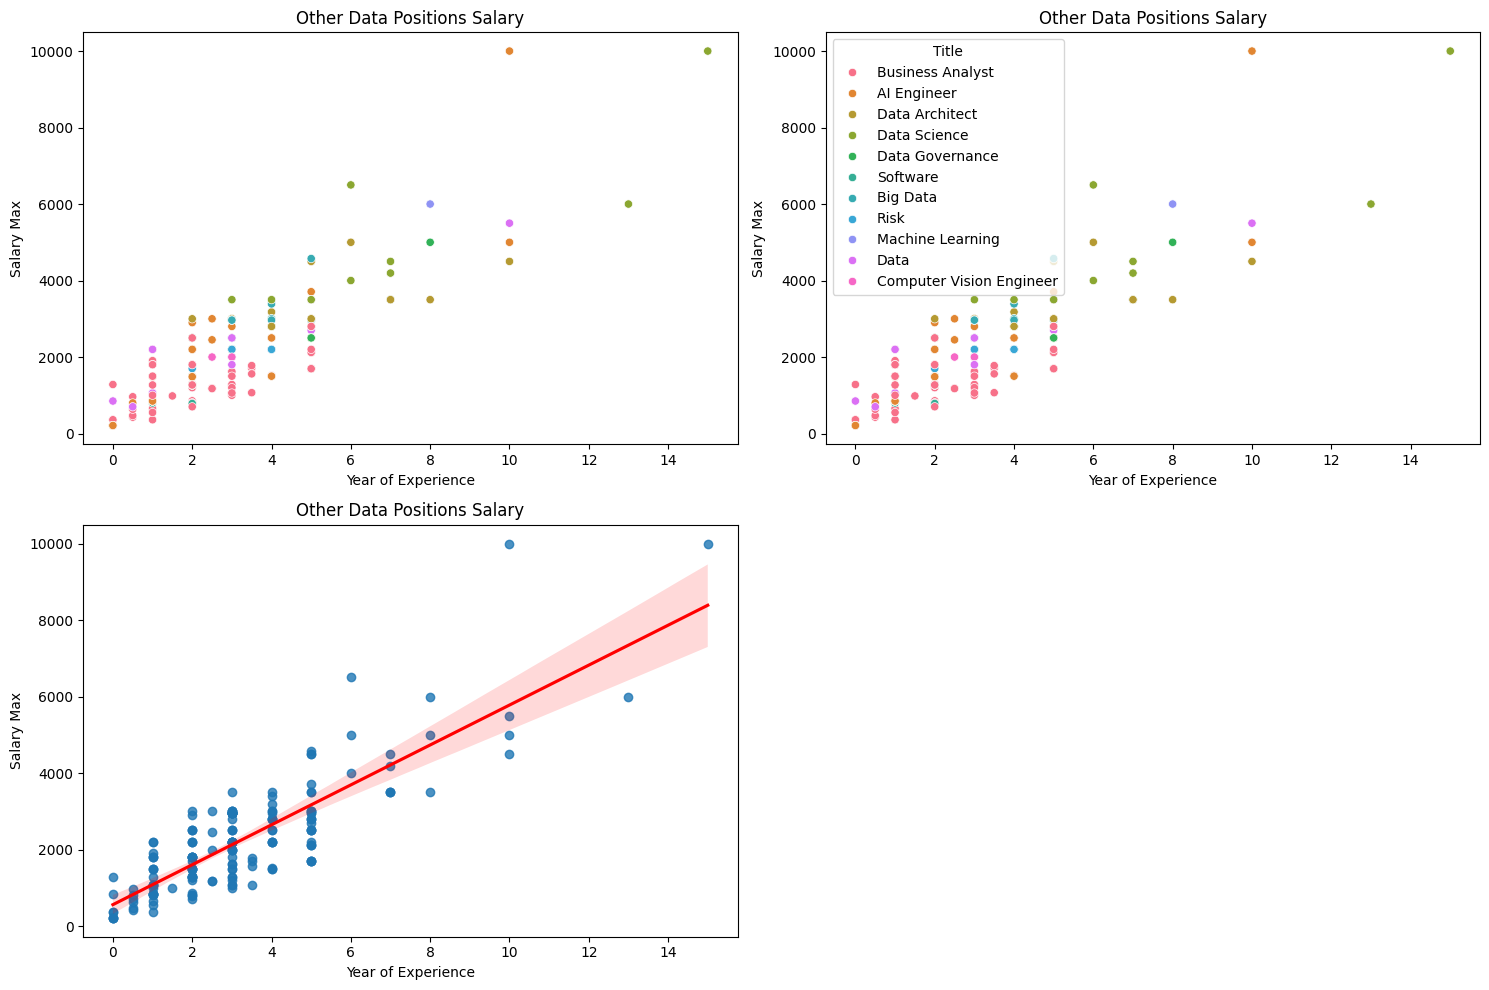

In [ ]:
# Other Data Positions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].set(xlabel='Year of Experience', ylabel='Salary Max', title='Other Data Positions Salary');
sns.scatterplot(ax=axes[0,0], x='Year of Experience', y='Salary Max', data=df_rest, hue='Title', legend=False)

axes[0,1].set(xlabel='Year of Experience', ylabel='Salary Max', title='Other Data Positions Salary');
sns.scatterplot(ax=axes[0,1], x='Year of Experience', y='Salary Max', data=df_rest, hue='Title')

axes[1,0].set(xlabel='Year of Experience', ylabel='Salary Max', title='Other Data Positions Salary');
sns.regplot(ax=axes[1,0], x='Year of Experience', y='Salary Max', data=df_rest, line_kws=dict(color="r"))

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### Insights:
1. Scatter plot:
- All scatter plots suggests positive correlation between 'Year of Experience' and 'Salary Max';
- All scatter plots also highlight high degree of variabilities;
- A handful number of data points still remain distant from the main clusters of data.
2. Regression line plot:
- The upward regression lines in all ression plots visually imply strong positive correlations between 'Year of Experience' and 'Salary Max';
- The general trend of the salary is prone to increase as one's year of experience in their respective position accumulates.

## Correlation coefficient values

In [ ]:
for job, df_job in [('Data Engineer', df_DE), ('Data Analyst', df_DA), ('Data Scientist', df_DS), ('Other Data Positions', df_rest)]:
    print(f'\n{job}:')
    df_bivar = pd.DataFrame({'Year of Experience': df_job['Year of Experience'], 'Salary Max': df_job['Salary Max']})
    display(df_bivar.corr())
    print(f'\nCorrelation coefficient of Year of Experience vs Salary Max: {df_bivar.corr()["Year of Experience"]["Salary Max"]}')


Data Engineer:


,Year of Experience,Salary Max
Year of Experience,1.000000,0.797538
Salary Max,0.797538,1.000000



Correlation coefficient of Year of Experience vs Salary Max: 0.7975382979883558

Data Analyst:


,Year of Experience,Salary Max
Year of Experience,1.000000,0.778605
Salary Max,0.778605,1.000000



Correlation coefficient of Year of Experience vs Salary Max: 0.7786051834548179

Data Scientist:


,Year of Experience,Salary Max
Year of Experience,1.000000,0.826518
Salary Max,0.826518,1.000000



Correlation coefficient of Year of Experience vs Salary Max: 0.8265179910510592

Other Data Positions:


,Year of Experience,Salary Max
Year of Experience,1.000000,0.837888
Salary Max,0.837888,1.000000



Correlation coefficient of Year of Experience vs Salary Max: 0.8378879487909191


### Insights:
- All four datasets analyzed exhibit high correlation coefficient values, exceeding 0.7;
- This value signifies a strong positive association between 'Year of Experience' and 'Salary' within each dataset;
- As years of experience increase, salary tends to increase as well, and this trend holds true across all the data examined.

## OLS model

In [ ]:
# Data Engineer
print('Data Engineer:')
x_DE, y_DE = df_DE['Year of Experience'], df_DE['Salary Max']
X_DE = sm.add_constant(x_DE)
X_train_DE, X_test_DE, y_train_DE, y_test_DE = train_test_split(X_DE, y_DE, test_size=0.2, random_state=42)

train_DE = sm.OLS(y_train_DE, X_train_DE).fit()
test_DE = sm.OLS(y_test_DE, X_test_DE).fit()
print(train_DE.summary())
print(test_DE.summary())

# Data Analyst
print('\nData Analyst:')
x_DA, y_DA = df_DA['Year of Experience'], df_DA['Salary Max']
X_DA = sm.add_constant(x_DA)
X_train_DA, X_test_DA, y_train_DA, y_test_DA = train_test_split(X_DA, y_DA, test_size=0.2, random_state=42)

train_DA = sm.OLS(y_train_DA, X_train_DA).fit()
test_DA = sm.OLS(y_test_DA, X_test_DA).fit()
print(train_DA.summary())
print(test_DA.summary())

# Data Scientist
print('\nData Scientist:')
x_DS, y_DS = df_DS['Year of Experience'], df_DS['Salary Max']
X_DS = sm.add_constant(x_DS)
X_train_DS, X_test_DS, y_train_DS, y_test_DS = train_test_split(X_DS, y_DS, test_size=0.2, random_state=42)

train_DS = sm.OLS(y_train_DS, X_train_DS).fit()
test_DS = sm.OLS(y_test_DS, X_test_DS).fit()
print(train_DS.summary())
print(test_DS.summary())

# Other Data Positions
print('\nOther Data Positions:')
x_rest, y_rest = df_rest['Year of Experience'], df_rest['Salary Max']
X_rest = sm.add_constant(x_rest)
X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(X_rest, y_rest, test_size=0.2, random_state=42)

train_rest = sm.OLS(y_train_rest, X_train_rest).fit()
test_rest = sm.OLS(y_test_rest, X_test_rest).fit()
print(train_rest.summary())
print(test_rest.summary())

Data Engineer:
                            OLS Regression Results                            
Dep. Variable:             Salary Max   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     557.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.70e-70
Time:                        10:45:43   Log-Likelihood:                -2374.2
No. Observations:                 303   AIC:                             4752.
Df Residuals:                     301   BIC:                             4760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                

In [ ]:
for job, test_job, X_job, y_job in [('Data Engineer', test_DE, X_test_DE, y_test_DE),
                               ('Data Analyst', test_DA, X_test_DA, y_test_DA),
                               ('Data Scientist', test_DS, X_test_DS, y_test_DS),
                               ('Other Data Positions', test_rest, X_test_rest, y_test_rest)]:
  print(f'\n{job}:')
  mse_temp = mean_squared_error(y_job, test_job.predict(X_job))
  r2_temp = r2_score(y_job, test_job.predict(X_job))
  print(f"Mean Squared Error on test set: {mse_temp}")
  print(f"R-squared on test set: {r2_temp}")


Data Engineer:
Mean Squared Error on test set: 209762.98955702508
R-squared on test set: 0.5258617834053892

Data Analyst:
Mean Squared Error on test set: 243794.30520775382
R-squared on test set: 0.56902497481893

Data Scientist:
Mean Squared Error on test set: 456480.7016936671
R-squared on test set: 0.6770540388823199

Other Data Positions:
Mean Squared Error on test set: 539075.4843101476
R-squared on test set: 0.5946772780841638


### Insights:
- Except for the others, data scientist test set displays higher R squared value in OLS model, which indicates a better fit of the model, but potential overfitting.

## Residual plot and box plot

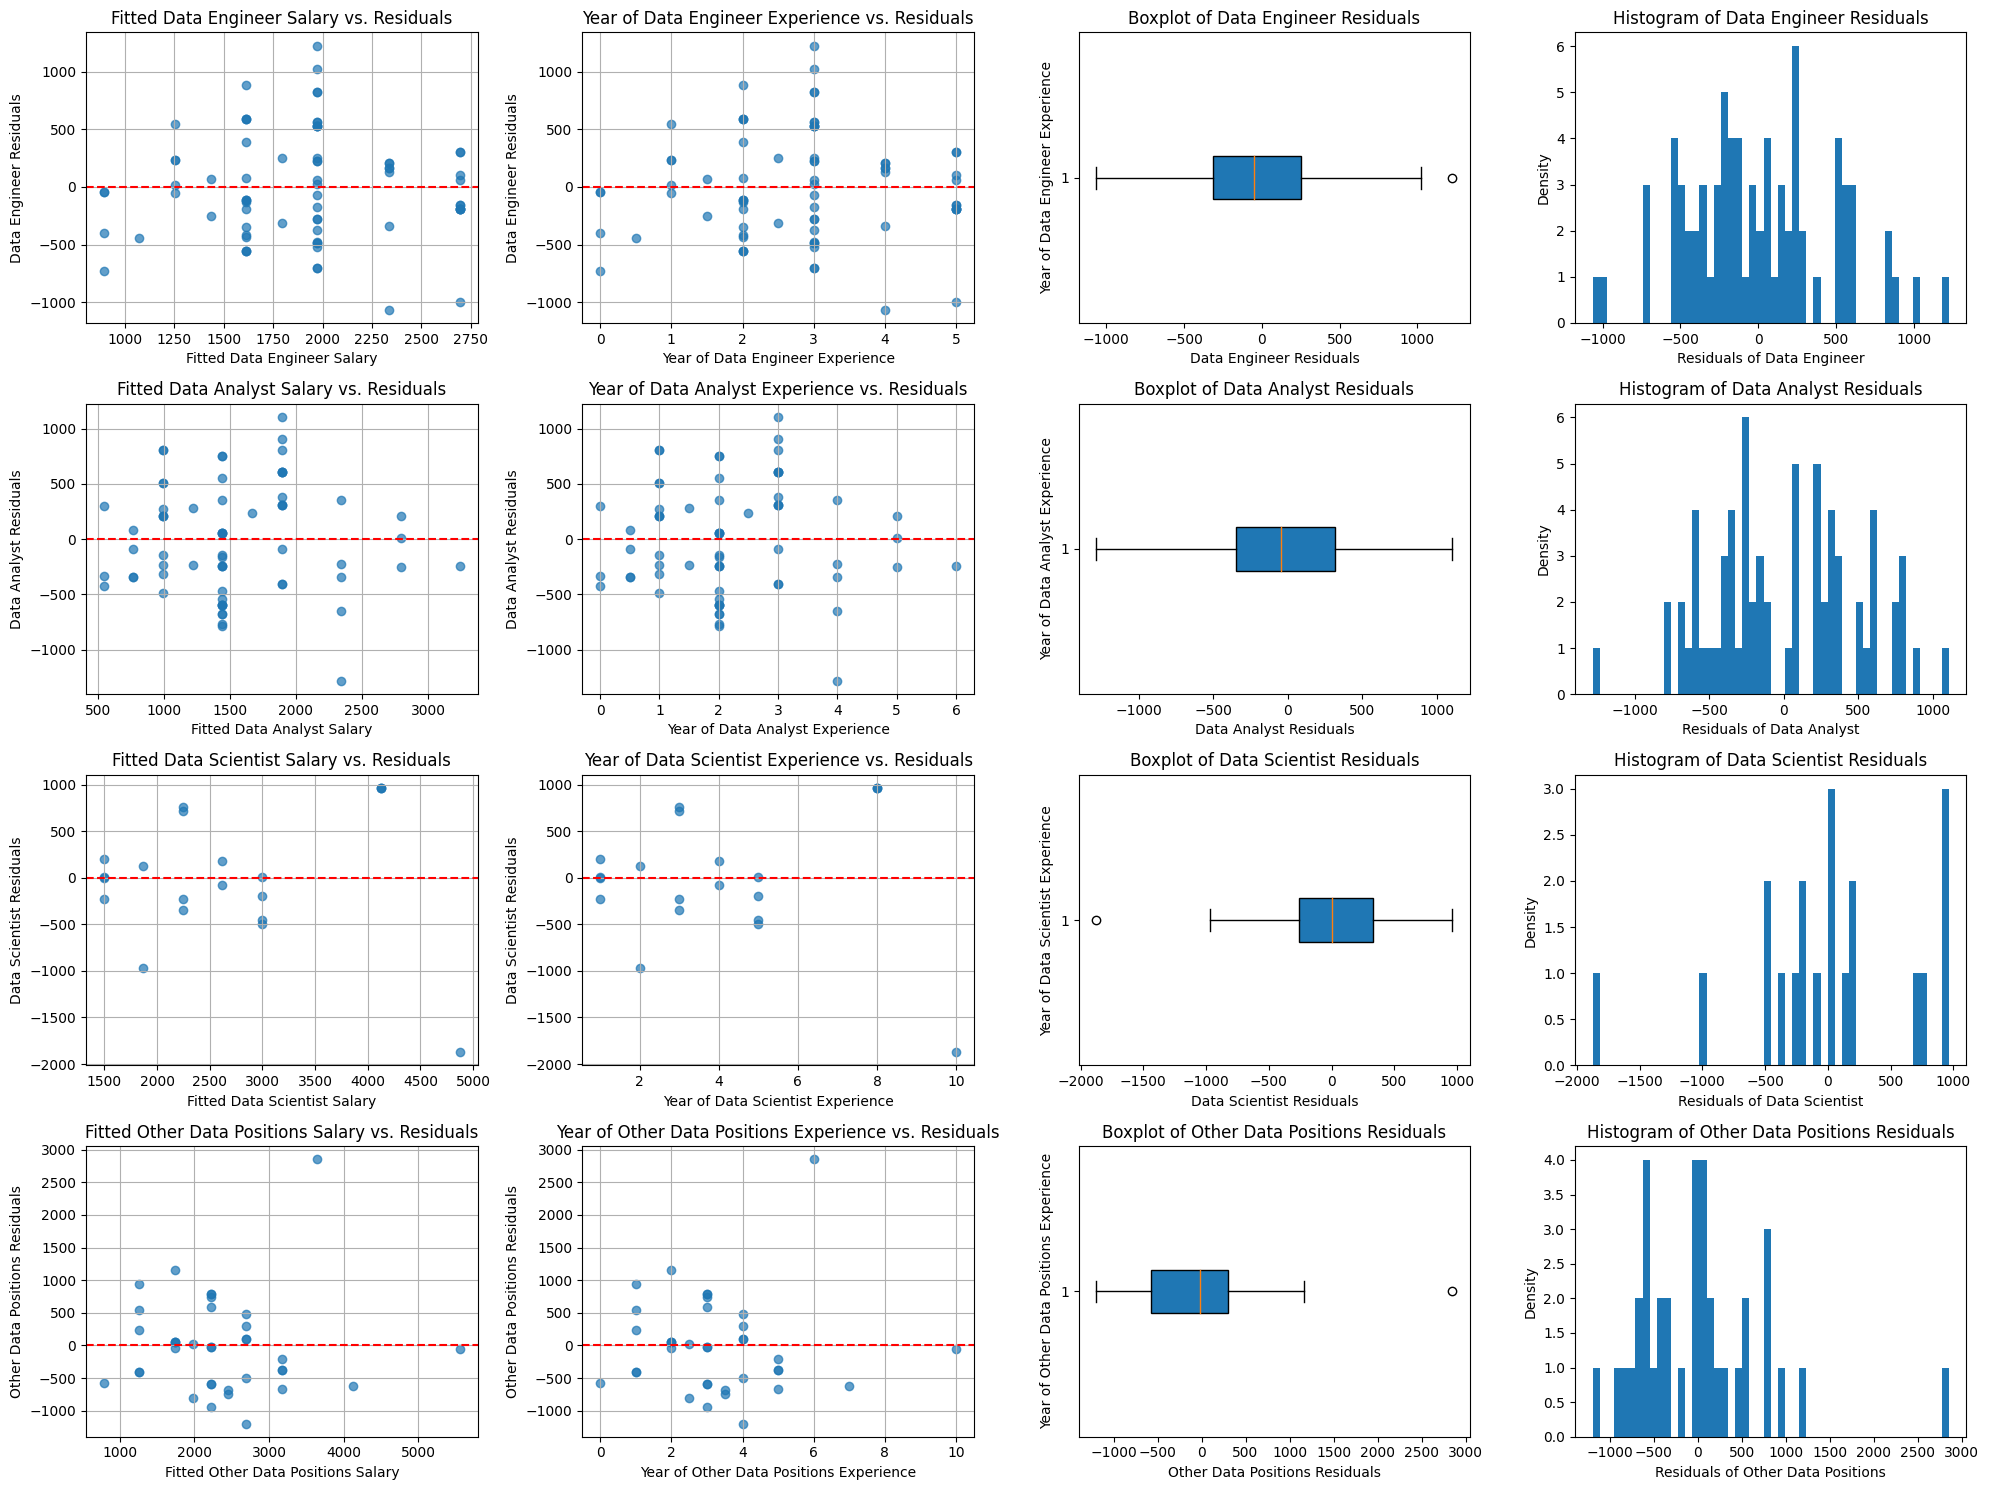

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

# Data Engineer
axes[0,0].scatter(test_DE.fittedvalues, test_DE.resid, alpha=0.7)
axes[0,0].set(xlabel='Fitted Data Engineer Salary', ylabel='Data Engineer Residuals', title='Fitted Data Engineer Salary vs. Residuals')
axes[0,0].grid(True)
axes[0,0].axhline(y=0, color='r', linestyle='--')

axes[0,1].scatter(X_test_DE['Year of Experience'], test_DE.resid, alpha=0.7)
axes[0,1].set(xlabel='Year of Data Engineer Experience', ylabel='Data Engineer Residuals', title='Year of Data Engineer Experience vs. Residuals')
axes[0,1].grid(True)
axes[0,1].axhline(y=0, color='r', linestyle='--')

axes[0,2].boxplot(test_DE.resid, vert=False, showfliers=True, patch_artist=True)
axes[0,2].set(xlabel='Data Engineer Residuals', ylabel='Year of Data Engineer Experience', title='Boxplot of Data Engineer Residuals')

axes[0,3].hist(test_DE.resid, bins=50)
axes[0,3].set(xlabel='Residuals of Data Engineer', ylabel='Density', title='Histogram of Data Engineer Residuals')

# Data Analyst
axes[1,0].scatter(test_DA.fittedvalues, test_DA.resid, alpha=0.7)
axes[1,0].set(xlabel='Fitted Data Analyst Salary', ylabel='Data Analyst Residuals', title='Fitted Data Analyst Salary vs. Residuals')
axes[1,0].grid(True)
axes[1,0].axhline(y=0, color='r', linestyle='--')

axes[1,1].scatter(X_test_DA['Year of Experience'], test_DA.resid, alpha=0.7)
axes[1,1].set(xlabel='Year of Data Analyst Experience', ylabel='Data Analyst Residuals', title='Year of Data Analyst Experience vs. Residuals')
axes[1,1].grid(True)
axes[1,1].axhline(y=0, color='r', linestyle='--')

axes[1,2].boxplot(test_DA.resid, vert=False, showfliers=True, patch_artist=True)
axes[1,2].set(xlabel='Data Analyst Residuals', ylabel='Year of Data Analyst Experience', title='Boxplot of Data Analyst Residuals')

axes[1,3].hist(test_DA.resid, bins=50)
axes[1,3].set(xlabel='Residuals of Data Analyst', ylabel='Density', title='Histogram of Data Analyst Residuals')

# Data Scientist
axes[2,0].scatter(test_DS.fittedvalues, test_DS.resid, alpha=0.7)
axes[2,0].set(xlabel='Fitted Data Scientist Salary', ylabel='Data Scientist Residuals', title='Fitted Data Scientist Salary vs. Residuals')
axes[2,0].grid(True)
axes[2,0].axhline(y=0, color='r', linestyle='--')

axes[2,1].scatter(X_test_DS['Year of Experience'], test_DS.resid, alpha=0.7)
axes[2,1].set(xlabel='Year of Data Scientist Experience', ylabel='Data Scientist Residuals', title='Year of Data Scientist Experience vs. Residuals')
axes[2,1].grid(True)
axes[2,1].axhline(y=0, color='r', linestyle='--')

axes[2,2].boxplot(test_DS.resid, vert=False, showfliers=True, patch_artist=True)
axes[2,2].set(xlabel='Data Scientist Residuals', ylabel='Year of Data Scientist Experience', title='Boxplot of Data Scientist Residuals')

axes[2,3].hist(test_DS.resid, bins=50)
axes[2,3].set(xlabel='Residuals of Data Scientist', ylabel='Density', title='Histogram of Data Scientist Residuals')

# Other Data Positions
axes[3,0].scatter(test_rest.fittedvalues, test_rest.resid, alpha=0.7)
axes[3,0].set(xlabel='Fitted Other Data Positions Salary', ylabel='Other Data Positions Residuals', title='Fitted Other Data Positions Salary vs. Residuals')
axes[3,0].grid(True)
axes[3,0].axhline(y=0, color='r', linestyle='--')

axes[3,1].scatter(X_test_rest['Year of Experience'], test_rest.resid, alpha=0.7)
axes[3,1].set(xlabel='Year of Other Data Positions Experience', ylabel='Other Data Positions Residuals', title='Year of Other Data Positions Experience vs. Residuals')
axes[3,1].grid(True)
axes[3,1].axhline(y=0, color='r', linestyle='--')

axes[3,2].boxplot(test_rest.resid, vert=False, showfliers=True, patch_artist=True)
axes[3,2].set(xlabel='Other Data Positions Residuals', ylabel='Year of Other Data Positions Experience', title='Boxplot of Other Data Positions Residuals')

axes[3,3].hist(test_rest.resid, bins=50)
axes[3,3].set(xlabel='Residuals of Other Data Positions', ylabel='Density', title='Histogram of Other Data Positions Residuals')

plt.tight_layout()
plt.show()

## Residual analysis of salary

In [ ]:
# Breusch-Pagan test for homoskedasticity assumption
for job, test_job, df_job in [('Data Engineer', test_DE, df_DE),
                               ('Data Analyst', test_DA, df_DA),
                               ('Data Scientist', test_DS, df_DS),
                               ('Other Data Positions', test_rest, df_rest)]:
  print(f'\n{job}:')
  BP_test_temp = [sms.het_breuschpagan(test_job.resid, test_job.model.exog)]
  BP_df_temp = pd.DataFrame(data=BP_test_temp, columns=BP_values)
  display(BP_df_temp)

  print()
  if BP_df_temp['p-value'].values[0] < 0.05:
    print('Heteroskedasticity detected.')
  else:
    print('Homoskedasticity assumption is likely met.')


Data Engineer:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,0.008423,0.926875,0.008202,0.928081



Homoskedasticity assumption is likely met.

Data Analyst:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,1.369049,0.241975,1.356085,0.248409



Homoskedasticity assumption is likely met.

Data Scientist:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,9.566251,0.001982,16.503417,0.000731



Heteroskedasticity detected.

Other Data Positions:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,1.606487,0.204986,1.588626,0.215861



Homoskedasticity assumption is likely met.


In [ ]:
# Zero mean test
for job, test_job, df_job in [('Data Engineer', test_DE, df_DE),
                               ('Data Analyst', test_DA, df_DA),
                               ('Data Scientist', test_DS, df_DS),
                               ('Other Data Positions', test_rest, df_rest)]:
  print(f'\n{job}:')
  df_resid_temp = pd.DataFrame({'Residuals': test_job.resid}, index=df_job.index)
  display(df_resid_temp.head())
  mean_residuals_temp = df_resid_temp['Residuals'].mean()
  print('\nMean of Residuals:', mean_residuals_temp)


Data Engineer:


,Residuals
0,-704.367646
1,NaN
3,NaN
10,248.632354
12,NaN



Mean of Residuals: 2.2139015766841017e-13

Data Analyst:


,Residuals
2,NaN
6,NaN
7,NaN
8,-332.641106
9,NaN



Mean of Residuals: 7.021834094570402e-13

Data Scientist:


,Residuals
14,1.167158
37,NaN
47,NaN
51,NaN
55,-233.682622



Mean of Residuals: -5.002220859751106e-13

Other Data Positions:


,Residuals
4,NaN
5,NaN
13,NaN
17,NaN
18,NaN



Mean of Residuals: 7.005567297440123e-13


In [ ]:
# Harvey-Collier test for linearity assumption
for job, test_job, df_job in [('Data Engineer', test_DE, df_DE),
                               ('Data Analyst', test_DA, df_DA),
                               ('Data Scientist', test_DS, df_DS),
                               ('Other Data Positions', test_rest, df_rest)]:
  print(f'\n{job}:')
  HC_test_temp = [sms.linear_harvey_collier(test_job, skip=4)]
  HC_df_temp = pd.DataFrame(data=HC_test_temp, columns=HC_values)
  display(HC_df_temp)

  print()
  if HC_df_temp['p-value'].values[0] < 0.05:
    print('Non-linearity detected.')
  else:
    print('Linearity assumption is likely met.')


Data Engineer:


,t-value,p-value
0,-0.409487,0.683398



Linearity assumption is likely met.

Data Analyst:


,t-value,p-value
0,0.922671,0.359644



Linearity assumption is likely met.

Data Scientist:


,t-value,p-value
0,-0.40491,0.690905



Linearity assumption is likely met.

Other Data Positions:


,t-value,p-value
0,0.559937,0.579304



Linearity assumption is likely met.


In [ ]:
# Shapiro-Wilk test for normality assumption
for job, test_job, df_job in [('Data Engineer', test_DE, df_DE),
                               ('Data Analyst', test_DA, df_DA),
                               ('Data Scientist', test_DS, df_DS),
                               ('Other Data Positions', test_rest, df_rest)]:
  print(f'\n{job}:')
  SW_test_temp = [shapiro(test_job.resid)]
  SW_df_temp = pd.DataFrame(data=SW_test_temp, columns=SW_values)
  display(SW_df_temp)

  print()
  if SW_df_temp['p-value'].values[0] < 0.05:
    print('The data has non-normal distribution.')
  else:
    print('The data is normally distributed.')


Data Engineer:


,stat,p-value
0,0.987975,0.695337



The data is normally distributed.

Data Analyst:


,stat,p-value
0,0.981455,0.406607



The data is normally distributed.

Data Scientist:


,stat,p-value
0,0.917867,0.090154



The data is normally distributed.

Other Data Positions:


,stat,p-value
0,0.890886,0.001661



The data has non-normal distribution.


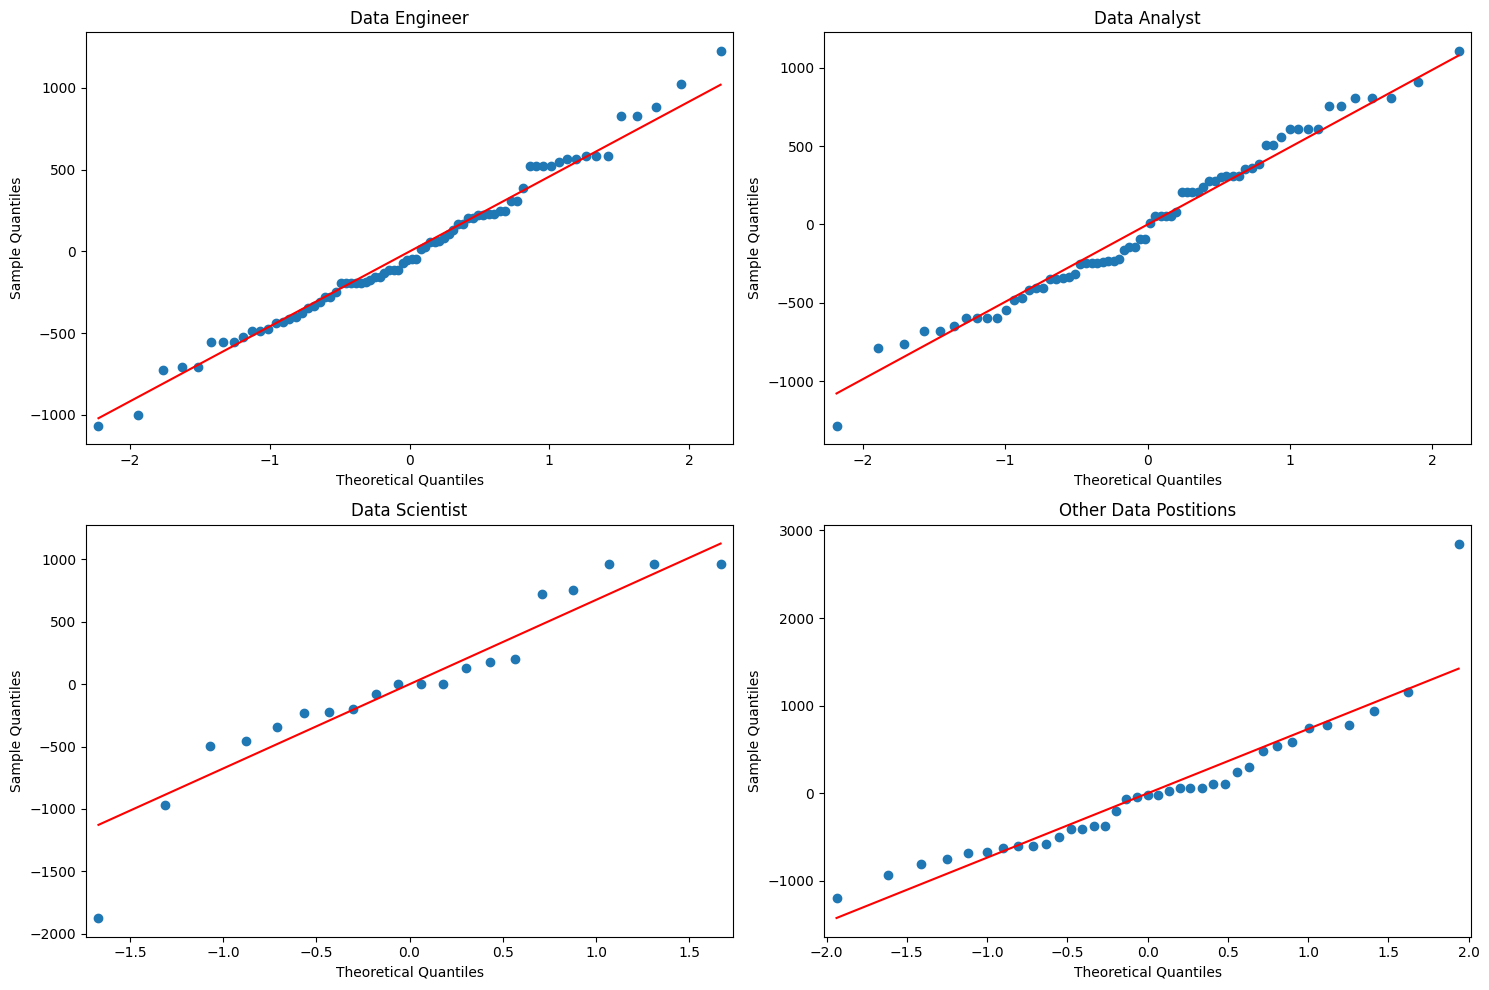

In [ ]:
# Q-Q plot for normality assumption
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.qqplot(test_DE.resid, line='s', ax=axes[0,0])
axes[0,0].set(title='Data Engineer')

sm.qqplot(test_DA.resid, line='s', ax=axes[0,1])
axes[0,1].set(title='Data Analyst')

sm.qqplot(test_DS.resid, line='s', ax=axes[1,0])
axes[1,0].set(title='Data Scientist')

sm.qqplot(test_rest.resid, line='s', ax=axes[1,1])
axes[1,1].set(title='Other Data Postitions')

plt.tight_layout()
plt.show()

### INSIGHT:
1. Assumption assessment of 'Fitted Salary Max' versus 'Residuals' plots (fitted values vs. residuals):
- Constant variance: Except for residual plot for data scientist is heteroskedastic, the other 3 residual plots are homoskedastic;
- Independence: All plots display scattered randomly across the x-axis;
- Zero mean: All plots evenly weigh around zero;
- Linearity: All titles do not violate linearity assumption, which is tantamount to the rise in salary may be consistent with each year of expxerience increased;
- Normality: None of the model displays normal distribution.

2. Boxplot and histogram of residuals:
- A few outliers display on individual boxplot of residuals;
- All 4 plots are skewed, which indicate non-normal distribution of the data.

## Checking outliers

In [ ]:
outlier_count_temp = 0
for job, test_job, df_job in [('Data Engineer', test_DE, df_DE),
                               ('Data Analyst', test_DA, df_DA),
                               ('Data Scientist', test_DS, df_DS),
                               ('Other Data Positions', test_rest, df_rest)]:
  Q1_sub = test_job.resid.quantile(0.25)
  Q3_sub = test_job.resid.quantile(0.75)
  IQR_sub = Q3_sub - Q1_sub
  outlier_indices_temp = np.where((test_job.resid < (Q1_sub - 1.5 * IQR_sub)) | (test_job.resid > (Q3_sub + 1.5 * IQR_sub)))[0]

  # Select outliers from original data using indices
  outliers_df_temp = pd.DataFrame(df_job.iloc[outlier_indices_temp])

  print(f'\nNumber of ouliers in {job} dataset:', len(outliers_df_temp))
  display(outliers_df_temp.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))
  outlier_count_temp += len(outliers_df_temp)

print('\nTotal number of outliers:', outlier_count_temp)


Number of ouliers in Data Engineer dataset: 1


,Location,Due Date,Level,Title,Year of Experience,Salary Max
242,Ha Noi city,2023,Senior,Data Engineer,4.0,4500



Number of ouliers in Data Analyst dataset: 0


,Location,Due Date,Level,Title,Year of Experience,Salary Max



Number of ouliers in Data Scientist dataset: 1


,Location,Due Date,Level,Title,Year of Experience,Salary Max
104,Ho Chi Minh city,2023,Senior,Data Scientist,5.0,2500



Number of ouliers in Other Data Positions dataset: 1


,Location,Due Date,Level,Title,Year of Experience,Salary Max
162,Ha Noi city,2023,Fresher,AI Engineer,1.0,1060



Total number of outliers: 3


### Insights:
- If we adopt IQR method to draw out outliers, the total amount of outliers decreases by 3, after splitting the original dataset into 4 smaller title-based datasets;
- Presumably each year of experience increased equals to a rise of 1 grand in salary, there are some distinguishable observations.

### **Second conclusion:**
- After splitting data based on top 3 titles and beyond, establish an estimator that is a product of their level and year of experience can be a valuable approach to reach better insight.

## New estimator

In [ ]:
level_mapping = {'Internship': 1, 'Fresher': 2, 'Junior': 3, 'Senior': 4, 'Manager': 5}
df['Level Encoded'] = df['Level'].map(level_mapping)
df['Seniority'] = df['Level Encoded'] * df['Year of Experience']

In [ ]:
display(df.head())

,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority
0,Ha Noi city,2023,Junior,Data Engineer,3.0,1270,3,9.0
1,Ha Noi city,2023,Senior,Data Engineer,4.0,2500,4,16.0
2,Ha Noi city,2023,Junior,Data Analyst,2.0,1154,3,6.0
3,Ha Noi city,2024,Fresher,Data Engineer,1.0,850,2,2.0
4,Ha Noi city,2024,Junior,Business Analyst,2.5,1185,3,7.5


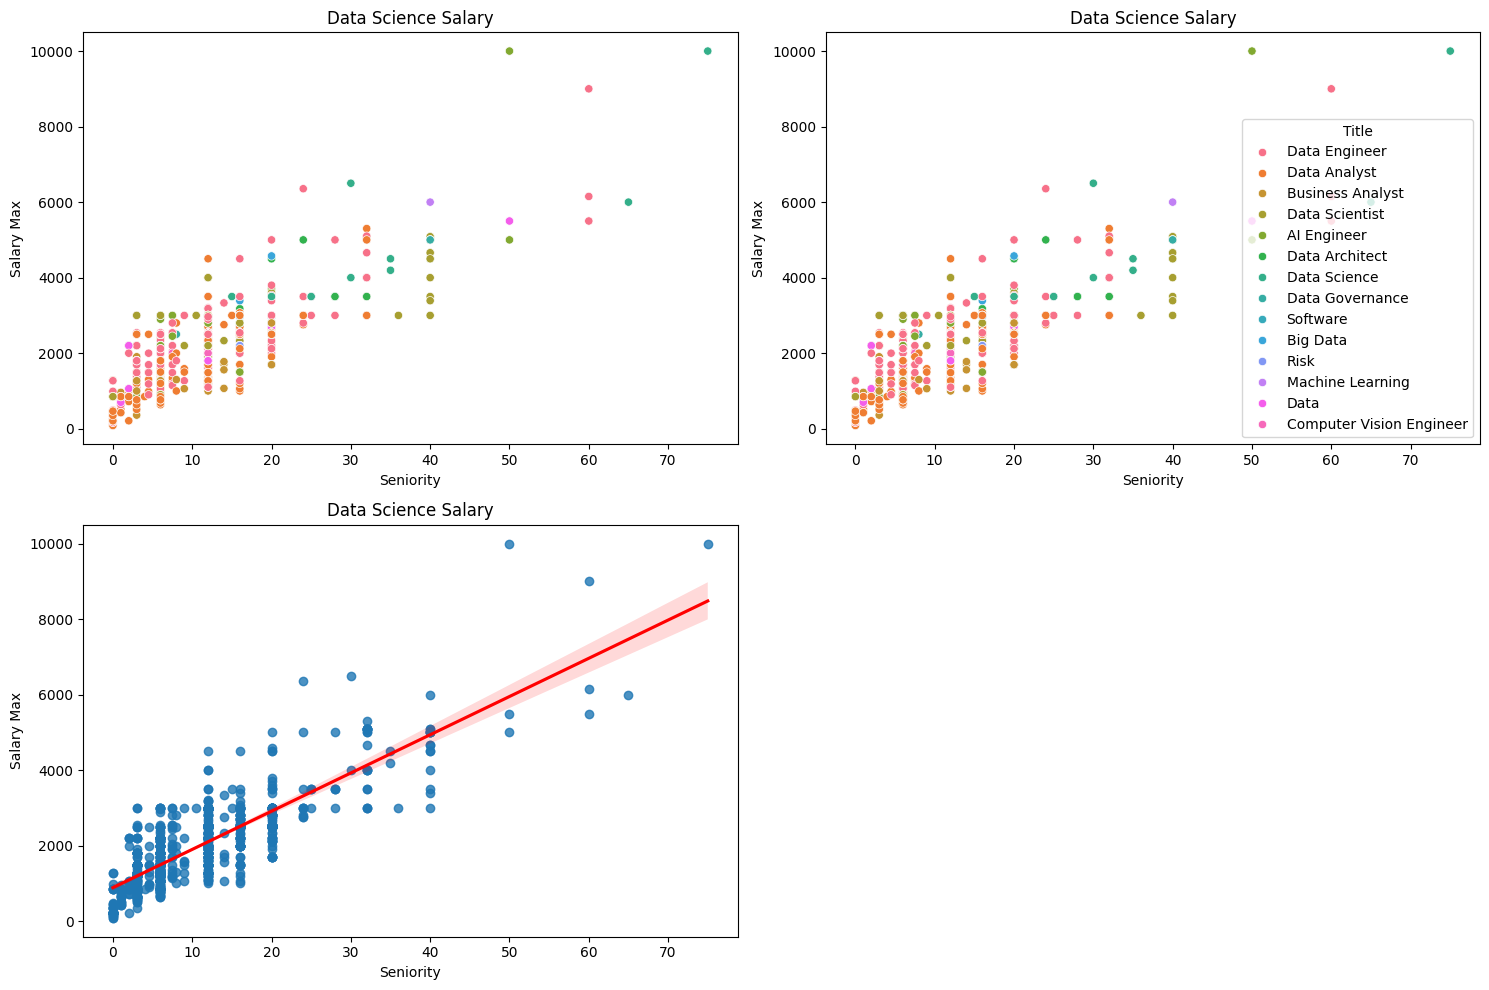

In [ ]:
# Scatter plot, Linear regression line Seniority vs Salary Max
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].set(xlabel='Seniority', ylabel='Salary Max', title='Data Science Salary');
sns.scatterplot(ax=axes[0,0], x='Seniority', y='Salary Max', data=df, hue='Title', legend=False)

axes[0,1].set(xlabel='Seniority', ylabel='Salary Max', title='Data Science Salary');
sns.scatterplot(ax=axes[0,1], x='Seniority', y='Salary Max', data=df, hue='Title')

axes[1,0].set(xlabel='Seniority', ylabel='Salary Max', title='Data Science Salary');
sns.regplot(ax=axes[1,0], x='Seniority', y='Salary Max', data=df, line_kws=dict(color="r"))

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# R using pandas library
bivar_df = pd.DataFrame({'Seniority': df['Seniority'],
                         'Salary Max': df['Salary Max']})
print('Correlation coefficient:', bivar_df.corr()['Seniority']['Salary Max'])
display(bivar_df.corr())

Correlation coefficient: 0.8278014879703646


,Seniority,Salary Max
Seniority,1.000000,0.827801
Salary Max,0.827801,1.000000


In [ ]:
x_sen = df['Seniority']
X_sen = sm.add_constant(x_sen)
y_sen = df['Salary Max']

X_train_sen, X_test_sen, y_train_sen, y_test_sen = train_test_split(X_sen, y_sen, test_size=0.2, random_state=42)

In [ ]:
# Fitting train data into OLS model
model_train_sen = sm.OLS(y_train_sen, X_train_sen).fit()
print(model_train_sen.summary())

# Fitting test data into OLS model
model_test_sen = sm.OLS(y_test_sen, X_test_sen).fit()
print(model_test_sen.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary Max   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1773.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          5.97e-205
Time:                        10:45:54   Log-Likelihood:                -6288.8
No. Observations:                 800   AIC:                         1.258e+04
Df Residuals:                     798   BIC:                         1.259e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        880.1125     35.168     25.026      0.0

In [ ]:
mse_sen = mean_squared_error(y_test_sen, model_test_sen.predict(X_test_sen))
print(f"Mean Squared Error on test set: {mse_sen}")
r2_sen = r2_score(y_test_sen, model_test_sen.predict(X_test_sen))
print(f"R-squared on test set: {r2_sen}")

Mean Squared Error on test set: 324948.24755681184
R-squared on test set: 0.6746508792176258


### Insights:
- The model seems to capture better proportion of the variance in salary (~67%, rise by 3%);
- However, the high MSE suggests there is still significant room for improvement in terms of reducing the average squared difference between predicted and actual salaries.

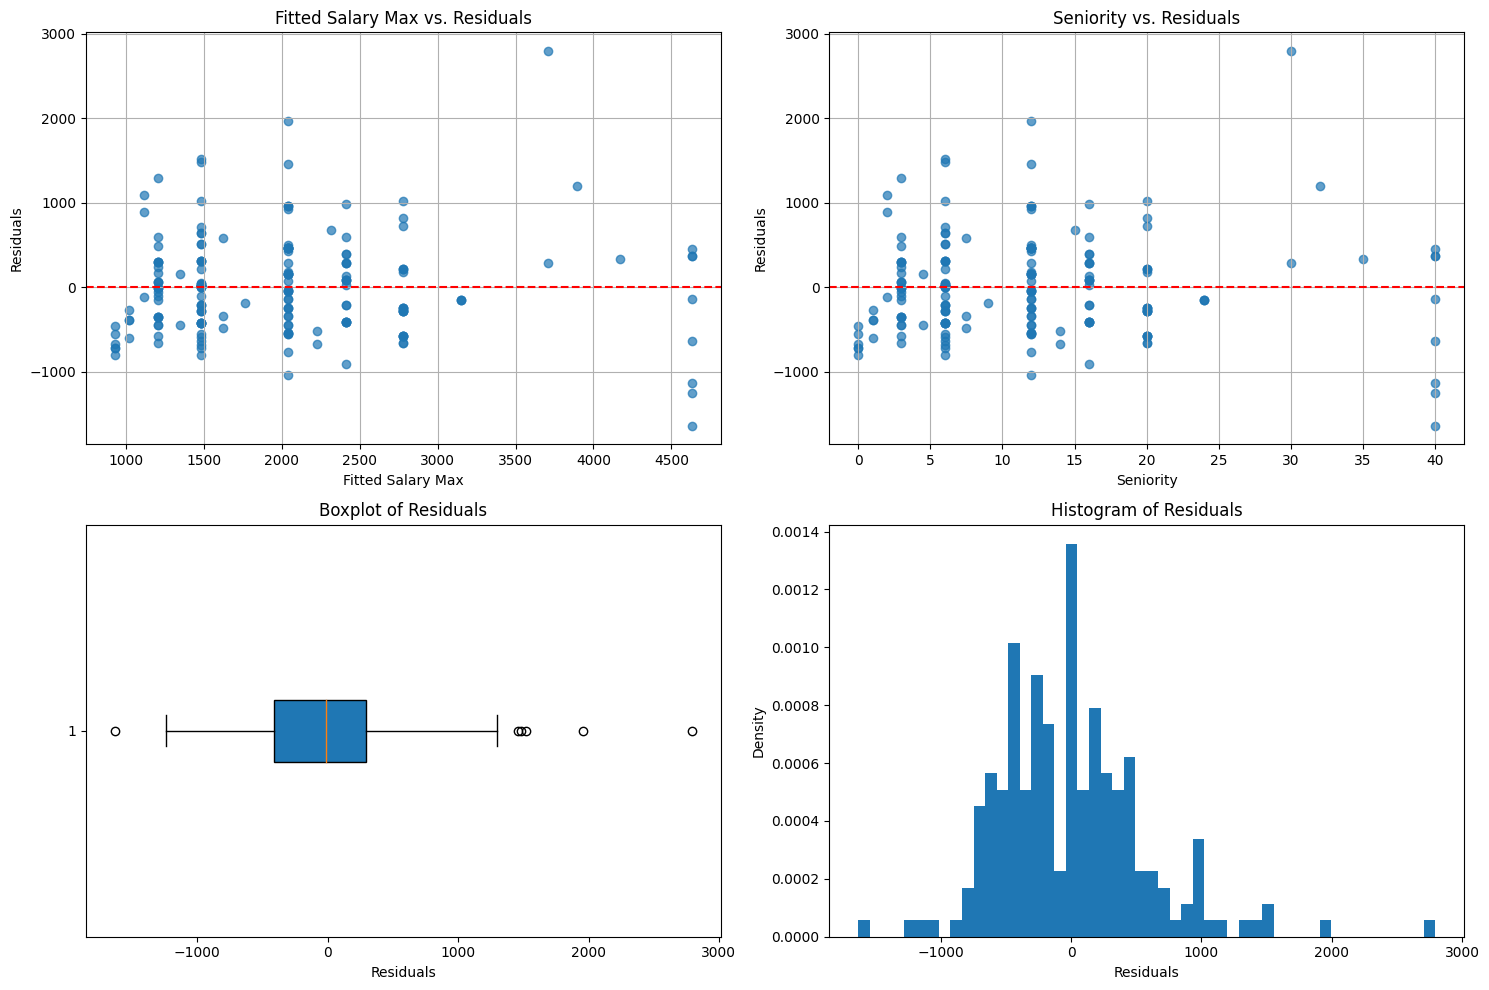

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residual plot between residuals of salary and fitted values
axes[0,0].scatter(model_test_sen.fittedvalues, model_test_sen.resid, alpha=0.7)
axes[0,0].set(xlabel='Fitted Salary Max', ylabel='Residuals', title='Fitted Salary Max vs. Residuals')
axes[0,0].grid(True)
axes[0,0].axhline(y=0, color='r', linestyle='--')

# Residual plot between residuals of salary and explained variable
axes[0,1].scatter(X_test_sen['Seniority'], model_test_sen.resid, alpha=0.7)
axes[0,1].set(xlabel='Seniority', ylabel='Residuals', title='Seniority vs. Residuals')
axes[0,1].grid(True)
axes[0,1].axhline(y=0, color='r', linestyle='--')

# Box plot of residuals
axes[1,0].boxplot(model_test_sen.resid, vert=False, showfliers=True, patch_artist=True)
axes[1,0].set(xlabel='Residuals', ylabel='', title='Boxplot of Residuals')

# Histogram of residuals
axes[1,1].hist(model_test_sen.resid, density=True, bins=50)
axes[1,1].set(xlabel='Residuals', ylabel='Density', title='Histogram of Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Breusch-Pagan test for homoskedasticity assumption
print('Breusch-Pagan test for homoskedasticity assumption:')

BP_test = [sms.het_breuschpagan(model_test_sen.resid, model_test_sen.model.exog)]
BP_values = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
BP_df = pd.DataFrame(data=BP_test, columns=BP_values)
display(BP_df)

print()
if BP_df['p-value'].values[0] < 0.05:
  print('Heteroskedasticity detected.')
else:
  print('Homoskedasticity assumption is likely met.')

# Zero mean test
resid_df = pd.DataFrame({'Residuals': model_test_sen.resid})
mean_residuals = resid_df['Residuals'].mean()
print("\nMean of Residuals:", mean_residuals)

# Harvey-Collier test for linearity assumption
print('\nHarvey-Collier test for linearity assumption')

HC_test = [sms.linear_harvey_collier(model_test_sen)]
HC_values = ['t-value', 'p-value']
HC_df = pd.DataFrame(data=HC_test, columns=HC_values)
display(HC_df)

print()
if HC_df['p-value'].values[0] < 0.05:
  print('Non-linearity detected.')
else:
  print('Linearity assumption is likely met.')

Breusch-Pagan test for homoskedasticity assumption:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,8.574015,0.00341,8.868466,0.003264



Heteroskedasticity detected.

Mean of Residuals: 9.094947017729283e-15

Harvey-Collier test for linearity assumption


,t-value,p-value
0,-1.192597,0.234469



Linearity assumption is likely met.


Shapiro-Wilk test for checking normality of residuals:


,stat,p-value
0,0.948145,0.000001



The data has non-normal distribution.


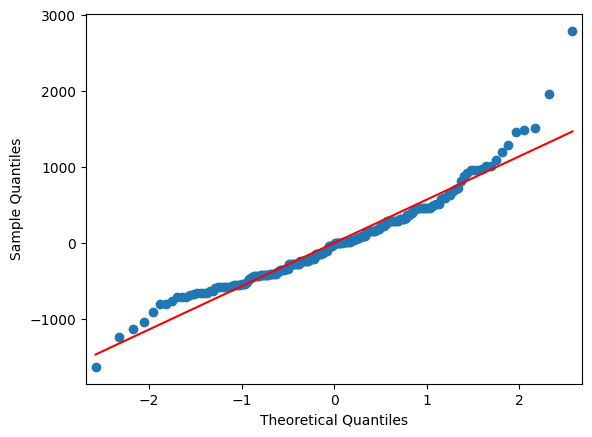

In [ ]:
# Shapiro-Wilk test for normality assumption
print('Shapiro-Wilk test for checking normality of residuals:')

SW_test = [shapiro(model_test_sen.resid)]
SW_values = ['stat', 'p-value']
SW_df = pd.DataFrame(data=SW_test, columns=SW_values)
display(SW_df)

print()
if SW_df['p-value'].values[0] < 0.05:
  print('The data has non-normal distribution.')
else:
  print('The data is normally distributed.')

# Q-Q plot for normality assumption
sm.qqplot(model_test_sen.resid, line='s');

In [ ]:
display(pd.DataFrame({'IQR': model_test_sen.resid.describe().loc[['min', '25%', '50%', '75%', 'max']]}))

,IQR
min,-1632.805422
25%,-409.436107
50%,-15.992808
75%,294.888939
max,2793.598459


In [ ]:
# Outliers using interquartile range IQR
Q1 = model_test_sen.resid.quantile(0.25)
Q3 = model_test_sen.resid.quantile(0.75)
IQR = Q3 - Q1
outlier_indices = np.where((model_test_sen.resid < (Q1 - 1.5 * IQR)) | (model_test_sen.resid > (Q3 + 1.5 * IQR)))[0]
outliers_IQR_df = pd.DataFrame(df.iloc[outlier_indices])

print('Number of ouliers in original data:', len(outliers_IQR_df))
display(outliers_IQR_df.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))

Number of ouliers in original data: 6


,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120,4,20.0
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540,4,12.0
178,Ha Noi city,2024,Senior,Data Analyst,3.0,1355,4,12.0
92,Ha Noi city,2023,Junior,Data Analyst,2.0,1270,3,6.0
125,Ha Noi city,2024,Junior,Data Analyst,2.0,900,3,6.0
79,Ho Chi Minh city,2024,Fresher,Data Analyst,0.5,850,2,1.0


In [ ]:
# Outliers using z-score, threshold 2.5 and 3
z = np.abs(stats.zscore(model_test_sen.resid))
threshold_values = [2.5, 3]

for threshold_z in threshold_values:
    outlier_indices = np.where(z > threshold_z)[0]
    outliers_z_df = pd.DataFrame(df.iloc[outlier_indices])
    print(f'Number of outliers with threshold {threshold_z}: {len(outliers_z_df)}')
    display(outliers_z_df.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))

Number of outliers with threshold 2.5: 6


,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120,4,20.0
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540,4,12.0
178,Ha Noi city,2024,Senior,Data Analyst,3.0,1355,4,12.0
92,Ha Noi city,2023,Junior,Data Analyst,2.0,1270,3,6.0
125,Ha Noi city,2024,Junior,Data Analyst,2.0,900,3,6.0
79,Ho Chi Minh city,2024,Fresher,Data Analyst,0.5,850,2,1.0


Number of outliers with threshold 3: 2


,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120,4,20.0
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540,4,12.0


# **Third conclusion:**
- Creation of a new estimator 'Seniority' seems to be a good approach to fit the data into OLS model;
- Since the data is not normally distributed, transformation of data is ineluctable procedure;
- Based on the residual analysis, heteroskedasticity is consistent throughout all daatasets analyzed, non-normally distributed of data, hence adopting power transformation.

## Transform salary max

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()

In [ ]:
df['Salary Pow-Trans'] = transformer.fit_transform(df[['Salary Max']])

In [ ]:
display(df.head())

,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority,Salary Pow-Trans
0,Ha Noi city,2023,Junior,Data Engineer,3.0,1270,3,9.0,-0.634834
1,Ha Noi city,2023,Senior,Data Engineer,4.0,2500,4,16.0,0.565730
2,Ha Noi city,2023,Junior,Data Analyst,2.0,1154,3,6.0,-0.777433
3,Ha Noi city,2024,Fresher,Data Engineer,1.0,850,2,2.0,-1.194249
4,Ha Noi city,2024,Junior,Business Analyst,2.5,1185,3,7.5,-0.738570


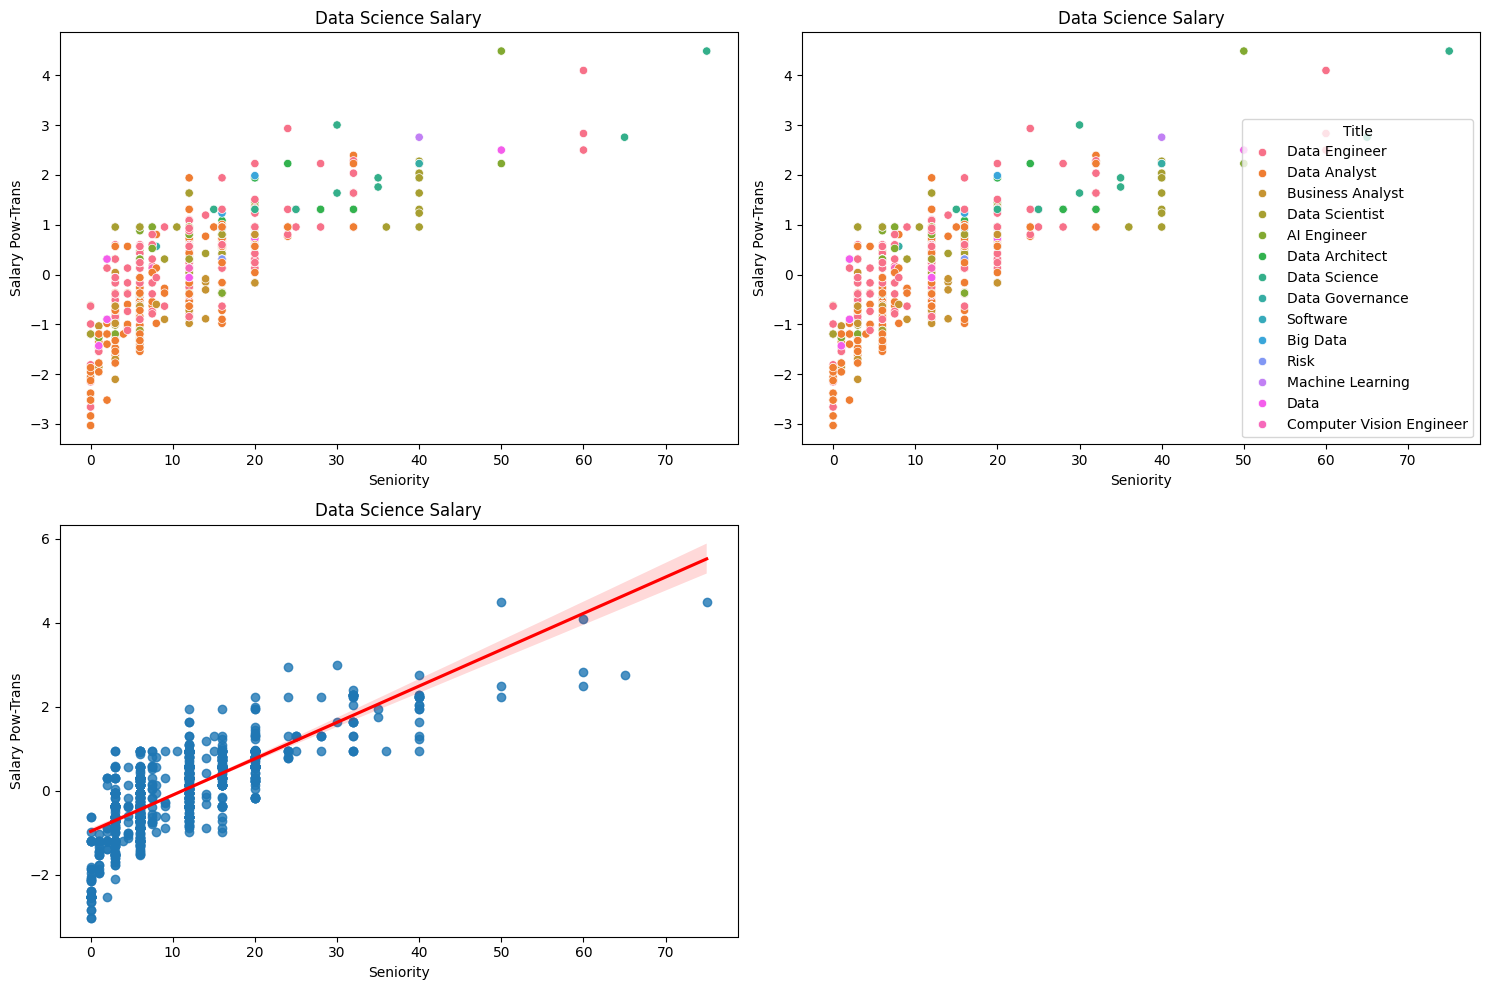

In [ ]:
# Scatter plot, Linear regression line Seniority vs Salary Pow-Trans
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].set(xlabel='Seniority', ylabel='Salary Pow-Trans', title='Data Science Salary');
sns.scatterplot(ax=axes[0,0], x='Seniority', y='Salary Pow-Trans', data=df, hue='Title', legend=False)

axes[0,1].set(xlabel='Seniority', ylabel='Salary Pow-Trans', title='Data Science Salary');
sns.scatterplot(ax=axes[0,1], x='Seniority', y='Salary Pow-Trans', data=df, hue='Title')

axes[1,0].set(xlabel='Seniority', ylabel='Salary Pow-Trans', title='Data Science Salary');
sns.regplot(ax=axes[1,0], x='Seniority', y='Salary Pow-Trans', data=df, line_kws=dict(color="r"))

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
bivar_df = pd.DataFrame({'Seniority': df['Seniority'],
                         'Salary Pow-Trans': df['Salary Pow-Trans']})
print('Correlation coefficient:', bivar_df.corr()['Seniority']['Salary Pow-Trans'])
display(bivar_df.corr())

Correlation coefficient: 0.780122498818768


,Seniority,Salary Pow-Trans
Seniority,1.000000,0.780122
Salary Pow-Trans,0.780122,1.000000


### Insights:
- The transformation might improve the fit for the model (reducing errors) even if it weakens the linear relationship (reducing correlation coefficient).

In [ ]:
x_pow = df['Seniority']
X_pow = sm.add_constant(x_pow)
y_pow = df['Salary Pow-Trans']

X_train_pow, X_test_pow, y_train_pow, y_test_pow = train_test_split(X_pow, y_pow, test_size=0.2, random_state=42)

In [ ]:
# Fitting train data into OLS model
model_train_pow = sm.OLS(y_train_pow, X_train_pow).fit()
print(model_train_pow.summary())

# Fitting test data into OLS model
model_test_pow = sm.OLS(y_test_pow, X_test_pow).fit()
print(model_test_pow.summary())

                            OLS Regression Results                            
Dep. Variable:       Salary Pow-Trans   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1224.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          2.94e-163
Time:                        10:45:59   Log-Likelihood:                -775.09
No. Observations:                 800   AIC:                             1554.
Df Residuals:                     798   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9683      0.036    -27.107      0.0

In [ ]:
mse_pow = mean_squared_error(y_test_pow, model_test_pow.predict(X_test_pow))
print(f"Mean Squared Error on test set: {mse_pow}")
r2_pow = r2_score(y_test_pow, model_test_pow.predict(X_test_pow))
print(f"R-squared on test set: {r2_pow}")

Mean Squared Error on test set: 0.32868447179569427
R-squared on test set: 0.6266150448098801


### Insights:
- Power transformation has tendency to lower the adjusted coefficient of determination, which is normal, since it may help reduce the overfitting of data, the efficiency increasing;
- As evident, there is drop but not too significant, a moderately good fit of OLS model.

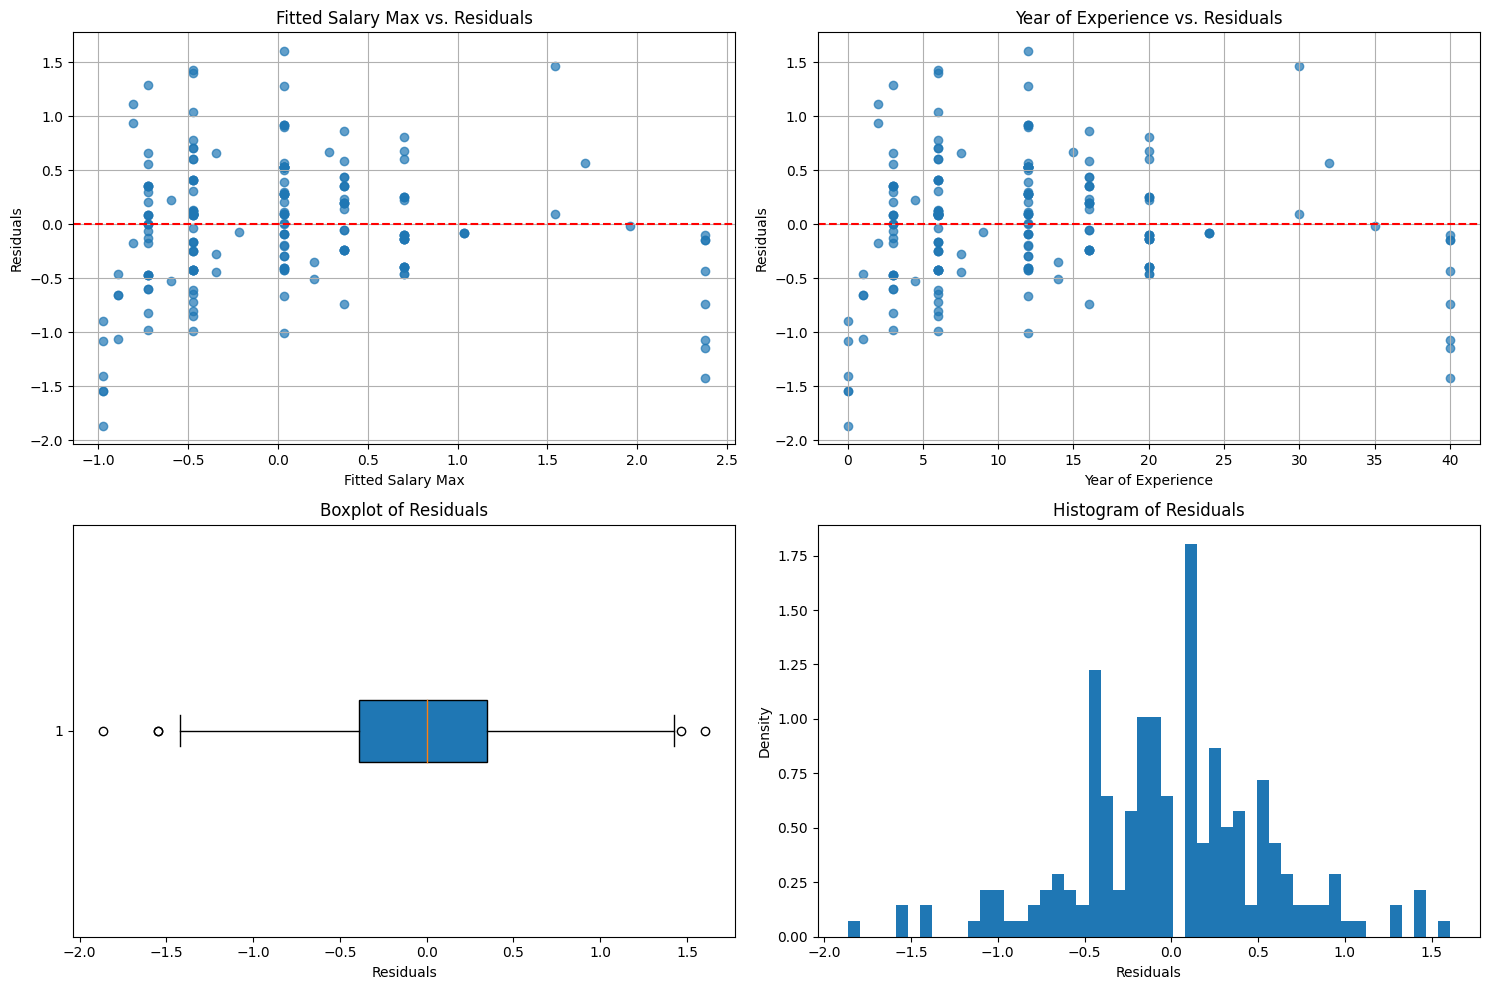

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residual plot between residuals of salary and fitted values
axes[0,0].scatter(model_test_pow.fittedvalues, model_test_pow.resid, alpha=0.7)
axes[0,0].set(xlabel='Fitted Salary Max', ylabel='Residuals', title='Fitted Salary Max vs. Residuals')
axes[0,0].grid(True)
axes[0,0].axhline(y=0, color='r', linestyle='--')

# Residual plot between residuals of salary and explained variable
axes[0,1].scatter(X_test_pow['Seniority'], model_test_pow.resid, alpha=0.7)
axes[0,1].set(xlabel='Year of Experience', ylabel='Residuals', title='Year of Experience vs. Residuals')
axes[0,1].grid(True)
axes[0,1].axhline(y=0, color='r', linestyle='--')

# Box plot of residuals
axes[1,0].boxplot(model_test_pow.resid, vert=False, showfliers=True, patch_artist=True)
axes[1,0].set(xlabel='Residuals', ylabel='', title='Boxplot of Residuals')

# Histogram of residuals
axes[1,1].hist(model_test_pow.resid, density=True, bins=50)
axes[1,1].set(xlabel='Residuals', ylabel='Density', title='Histogram of Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Breusch-Pagan test for homoskedasticity assumption
print('Breusch-Pagan test for homoskedasticity assumption:')

BP_test = [sms.het_breuschpagan(model_test_pow.resid, model_test_pow.model.exog)]
BP_values = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
BP_df = pd.DataFrame(data=BP_test, columns=BP_values)
display(BP_df)

print()
if BP_df['p-value'].values[0] < 0.05:
  print('Heteroskedasticity detected.')
else:
  print('Homoskedasticity assumption is likely met.')

# Zero mean test
resid_df = pd.DataFrame({'Residuals': model_test_pow.resid})
mean_residuals = resid_df['Residuals'].mean()
print('\nMean of Residuals:', mean_residuals)

# Harvey-Collier test for linearity assumption
print('\nHarvey-Collier test for linearity assumption')

HC_test = [sms.linear_harvey_collier(model_test_pow)]
HC_values = ['t-value', 'p-value']
HC_df = pd.DataFrame(data=HC_test, columns=HC_values)
display(HC_df)

print()
if HC_df['p-value'].values[0] < 0.05:
  print('Non-linearity detected.')
else:
  print('Linearity assumption is likely met.')

Breusch-Pagan test for homoskedasticity assumption:


,Lagrange multiplier statistic,p-value,f-value,f p-value
0,1.301326,0.253971,1.29675,0.256184



Homoskedasticity assumption is likely met.

Mean of Residuals: -9.325873406851315e-17

Harvey-Collier test for linearity assumption


,t-value,p-value
0,-1.274585,0.203965



Linearity assumption is likely met.


In [ ]:
# Shapiro-Wilk test for normality assumption
print('Shapiro-Wilk test for checking normality of residuals:')

SW_test = [shapiro(model_test_pow.resid)]
SW_values = ['stat', 'p-value']
SW_df = pd.DataFrame(data=SW_test, columns=SW_values)
display(SW_df)

print()
if SW_df['p-value'].values[0] < 0.05:
  print('The data has non-normal distribution.')
else:
  print('The data is normally distributed.')

Shapiro-Wilk test for checking normality of residuals:


,stat,p-value
0,0.987327,0.071411



The data is normally distributed.


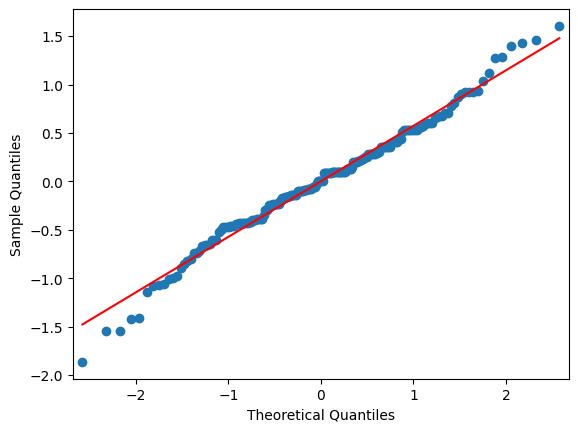

In [ ]:
sm.qqplot(model_test_pow.resid, line='s');

In [ ]:
display(pd.DataFrame({'IQR': model_test_pow.resid.describe().loc[['min', '25%', '50%', '75%', 'max']]}))

,IQR
min,-1.865085
25%,-0.391804
50%,0.002957
75%,0.350117
max,1.605138


In [ ]:
# Outliers using interquartile range IQR
Q1 = model_test_pow.resid.quantile(0.25)
Q3 = model_test_pow.resid.quantile(0.75)
IQR = Q3 - Q1
outlier_indices = np.where((model_test_pow.resid < (Q1 - 1.5 * IQR)) | (model_test_pow.resid > (Q3 + 1.5 * IQR)))[0]
outliers_IQR_df = pd.DataFrame(df.iloc[outlier_indices])

print('Number of ouliers in original data:', len(outliers_IQR_df))
display(outliers_IQR_df.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))

Number of ouliers in original data: 5


,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority,Salary Pow-Trans
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120,4,20.0,0.239573
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540,4,12.0,0.598403
165,Ho Chi Minh city,2023,Senior,Data Engineer,3.0,1900,4,12.0,0.035614
128,Ho Chi Minh city,2024,Junior,Data Analyst,1.0,2200,3,3.0,0.310793
91,Ho Chi Minh city,2023,Junior,Data Analyst,1.0,1500,3,3.0,-0.372201


In [ ]:
# Outliers using z-score, threshold 2.5 and 3
z = np.abs(stats.zscore(model_test_pow.resid))
threshold_values = [2.5, 3]

for threshold_z in threshold_values:
    outlier_indices = np.where(z > threshold_z)[0]
    outliers_z_df = pd.DataFrame(df.iloc[outlier_indices])
    print(f'Number of outliers with threshold {threshold_z}: {len(outliers_z_df)}')
    display(outliers_z_df.sort_values(by='Salary Max', ascending=False).sort_values(by='Year of Experience', ascending=False))

Number of outliers with threshold 2.5: 5


,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority,Salary Pow-Trans
83,Ha Noi city,2023,Senior,Data Engineer,5.0,2120,4,20.0,0.239573
73,Ha Noi city,2023,Senior,Data Analyst,3.0,2540,4,12.0,0.598403
165,Ho Chi Minh city,2023,Senior,Data Engineer,3.0,1900,4,12.0,0.035614
128,Ho Chi Minh city,2024,Junior,Data Analyst,1.0,2200,3,3.0,0.310793
91,Ho Chi Minh city,2023,Junior,Data Analyst,1.0,1500,3,3.0,-0.372201


Number of outliers with threshold 3: 1


,Location,Due Date,Level,Title,Year of Experience,Salary Max,Level Encoded,Seniority,Salary Pow-Trans
91,Ho Chi Minh city,2023,Junior,Data Analyst,1.0,1500,3,3.0,-0.372201


### Insights:
- The result has been transformed to normal distribution, and homoskedasticity is assumed after conducting power transformation.

### **Four conclusion:**
- The analyzed approaches are legion, but engendering a new estimator and conducting power transformation produce a normal distributed data with a moderate fit of OLS model, including homoskedasiticity, linearity, and independency assumptions are captured within the model's residuals.

# V. Estimating the value of a parameter

### **Construct and interpret a confidence interval for the population proportion**

#### **I -** **Based on a data set we collected of 1,000 observations of data science salaries in two major cities, we construct and interpret a confidence interval about the proportion of positions with one year of experience and salaries above $1000 in three specific majors DS, DE, DA with 95% confidence interval**

In [ ]:
datasets = [data_DE, data_DA, data_DS]
from scipy.stats import norm
# Confidence level
confidence_level = 0.95
z_value = norm.ppf((1 + confidence_level) / 2)

# Calculate confidence intervals
for data in datasets:
    filtered_data = data[(data['Year of Experience'] == 1.0) & (data['Salary Max'] > 1000)]
    n = len(data)
    if n > 0:
        p_hat = len(filtered_data) / n
        margin_of_error = z_value * np.sqrt((p_hat * (1 - p_hat)) / n)
        confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)

        print(f"Dataset: {data['Title'].iloc[0]}")
        print(f"Sample size (n): {n}")
        print(f"Sample proportion (p̂): {p_hat:.4f}")
        print(f"Confidence interval: {confidence_interval}\n")
    else:
        print(f"Dataset: {data['Title'].iloc[0]}")
        print("No freshers found in this dataset.\n")

Dataset: Data Engineer
Sample size (n): 363
Sample proportion (p̂): 0.0937
Confidence interval: (0.06369123295388367, 0.1236365907375764)

Dataset: Data Analyst
Sample size (n): 335
Sample proportion (p̂): 0.0866
Confidence interval: (0.05645509547398345, 0.11667923288422552)

Dataset: Data Scientist
Sample size (n): 79
Sample proportion (p̂): 0.1013
Confidence interval: (0.03474132234461452, 0.16779032322500573)



**Interpret for the dataset of Data Engineer**: The sample proportion (p̂) indicates that approximately 9.37% of the Data Engineers. We are 95% confident that the true proportion of Data Engineers with 1 year of experience and salaries above $1000 in the population is between 6.36% and 12.36%. This range is relatively narrow, indicating a fairly accurate estimate with a sample size of 363.

**Interpret for the dataset of Data Analyst**: The sample proportion (p̂) indicates that approximately 8.66% of the Data Analysts. We are 95% confident that the true proportion of Data Analysts with 1 year of experience and salaries above $1000 in the population lies between 5.64% and 11.67%. This interval is slightly wider than that for Data Engineers but still provides a precise estimate given the sample size of 335.

**Interpret for the dataset of Data Scientist**: The sample proportion (p̂) indicates that approximately 10.13% of the Data Scientists. We are 95% confident that the true proportion of Data Scientists with 1 year of experience and salaries above 1000$ in the population lies between 3.47% and 16.77%. This interval is wider compared to those of Data Engineers and Data Analysts, reflecting greater uncertainty in the estimate due to a smaller sample size of 79.


#### **II.	Construct and interpret a confidence interval about the proportion of positions with level of Senior and a maximum salary over $3000 in three specific majors Data Engineer, Data Analyst, Data Scientist with 95% confidence interval**

In [ ]:
for data in datasets:
  senior_hcm_data = data[(data['Level'] == 'Senior') & (data['Location'] == 'Ho Chi Minh city')]

    # Total number of Senior positions in Ho Chi Minh city
  total_senior_hcm = len(senior_hcm_data)

    # Number of Senior positions in Ho Chi Minh city with Salary Max > 3000$
  senior_hcm_high_salary = senior_hcm_data[senior_hcm_data['Salary Max'] > 3000]
  total_senior_hcm_high_salary = len(senior_hcm_high_salary)

  if total_senior_hcm > 0:
        # Calculate the proportion
      p_hat = total_senior_hcm_high_salary / total_senior_hcm

        # Calculate the confidence interval
      margin_of_error = z_value * np.sqrt((p_hat * (1 - p_hat)) / total_senior_hcm)
      confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)

        # Print the result
      print(f"Dataset:  {data['Title'].iloc[0]}")
      print(f"Total Senior in Ho Chi Minh city: {total_senior_hcm}")
      print(f"Proportion with Senior positions in Ho Chi Minh city with Salary Max > 3000$: {p_hat:.4f}")
      print(f"Confidence interval: {confidence_interval}\n")
  else:
      print(f"Title: {title}")
      print("No Senior employees in Ho Chi Minh city found in this dataset.\n")

Dataset:  Data Engineer
Total Senior in Ho Chi Minh city: 99
Proportion with Senior positions in Ho Chi Minh city with Salary Max > 3000$: 0.1010
Confidence interval: (0.04165059167052279, 0.16036961034967923)

Dataset:  Data Analyst
Total Senior in Ho Chi Minh city: 66
Proportion with Senior positions in Ho Chi Minh city with Salary Max > 3000$: 0.0455
Confidence interval: (-0.004798581417433757, 0.09570767232652466)

Dataset:  Data Scientist
Total Senior in Ho Chi Minh city: 34
Proportion with Senior positions in Ho Chi Minh city with Salary Max > 3000$: 0.0882
Confidence interval: (-0.007103837023982665, 0.1835744252592768)



 * **Interpret for the dataset of Data Engineer:** The sample proportion indicates that approximately 10.10%. We are 95% confident that the true proportion of Senior Data Engineers in Ho Chi Minh City with a maximum salary over $3000 lies between 4.16% and 16.03%. This interval indicates a moderate level of precision in our estimate, given the sample size of 99.

* **Interpret for the dataset of Data Analyst:** The sample proportion indicates that approximately 4.55% . We are 95% confident that the true proportion of Senior Data Analysts in Ho Chi Minh City with a maximum salary over $3000 lies between -0.479% and 9.57%. This interval is relatively wide, reflecting greater uncertainty in the estimate due to the smaller sample size of 66.

* **Interpret for the dataset of Data Scientist:** The sample proportion indicates that approximately 8.82%. We are 95% confident that the true proportion of Senior Data Scientists in Ho Chi Minh City with a maximum salary over $3000 lies between -0.71% and 18.36%. This interval is the widest among the three datasets, indicating the highest level of uncertainty due to the smallest sample size of 34.


### **Construct and interpret a confidence interval for the Population Mean**

#### **Construct a 95% confidence interval for the mean salary max across three specific majors: DS, DE, and DA at senior positions. Interpret the interval.**

In [ ]:
from scipy.stats import t
for data in datasets:

    senior_data = data[(data['Level'] == 'Senior')]

    # Calculate sample mean
    sample_mean = senior_data['Salary Max'].mean()

    # Calculate sample standard deviation
    sample_std = senior_data['Salary Max'].std()

    # Calculate sample size
    sample_size = len(senior_data)

    # Calculate t-score
    t_score = t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

    # Calculate margin of error
    margin_of_error = t_score * (sample_std / np.sqrt(sample_size))

    # Calculate confidence interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    # Print results
    print(f"Dataset: {data['Title'].iloc[0]}")
    print(f"Sample Mean: {sample_mean}")
    print(f"Sample Standard Deviation: {sample_std}")
    print(f"Sample Size: {sample_size}")
    print(f"Confidence Interval: {confidence_interval}\n")

Dataset: Data Engineer
Sample Mean: 2377.183673469388
Sample Standard Deviation: 670.5824769547323
Sample Size: 196
Confidence Interval: (2282.717567915245, 2471.6497790235308)

Dataset: Data Analyst
Sample Mean: 2205.832
Sample Standard Deviation: 663.7799958108934
Sample Size: 125
Confidence Interval: (2088.321570020957, 2323.3424299790427)

Dataset: Data Scientist
Sample Mean: 2647.081632653061
Sample Standard Deviation: 405.1667782497461
Sample Size: 49
Confidence Interval: (2530.704146110586, 2763.4591191955365)



 **Interpretation**

**Data Engineer**

* Sample Mean: 2377.18 USD
* Confidence Interval: (2282.72, 2471.65) USD
* Interpretation: We are 95% confident that the true mean salary of senior Data Engineers in the population is between 2282.72 USD and 2471.65 USD.


**Data Analyst**
* Sample Mean: 2205.832 USD
* Confidence Interval: (2088.32, 2323.34) USD
* Interpretation: We are 95% confident that the true mean salary of senior Data Analysts in the population is between 2088.32 USD and 2323.34USD.


**Data Scientist**

* Sample Mean: 2647.08 USD
* Confidence Interval: (2530.70, 2763.46) USD
* Interpretation: We are 95% confident that the true mean salary of senior Data Scientists in the population is between 2530.70 USD and 2763.46USD.


**Conclusion**
The analysis of the datasets provides us with 95% confidence intervals for the mean salaries of senior positions in three specific majors:
-	For Data Engineers, the mean salary is estimated to be between 2282.72 USD and 2471.65 USD
-	For Data Analysts, the mean salary is estimated to be between 2088.32 USD and 2323.34 USD.
-	For Data Scientists, the mean salary is estimated to be between 2530.70 USD and 2763.46USD.


These intervals suggest that senior Data Scientists tend to have higher mean salaries compared to senior Data Engineers and Data Analysts. However, the variability within each field indicates that salaries can differ significantly, highlighting the importance of context and specific conditions when interpreting these figures.


#### **Construct a 95% confidence interval for the mean salary max across three specific majors: DS, DE, and DA at Fresher positions. Interpret the interval.**

In [ ]:
for data in datasets:

    fresher_data = data[(data['Level'] == 'Fresher')]

    # Calculate sample mean
    sample_mean = fresher_data['Salary Max'].mean()

    # Calculate sample standard deviation
    sample_std = fresher_data['Salary Max'].std()

    # Calculate sample size
    sample_size = len(fresher_data)

    # Calculate t-score
    t_score = t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

    # Calculate margin of error
    margin_of_error = t_score * (sample_std / np.sqrt(sample_size))

    # Calculate confidence interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    # Print results
    print(f"Dataset: {data['Title'].iloc[0]}")
    print(f"Sample Mean: {sample_mean}")
    print(f"Sample Standard Deviation: {sample_std}")
    print(f"Sample Size: {sample_size}")
    print(f"Confidence Interval: {confidence_interval}\n")

Dataset: Data Engineer
Sample Mean: 841.0909090909091
Sample Standard Deviation: 475.2305660509338
Sample Size: 11
Confidence Interval: (521.8266706583461, 1160.3551475234722)

Dataset: Data Analyst
Sample Mean: 652.7894736842105
Sample Standard Deviation: 193.78985724730236
Sample Size: 19
Confidence Interval: (559.3857523455151, 746.1931950229059)

Dataset: Data Scientist
Sample Mean: 1525.0
Sample Standard Deviation: 954.5941546018391
Sample Size: 2
Confidence Interval: (-7051.688197091664, 10101.688197091664)



**Interpretation**

**Data Engineer:**

**Sample Mean:** 841.09 USD

**Sample Standard Deviation:** 475.23 USD

**Sample Size:** 11

**Confidence Interval:** (521.83, 1160.36)

**Interpretation:** We are 95% confident that the true mean maximum salary for Fresher positions in the Data Engineer major falls between 521.83 and 1160.36 dollars.

**Data Analyst:**

**Sample Mean:** 652.79

**Sample Standard Deviation:** 193.79

**Sample Size:** 19

**Confidence Interval:** (559.39, 746.19)

**Interpretation:** We are 95% confident that the true mean maximum salary for Fresher positions in the Data Analyst major falls between 559.39 and 746.19 dollars.

**Data Scientist:**

**Sample Mean:**1525.00

**Sample Standard Deviation:** 954.59

**Sample Size:** 2

**Confidence Interval:** (-7051.69, 10101.69)

**Interpretation:** This confidence interval is unusual and suggests a high level of uncertainty due to the small sample size (only 2 observations). The wide range from negative to positive values indicates a lack of precision in estimating the true mean maximum salary for Fresher positions in the Data Scientist major.

**Conclusion:**

The confidence intervals indicate that there is variability in the mean maximum salary across the three majors at Fresher positions. Data Analyst positions have the lowest estimated mean maximum salary, followed by Data Engineer positions, while the Data Scientist interval is highly uncertain due to the small sample size. The wide confidence interval for Data Scientist positions reflects the need for more data to provide a reliable estimate of the true mean maximum salary for Fresher positions in this major.

### **Construct and interpret a confidence interval for the Population Standard Deviation**

#### **Construct a 95% confidence interval for the standard deviation salary max across three specific majors: DS, DE, and DA at "Senior" positions. Interpret the interval.**

In [ ]:
from scipy.stats import chi2
datasets = [data_DE, data_DA, data_DS]
for data in datasets:
  # Select subset for senior level positions in Data Scientist
    level_senior = data[data['Level'] == 'Senior']

    # Compute sample standard deviation
    sample_std_dev = level_senior['Salary Max'].std()
    # Calculate sample size
    n = len(level_senior)
    # Set confidence level
    alpha = 0.05  # 95% confidence level
    # Calculate chi-square values
    chi2_lower = chi2.ppf(alpha / 2, n - 1)
    chi2_upper = chi2.ppf(1 - alpha / 2, n - 1)
    # Calculate confidence interval for standard deviation
    lower_bound = np.sqrt((n - 1) * sample_std_dev**2 / chi2_upper)
    upper_bound = np.sqrt((n - 1) * sample_std_dev**2 / chi2_lower)
    # Store confidence interval
    confidence_intervals = (lower_bound, upper_bound)

    # Print results
    print(f"Dataset: {data['Title'].iloc[0]}")
    print(f"Sample Standard Deviation: {sample_std_dev}")
    print(f"Sample Size: {n}")
    print(f"Confidence Interval: {confidence_intervals}\n")

Dataset: Data Engineer
Sample Standard Deviation: 670.5824769547323
Sample Size: 196
Confidence Interval: (610.1192667664973, 744.4521555827425)

Dataset: Data Analyst
Sample Standard Deviation: 663.7799958108934
Sample Size: 125
Confidence Interval: (590.447055088323, 758.076532307445)

Dataset: Data Scientist
Sample Standard Deviation: 405.1667782497461
Sample Size: 49
Confidence Interval: (337.87715925962925, 506.17427683768966)



**Interpretation:**

**Data Engineer:**

* Sample Standard Deviation: 670.58
* Sample Size: 196
* Confidence Interval: (610.119, 744.452)
* For Data Engineer positions, the 95% confidence interval for the standard deviation of the salary max is estimated to be between 610.119 and 744.452. This means that we are 95% confident that the true population standard deviation of salary max for Data Engineer positions falls within this range.

**Data Analyst:**

* Sample Standard Deviation: 663.78
* Sample Size: 125
* Confidence Interval: (590.45, 758.08)
* For Data Analyst positions, the 95% confidence interval for the standard deviation of the salary max is estimated to be between 590.45 and 758.08 . Similarly, we are 95% confident that the true population standard deviation of salary max for Data Analyst positions falls within this range.


**Data Scientist:**

* Sample Standard Deviation: 405.17
* Sample Size: 49
* Confidence Interval: (337.88, 506.17)
For Data Scientist positions, the 95% confidence interval for the standard deviation of the salary max is estimated to be between 337.88 and 506.17. Again, we are 95% confident that the true population standard deviation of salary max for Data Scientist positions falls within this range.


**Conclusion:**

The confidence intervals provide a range of plausible values for the true population standard deviation of salary max across the three majors at "Senior" positions. These intervals reflect the variability in salary max within each major and indicate the uncertainty associated with estimating the population standard deviation from sample data.

# VI. Perform Hypotesting test

###**One-Sample t_Test**

**Scenario: You want to test if more than 20% of Data Science job offers in a HCM city require Internship or Fresher options.**

H0:

In [ ]:
dataset = [data_DA, data_DE, data_DS]
for data in dataset:
  Level_condition = data['Level'].isin(['Fresher', 'Internship'])
  df_proportion = data[Level_condition]
  p_hat = len(df_proportion)/len(data)
  p_0 = 0.2
  n = len(data)
  # Calculate the test statistic
  z_stat = (p_hat - p_0) / math.sqrt((p_0 * (1 - p_0)) / n)
  # Determine the critical z-value for a one-tailed test
  alpha = 0.05
  critical_value = norm.ppf(1 - alpha)

  # Output the results
  name = data['Title'].iloc[0]
  print("Test for "+ name + " job.")
  print("Test Statistic (z):", z_stat)
  print("Critical z-value:", critical_value)

  # Decision
  if z_stat > critical_value:
    print("Reject the null hypothesis.There is enough evidence to support the claim that more than 20% of "+name+" job offers in HCM city require Internship or Fresher options \n")
  else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the claim that more than 20% of "+name+" job offers in HCM city require Internship or Fresher options \n")


Test for Data Analyst job.
Test Statistic (z): -4.234277326488186
Critical z-value: 1.6448536269514722
Fail to reject the null hypothesis. There is not enough evidence to support the claim that more than 20% of Data Analyst job offers in HCM city require Internship or Fresher options 

Test for Data Engineer job.
Test Statistic (z): -7.164391976762174
Critical z-value: 1.6448536269514722
Fail to reject the null hypothesis. There is not enough evidence to support the claim that more than 20% of Data Engineer job offers in HCM city require Internship or Fresher options 

Test for Data Scientist job.
Test Statistic (z): -3.600281282963276
Critical z-value: 1.6448536269514722
Fail to reject the null hypothesis. There is not enough evidence to support the claim that more than 20% of Data Scientist job offers in HCM city require Internship or Fresher options 



**Insights:** For all three job categories (Data Analyst, Data Engineer, Data Scientist), the hypothesis tests indicate that there is not enough evidence to support the claim that more than 20% of job offers in HCM city require Internship or Fresher options at the 0.05 significance level.

###**Two-Sample t-Test**
**Scenario: We want to compare the average salaries of data science jobs between two cities, Ha Noi city and Ho Chi Minh city of each job.**

In [ ]:
dataset = [data_DA, data_DE, data_DS]
for data in dataset:
  data_HCM = data[data['Location'] == 'Ho Chi Minh city']
  data_HN = data[data['Location'] == 'Ha Noi city']
  t_stat, p_value = stats.ttest_ind(data_HCM["Salary Max"], data_HN["Salary Max"], equal_var=False)
  name = data['Title'].iloc[0]
  print("Test for "+ name + " job")
  print(f"t-statistic: {t_stat}")
  print(f"p-value: {p_value}")
  print(f"alpha: {alpha}")
  # Decision
  alpha = 0.05
  if p_value < alpha:
    print("Reject the null hypothesis: The average salaries are significantly different. \n")
  else:
    print("Fail to reject the null hypothesis: The average salaries are not significantly different. \n")



Test for Data Analyst job
t-statistic: 2.1932057795812163
p-value: 0.029006419144272058
alpha: 0.05
Reject the null hypothesis: The average salaries are significantly different. 

Test for Data Engineer job
t-statistic: 4.528196653349511
p-value: 8.442855012708486e-06
alpha: 0.05
Reject the null hypothesis: The average salaries are significantly different. 

Test for Data Scientist job
t-statistic: 3.0986034000208837
p-value: 0.0027438100948194983
alpha: 0.05
Reject the null hypothesis: The average salaries are significantly different. 



**Conclusion:**
For all three job categories (Data Analyst, Data Engineer, and Data Scientist), the hypothesis tests indicate that there are significant differences in the average salaries between Ha Noi city and Ho Chi Minh city at the 0.05 significance level.
